# ***Saudi League Analysis***

# Content:

## ***Cleaning***
## 1.0- Acquiring Data
## 1.1- Load Data
## 1.2- Clean Data
***Squads***
- league tables
- Home & Away
- squad standard stats
- squad goalkeeping
- squad shooting
- squad playing time
- squad miscellaneous stats

***PLayers***
- players standard stats
- players shooting
- Players playing time
- players miscellaneous stats
- player goalkeeping
## 1.3- Save Data




## ***Exploratory Analysis***
## 2.1- Load Data
## 2.2- Exploratory Analysis
***General Exploration***

    what is happening?

(*Total number of questions is 18*)
- Teams points for the period 2014-2021
- Remaining teams in the league for the period 2014-2019 2014-2021
- Average teams points for the period 2014-2021

- teams Attendance for the period 2014-2021
- Average teams Atteendance for the period 2014-2021
- Highest attendance rate for the period 2014-2021
- teams Attendance for the period 2014-2021

- League winner stats per year
- Average teams Atteendance for the period 2014-2021
- Highest attendance rate for the period 2014-2021
- League winner stats per year
## 2.3- Save Data




## ***Diagnostic analysis***
## 3.1- Load Data 
## 3.2- Diagnostic analysis

    why is it happening? 


***The Pythagorean Expectation***

***Best season***

***Top Teams***


===================================

# ***Cleaning***

In [1]:
import pandas as pd
import numpy as np 

import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objs as go
%matplotlib inline

import re 
import warnings
warnings.filterwarnings('ignore')

pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

## ***Squads***

___
### 1.0- ***Acquiring Data***
___

#### This data was collected from FBREF website for the season 2021.
[FBREF](https://fbref.com/en/comps/70/Saudi-Professional-League-Stats)

___
### 1.1- ***Load Data***
___

In [2]:
lt = pd.read_csv('League Tables.txt')
ha = pd.read_csv('H & A.txt')
st = pd.read_csv('Squad Standard Stats.txt')
gk = pd.read_csv('Squad Goalkeeping.txt')
sh = pd.read_csv('Squad Shooting.txt')
pt = pd.read_csv('Squad Playing Time.txt')
ms = pd.read_csv('Squad Miscellaneous Stats.txt')

___
### 1.2- ***Clean Data***
___

### ***cleaning tables***

#### ***I) leauge table***

In [3]:
lt.sample(5)


year  Rk       Squad  MP   W  D   L  GF  GA  GDiff  Pts Attendance  \
66  2017   3    Al-Nassr  26  12  8   6  47  34     13   44      5,480   
92  2015   1     Al-Ahli  26  19  6   1  55  21     34   63     27,716   
75  2017  12  Al-Qadsiah  26   6  7  13  28  41    -13   25      2,073   
47  2019  16   Al-Adalah  30   4  9  17  27  62    -35   21      6,420   
61  2018  14  Al-Qadsiah  30   8  4  18  34  51    -17   28      2,882   

                       Top Team Scorer          Goalkeeper  
66  Mohammed Al Sahlawi, Leonardo - 10     Waleed Abdullah  
92                  Omar Al Somah - 27  Yasser Al Mosailem  
75               Bismark Ferreira - 10      Faisel Masrahi  
47        Carolus Andriamatsinoro - 10       Ali Al-Mazidi  
61               Bismark Ferreira - 10         Jack Duncan

In [4]:
lt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 120 entries, 0 to 119
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   year             120 non-null    int64 
 1   Rk               120 non-null    int64 
 2   Squad            120 non-null    object
 3   MP               120 non-null    int64 
 4   W                120 non-null    int64 
 5   D                120 non-null    int64 
 6   L                120 non-null    int64 
 7   GF               120 non-null    int64 
 8   GA               120 non-null    int64 
 9   GDiff            120 non-null    int64 
 10  Pts              120 non-null    int64 
 11  Attendance       120 non-null    object
 12  Top Team Scorer  120 non-null    object
 13  Goalkeeper       120 non-null    object
dtypes: int64(10), object(4)
memory usage: 13.2+ KB


***Attendance***

In [5]:
# Convert Attendance data type to integer
lt['Attendance'] = lt['Attendance'].apply(lambda x: int(x.replace(',','')))

***Top Team Scorer***

In [6]:
# Remove the dash '-' form family names
lt['Top Team Scorer'] = lt['Top Team Scorer'].apply(lambda x: x.replace('Al-','Al '))
# Split top scorers and their scores
lt['Top Team Scorer'] = lt['Top Team Scorer'].apply(lambda x: re.split(r'[-,]',x))
# Remove whitespaces
lt['Top Team Scorer'] = lt['Top Team Scorer'].apply(lambda x: [w.strip() for w in x])

In [7]:
# Create new columns for the number of goals
lt['Scorer Goals'] = lt['Top Team Scorer'].apply(lambda x: x[-1])
# Delate the number of goals from the old columns
lt['Top Team Scorer'] = lt['Top Team Scorer'].apply(lambda x: x[0])

In [8]:
# Convert Attendance data type to integer
lt['Scorer Goals'] = lt['Scorer Goals'].apply(lambda x: int(x))

***Pts/Mp***

In [9]:
lt['Pts/Mp'] = pd.Series(lt['Pts'] / lt['MP']).round(2)

***reshape the taple***

In [10]:
lt = lt[['year','Rk','Squad','MP','W','D','L','GF','GA','GDiff','Pts','Pts/Mp','Attendance','Top Team Scorer','Scorer Goals','Goalkeeper']]
lt.head()

year  Rk       Squad  MP   W   D   L  GF  GA  GDiff  Pts  Pts/Mp  \
0  2021   1    Al-Hilal  30  20   7   3  63  28     35   67    2.23   
1  2021   2  Al-Ittihad  30  20   5   5  62  29     33   65    2.17   
2  2021   3    Al-Nassr  30  19   4   7  58  36     22   61    2.03   
3  2021   4   Al-Shabab  30  15  10   5  52  36     16   55    1.83   
4  2021   5       Damac  30  12   8  10  38  44     -6   44    1.47   

   Attendance Top Team Scorer  Scorer Goals          Goalkeeper  
0       10397   Moussa Marega            13  Abdullah Al-Mayouf  
1       31263       Romarinho            20       Marcelo Grohe  
2        7500         Talisca            20     Waleed Abdullah  
3        5645          Carlos            13      Fawaz Al-Qarni  
4        4436   Emilio Zelaya            13    Moustapha Zeghba

In [11]:
lt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 120 entries, 0 to 119
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   year             120 non-null    int64  
 1   Rk               120 non-null    int64  
 2   Squad            120 non-null    object 
 3   MP               120 non-null    int64  
 4   W                120 non-null    int64  
 5   D                120 non-null    int64  
 6   L                120 non-null    int64  
 7   GF               120 non-null    int64  
 8   GA               120 non-null    int64  
 9   GDiff            120 non-null    int64  
 10  Pts              120 non-null    int64  
 11  Pts/Mp           120 non-null    float64
 12  Attendance       120 non-null    int64  
 13  Top Team Scorer  120 non-null    object 
 14  Scorer Goals     120 non-null    int64  
 15  Goalkeeper       120 non-null    object 
dtypes: float64(1), int64(12), object(3)
memory usage: 15.1+ KB


In [12]:
a = lt.iloc[:,0:12]
c = lt.iloc[:, 12:17]

#### ***II) Home & Away***

In [13]:
ha.head()

Rk       Squad  MP-H  W-H  D-H  L-H  GF-H  GA-H  GD-H  Pts-H  Pts/MP-H  \
0   1    Al-Hilal    15   11    2    2    31    15    16     35      2.33   
1   2  Al-Ittihad    15   11    2    2    31    10    21     35      2.33   
2   3    Al-Nassr    15   10    2    3    31    19    12     32      2.13   
3   4   Al-Shabab    15    9    5    1    28    12    16     32      2.13   
4   5       Damac    15    7    5    3    19    18     1     26      1.73   

   MP-A  W-A  D-A  L-A  GF-A  GA-A  GD-A  Pts-A  Pts/MP-A  year  
0    15    9    5    1    32    13    19     32      2.13  2021  
1    15    9    3    3    31    19    12     30      2.00  2021  
2    15    9    2    4    27    17    10     29      1.93  2021  
3    15    6    5    4    24    24     0     23      1.53  2021  
4    15    5    3    7    19    26    -7     18      1.20  2021

In [14]:
ha.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 120 entries, 0 to 119
Data columns (total 21 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Rk        120 non-null    int64  
 1   Squad     120 non-null    object 
 2   MP-H      120 non-null    int64  
 3   W-H       120 non-null    int64  
 4   D-H       120 non-null    int64  
 5   L-H       120 non-null    int64  
 6   GF-H      120 non-null    int64  
 7   GA-H      120 non-null    int64  
 8   GD-H      120 non-null    int64  
 9   Pts-H     120 non-null    int64  
 10  Pts/MP-H  120 non-null    float64
 11  MP-A      120 non-null    int64  
 12  W-A       120 non-null    int64  
 13  D-A       120 non-null    int64  
 14  L-A       120 non-null    int64  
 15  GF-A      120 non-null    int64  
 16  GA-A      120 non-null    int64  
 17  GD-A      120 non-null    int64  
 18  Pts-A     120 non-null    int64  
 19  Pts/MP-A  120 non-null    float64
 20  year      120 non-null    int64 

In [15]:
# convert year column to object
ha['year'] = ha['year'].apply(lambda x: str(x))

In [16]:
b = ha.iloc[:, 3:20]

#### ***III) squad standard stats***


  -                    Playing Time	              Performance	                      Per 90 Minutes
  -               MP Starts Min 90s	     Gls Ast G-PK PK PKatt CrdY CrdR	         Gls Ast 0G+A G-PK G+A-PK

In [17]:
st.head(3)

Squad  # Pl   Age  Poss  MP  Starts   Min   90s  Gls  Ast  G-PK  PK  \
0      Abha    30  28.3  47.2  30     330  2700  30.0   26   17    23   3   
1   Al-Ahli    35  27.5  55.2  30     330  2700  30.0   37   21    28   9   
2  Al-Batin    29  28.0  42.1  30     330  2700  30.0   30   15    25   5   

   PKatt  CrdY  CrdR  Gls-90  Ast-90   G+A  G-PK-90  G+A-PK  year  
0      5    56     3    0.87    0.57  1.43     0.77    1.33  2021  
1     10    77     3    1.23    0.70  1.93     0.93    1.63  2021  
2      6    71     2    1.00    0.50  1.50     0.83    1.33  2021

In [18]:
st.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 120 entries, 0 to 119
Data columns (total 21 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Squad    120 non-null    object 
 1   # Pl     120 non-null    int64  
 2   Age      120 non-null    float64
 3   Poss     64 non-null     float64
 4   MP       120 non-null    int64  
 5   Starts   120 non-null    int64  
 6   Min      120 non-null    int64  
 7   90s      120 non-null    float64
 8   Gls      120 non-null    int64  
 9   Ast      120 non-null    int64  
 10  G-PK     120 non-null    int64  
 11  PK       120 non-null    int64  
 12  PKatt    120 non-null    int64  
 13  CrdY     120 non-null    int64  
 14  CrdR     120 non-null    int64  
 15  Gls-90   120 non-null    float64
 16  Ast-90   120 non-null    float64
 17  G+A      120 non-null    float64
 18  G-PK-90  120 non-null    float64
 19  G+A-PK   120 non-null    float64
 20  year     120 non-null    int64  
dtypes: float64(8), i

In [19]:
# create a new data include poss
st18 = st.loc[st['year'] >= 2018].iloc[:,:-1]

In [20]:
# drop the poss column
st.drop('Poss', axis=1, inplace=True)

In [21]:
st14 = st.iloc[:,:-1]

#### ***IIII) squad goalkeeping***

In [22]:
gk.head()

Squad  # Pl  MP  Starts   Min   90s  GA  GA90  SoTA  Saves  Save%  W  \
0        Abha     3  30      30  2700  30.0  43  1.43   128     90   70.3  9   
1     Al-Ahli     3  30      30  2700  30.0  43  1.43   124     85   68.5  6   
2    Al-Batin     2  30      30  2700  30.0  41  1.37   129     93   72.1  8   
3  Al-Ettifaq     2  30      30  2700  30.0  47  1.57   127     86   67.7  8   
4  Al-Faisaly     2  30      30  2698  30.0  37  1.23   116     84   72.4  7   

    D   L  CS   CS%  PKatt  PKA  PKsv  PKm  P-Save%  year  
0   8  13   8  26.7      5    5     0    0      0.0  2021  
1  14  10   5  16.7      4    4     0    0      0.0  2021  
2   9  13   8  26.7      5    5     0    0      0.0  2021  
3  10  12   8  26.7      6    6     0    0      0.0  2021  
4  12  11  10  33.3      6    5     1    0     16.7  2021

In [23]:
gk.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 120 entries, 0 to 119
Data columns (total 22 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Squad    120 non-null    object 
 1   # Pl     120 non-null    int64  
 2   MP       120 non-null    int64  
 3   Starts   120 non-null    int64  
 4   Min      120 non-null    int64  
 5   90s      120 non-null    float64
 6   GA       120 non-null    int64  
 7   GA90     120 non-null    float64
 8   SoTA     120 non-null    int64  
 9   Saves    120 non-null    int64  
 10  Save%    64 non-null     float64
 11  W        120 non-null    int64  
 12  D        120 non-null    int64  
 13  L        120 non-null    int64  
 14  CS       120 non-null    int64  
 15  CS%      120 non-null    float64
 16  PKatt    120 non-null    int64  
 17  PKA      120 non-null    int64  
 18  PKsv     120 non-null    int64  
 19  PKm      120 non-null    int64  
 20  P-Save%  120 non-null    float64
 21  year     120 non

In [24]:
# create a new data include poss
gk14 = gk.iloc[:,6:-1]
gk14.head(3)

GA  GA90  SoTA  Saves  Save%  W   D   L  CS   CS%  PKatt  PKA  PKsv  PKm  \
0  43  1.43   128     90   70.3  9   8  13   8  26.7      5    5     0    0   
1  43  1.43   124     85   68.5  6  14  10   5  16.7      4    4     0    0   
2  41  1.37   129     93   72.1  8   9  13   8  26.7      5    5     0    0   

   P-Save%  
0      0.0  
1      0.0  
2      0.0

In [25]:
gk.drop('Save%', axis=1, inplace=True)

In [26]:

gk18 = gk.loc[st['year'] >= 2018].iloc[:,6:-1]
gk18.head(3)

GA  GA90  SoTA  Saves  W   D   L  CS   CS%  PKatt  PKA  PKsv  PKm  P-Save%
0  43  1.43   128     90  9   8  13   8  26.7      5    5     0    0      0.0
1  43  1.43   124     85  6  14  10   5  16.7      4    4     0    0      0.0
2  41  1.37   129     93  8   9  13   8  26.7      5    5     0    0      0.0

#### ***IIIII) squad shooting***

In [27]:
sh.head()

Squad  # Pl   90s  Gls   Sh  SoT  SoT%  Sh/90  SoT/90  G/Sh  G/SoT  \
0        Abha    30  30.0   26  316  101  32.0  10.53    3.37  0.07   0.23   
1     Al-Ahli    35  30.0   37  434  140  32.3  14.47    4.67  0.06   0.20   
2    Al-Batin    29  30.0   30  272  109  40.1   9.07    3.63  0.09   0.23   
3  Al-Ettifaq    28  30.0   39  358  119  33.2  11.93    3.97  0.10   0.29   
4  Al-Faisaly    31  30.0   28  306   91  29.7  10.20    3.03  0.08   0.29   

   PK  PKatt  year  
0   3      5  2021  
1   9     10  2021  
2   5      6  2021  
3   4      6  2021  
4   2      2  2021

In [28]:
sh.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64 entries, 0 to 63
Data columns (total 14 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Squad   64 non-null     object 
 1   # Pl    64 non-null     int64  
 2   90s     64 non-null     float64
 3   Gls     64 non-null     int64  
 4   Sh      64 non-null     int64  
 5   SoT     64 non-null     int64  
 6   SoT%    64 non-null     float64
 7   Sh/90   64 non-null     float64
 8   SoT/90  64 non-null     float64
 9   G/Sh    64 non-null     float64
 10  G/SoT   64 non-null     float64
 11  PK      64 non-null     int64  
 12  PKatt   64 non-null     int64  
 13  year    64 non-null     int64  
dtypes: float64(6), int64(7), object(1)
memory usage: 7.1+ KB


In [29]:
sh18 = sh.iloc[:,4:-1]
sh18.head(3)

Sh  SoT  SoT%  Sh/90  SoT/90  G/Sh  G/SoT  PK  PKatt
0  316  101  32.0  10.53    3.37  0.07   0.23   3      5
1  434  140  32.3  14.47    4.67  0.06   0.20   9     10
2  272  109  40.1   9.07    3.63  0.09   0.23   5      6

#### ***IIIIII) squad playing time***


In [30]:
pt.sample(5)

Squad  # Pl   Age  MP   Min  Mn/MP  Min%   90s  Starts  Mn/Start  \
34    Al-Ahli    37  28.1  30  2700     90   100  30.0     330        84   
17    Al-Ahli    33  27.9  30  2700     90   100  30.0     330        82   
33  Al-Adalah    34  28.0  30  2700     90   100  30.0     330        83   
1     Al-Ahli    35  27.5  30  2700     90   100  30.0     330        83   
39   Al-Hazem    28  27.6  30  2700     90   100  30.0     330        84   

    Compl  Subs  Mn/Sub  unSub   PPM  onG  onGA  +/-  +/-90  year  
34    NaN    93      21    173  1.67   49    36   13   0.43  2019  
17  206.0   122      20    147  1.30   44    56  -12  -0.40  2020  
33    NaN    98      20    170  0.70   27    62  -35  -1.17  2019  
1   208.0   120      20    147  1.07   38    43   -5  -0.17  2021  
39    NaN    94      21    175  0.90   40    61  -21  -0.70  2019

In [31]:
pt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 120 entries, 0 to 119
Data columns (total 20 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Squad     120 non-null    object 
 1   # Pl      120 non-null    int64  
 2   Age       120 non-null    float64
 3   MP        120 non-null    int64  
 4   Min       120 non-null    int64  
 5   Mn/MP     120 non-null    int64  
 6   Min%      120 non-null    int64  
 7   90s       120 non-null    float64
 8   Starts    120 non-null    int64  
 9   Mn/Start  120 non-null    int64  
 10  Compl     32 non-null     float64
 11  Subs      120 non-null    int64  
 12  Mn/Sub    120 non-null    int64  
 13  unSub     120 non-null    int64  
 14  PPM       120 non-null    float64
 15  onG       120 non-null    int64  
 16  onGA      120 non-null    int64  
 17  +/-       120 non-null    int64  
 18  +/-90     120 non-null    float64
 19  year      120 non-null    int64  
dtypes: float64(5), int64(14), object

In [32]:
pt.drop('Compl', axis=1, inplace=True)

In [33]:
pt18 = pt.loc[pt['year'] >= 2018].iloc[:,10:-1]
pt18.head(3)

Subs  Mn/Sub  unSub   PPM  onG  onGA  +/-  +/-90
0    91      17    175  1.17   27    43  -16  -0.53
1   120      20    147  1.07   38    43   -5  -0.17
2    88      15    179  1.10   31    41  -10  -0.33

In [34]:
pt14 = pt.iloc[:,10:]
pt14.head(3)

Subs  Mn/Sub  unSub   PPM  onG  onGA  +/-  +/-90  year
0    91      17    175  1.17   27    43  -16  -0.53  2021
1   120      20    147  1.07   38    43   -5  -0.17  2021
2    88      15    179  1.10   31    41  -10  -0.33  2021

#### ***IIIIIII) squad miscellaneous stats***

In [35]:
ms.head()

Squad  # Pl   90s  CrdY  CrdR  2CrdY  Fls  Fld  Off  Crs  Int  TklW  \
0        Abha    30  30.0    56     3      1  389  356   47  534  339   240   
1     Al-Ahli    35  30.0    77     3      3  408  378   48  645  335   289   
2    Al-Batin    29  30.0    71     2      1  428  440   26  467  395   309   
3  Al-Ettifaq    28  30.0    56     8      2  417  331   65  486  314   276   
4  Al-Faisaly    31  30.0    73     4      1  469  437   43  525  321   246   

   PKwon  PKcon  OG  year  
0    NaN    NaN   2  2021  
1    NaN    NaN   1  2021  
2    NaN    NaN   5  2021  
3    NaN    NaN   1  2021  
4    NaN    NaN   0  2021

In [36]:
ms.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64 entries, 0 to 63
Data columns (total 16 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Squad   64 non-null     object 
 1   # Pl    64 non-null     int64  
 2   90s     64 non-null     float64
 3   CrdY    64 non-null     int64  
 4   CrdR    64 non-null     int64  
 5   2CrdY   64 non-null     int64  
 6   Fls     64 non-null     int64  
 7   Fld     64 non-null     int64  
 8   Off     64 non-null     int64  
 9   Crs     64 non-null     int64  
 10  Int     64 non-null     int64  
 11  TklW    64 non-null     int64  
 12  PKwon   31 non-null     float64
 13  PKcon   31 non-null     float64
 14  OG      64 non-null     int64  
 15  year    64 non-null     int64  
dtypes: float64(3), int64(12), object(1)
memory usage: 8.1+ KB


In [37]:
ms.drop(['PKwon', 'PKcon'], axis=1, inplace=True)

In [38]:
ms18 = ms.loc[ms['year'] >= 2018].iloc[:,6:]
ms18.head(3)

Fls  Fld  Off  Crs  Int  TklW  OG  year
0  389  356   47  534  339   240   2  2021
1  408  378   48  645  335   289   1  2021
2  428  440   26  467  395   309   5  2021

### ***merging tables***

***lueage table & hmoe away table***

In [39]:
ltha = pd.concat([a,b,c],axis=1)
ltha.sample(5)

year  Rk       Squad  MP   W  D   L  GF  GA  GDiff  Pts  Pts/Mp  W-H  \
93   2015   2    Al-Hilal  26  17  4   5  52  23     29   55    2.12    8   
108  2014   3    Al-Hilal  26  16  6   4  46  17     29   54    2.08   10   
95   2015   4  Al-Taawoun  26  13  6   7  54  35     19   45    1.73    9   
32   2019   1    Al-Hilal  30  22  6   2  74  26     48   72    2.40   13   
115  2014  10       Hajer  26   8  4  14  29  56    -27   28    1.08    5   

     D-H  L-H  GF-H  GA-H  GD-H  Pts-H  Pts/MP-H  MP-A  W-A  D-A  L-A  GF-A  \
93     3    2    27     9    18     27      2.08    13    9    1    3    25   
108    1    2    31     8    23     31      2.38    13    6    5    2    15   
95     2    2    35    14    21     29      2.23    13    4    4    5    19   
32     1    1    39    12    27     40      2.67    15    9    5    1    35   
115    3    5    15    22    -7     18      1.38    13    3    1    9    14   

     GA-A  GD-A  Pts-A  Pts/MP-A  Attendance         Top Team Scorer  \
93     14    11     28      2.15       11804          Carlos Eduardo   
108     9     6     23      1.77       13043      Nasser Al Shamrani   
95     21    -2     16      1.23        5378  Abdulmajeed Al Ruwaili   
32     14    21     32      2.13       10683         Bafétimbi Gomis   
115    34   -20     10      0.77        1622      Mohammed Al Rashed   

     Scorer Goals           Goalkeeper  
93             14     Khalid Sharahili  
108            13  Abdullah Al-Sudairy  
95             13      Faiz Al Subaiei  
32             27   Abdullah Al-Mayouf  
115             8    Mustafa Malayekah

In [40]:
ltha.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 120 entries, 0 to 119
Data columns (total 33 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   year             120 non-null    int64  
 1   Rk               120 non-null    int64  
 2   Squad            120 non-null    object 
 3   MP               120 non-null    int64  
 4   W                120 non-null    int64  
 5   D                120 non-null    int64  
 6   L                120 non-null    int64  
 7   GF               120 non-null    int64  
 8   GA               120 non-null    int64  
 9   GDiff            120 non-null    int64  
 10  Pts              120 non-null    int64  
 11  Pts/Mp           120 non-null    float64
 12  W-H              120 non-null    int64  
 13  D-H              120 non-null    int64  
 14  L-H              120 non-null    int64  
 15  GF-H             120 non-null    int64  
 16  GA-H             120 non-null    int64  
 17  GD-H            

***2018 - 2021***

In [41]:
st18.head(3)

Squad  # Pl   Age  Poss  MP  Starts   Min   90s  Gls  Ast  G-PK  PK  \
0      Abha    30  28.3  47.2  30     330  2700  30.0   26   17    23   3   
1   Al-Ahli    35  27.5  55.2  30     330  2700  30.0   37   21    28   9   
2  Al-Batin    29  28.0  42.1  30     330  2700  30.0   30   15    25   5   

   PKatt  CrdY  CrdR  Gls-90  Ast-90   G+A  G-PK-90  G+A-PK  
0      5    56     3    0.87    0.57  1.43     0.77    1.33  
1     10    77     3    1.23    0.70  1.93     0.93    1.63  
2      6    71     2    1.00    0.50  1.50     0.83    1.33

In [42]:
sh18.head(3)

Sh  SoT  SoT%  Sh/90  SoT/90  G/Sh  G/SoT  PK  PKatt
0  316  101  32.0  10.53    3.37  0.07   0.23   3      5
1  434  140  32.3  14.47    4.67  0.06   0.20   9     10
2  272  109  40.1   9.07    3.63  0.09   0.23   5      6

In [43]:
pt18.head(3)

Subs  Mn/Sub  unSub   PPM  onG  onGA  +/-  +/-90
0    91      17    175  1.17   27    43  -16  -0.53
1   120      20    147  1.07   38    43   -5  -0.17
2    88      15    179  1.10   31    41  -10  -0.33

In [44]:
ms18.head()

Fls  Fld  Off  Crs  Int  TklW  OG  year
0  389  356   47  534  339   240   2  2021
1  408  378   48  645  335   289   1  2021
2  428  440   26  467  395   309   5  2021
3  417  331   65  486  314   276   1  2021
4  469  437   43  525  321   246   0  2021

In [45]:
gk18.head()

GA  GA90  SoTA  Saves  W   D   L  CS   CS%  PKatt  PKA  PKsv  PKm  P-Save%
0  43  1.43   128     90  9   8  13   8  26.7      5    5     0    0      0.0
1  43  1.43   124     85  6  14  10   5  16.7      4    4     0    0      0.0
2  41  1.37   129     93  8   9  13   8  26.7      5    5     0    0      0.0
3  47  1.57   127     86  8  10  12   8  26.7      6    6     0    0      0.0
4  37  1.23   116     84  7  12  11  10  33.3      6    5     1    0     16.7

In [46]:
ls18 = pd.concat([st18,sh18,pt18,ms18,gk18], axis=1)
ls18.head()

Squad  # Pl   Age  Poss  MP  Starts   Min   90s  Gls  Ast  G-PK  PK  \
0        Abha    30  28.3  47.2  30     330  2700  30.0   26   17    23   3   
1     Al-Ahli    35  27.5  55.2  30     330  2700  30.0   37   21    28   9   
2    Al-Batin    29  28.0  42.1  30     330  2700  30.0   30   15    25   5   
3  Al-Ettifaq    28  28.2  48.9  30     330  2700  30.0   39   25    35   4   
4  Al-Faisaly    31  28.7  51.0  30     330  2700  30.0   28   18    26   2   

   PKatt  CrdY  CrdR  Gls-90  Ast-90   G+A  G-PK-90  G+A-PK   Sh  SoT  SoT%  \
0      5    56     3    0.87    0.57  1.43     0.77    1.33  316  101  32.0   
1     10    77     3    1.23    0.70  1.93     0.93    1.63  434  140  32.3   
2      6    71     2    1.00    0.50  1.50     0.83    1.33  272  109  40.1   
3      6    56     8    1.30    0.83  2.13     1.17    2.00  358  119  33.2   
4      2    73     4    0.93    0.60  1.53     0.87    1.47  306   91  29.7   

   Sh/90  SoT/90  G/Sh  G/SoT  PK  PKatt  Subs  Mn/Sub  unSub   PPM  onG  \
0  10.53    3.37  0.07   0.23   3      5    91      17    175  1.17   27   
1  14.47    4.67  0.06   0.20   9     10   120      20    147  1.07   38   
2   9.07    3.63  0.09   0.23   5      6    88      15    179  1.10   31   
3  11.93    3.97  0.10   0.29   4      6   115      19    154  1.13   40   
4  10.20    3.03  0.08   0.29   2      2    99      17    171  1.10   28   

   onGA  +/-  +/-90  Fls  Fld  Off  Crs  Int  TklW  OG  year  GA  GA90  SoTA  \
0    43  -16  -0.53  389  356   47  534  339   240   2  2021  43  1.43   128   
1    43   -5  -0.17  408  378   48  645  335   289   1  2021  43  1.43   124   
2    41  -10  -0.33  428  440   26  467  395   309   5  2021  41  1.37   129   
3    47   -7  -0.23  417  331   65  486  314   276   1  2021  47  1.57   127   
4    37   -9  -0.30  469  437   43  525  321   246   0  2021  37  1.23   116   

   Saves  W   D   L  CS   CS%  PKatt  PKA  PKsv  PKm  P-Save%  
0     90  9   8  13   8  26.7      5    5     0    0      0.0  
1     85  6  14  10   5  16.7      4    4     0    0      0.0  
2     93  8   9  13   8  26.7      5    5     0    0      0.0  
3     86  8  10  12   8  26.7      6    6     0    0      0.0  
4     84  7  12  11  10  33.3      6    5     1    0     16.7

In [47]:
# convert year column to object
ls18['year'] = ls18['year'].apply(lambda x: str(x))

In [48]:
ls18.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 64 entries, 0 to 63
Data columns (total 59 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Squad    64 non-null     object 
 1   # Pl     64 non-null     int64  
 2   Age      64 non-null     float64
 3   Poss     64 non-null     float64
 4   MP       64 non-null     int64  
 5   Starts   64 non-null     int64  
 6   Min      64 non-null     int64  
 7   90s      64 non-null     float64
 8   Gls      64 non-null     int64  
 9   Ast      64 non-null     int64  
 10  G-PK     64 non-null     int64  
 11  PK       64 non-null     int64  
 12  PKatt    64 non-null     int64  
 13  CrdY     64 non-null     int64  
 14  CrdR     64 non-null     int64  
 15  Gls-90   64 non-null     float64
 16  Ast-90   64 non-null     float64
 17  G+A      64 non-null     float64
 18  G-PK-90  64 non-null     float64
 19  G+A-PK   64 non-null     float64
 20  Sh       64 non-null     int64  
 21  SoT      64 non-nu

***2014 - 2021***

In [49]:
st14.head(3)

Squad  # Pl   Age  MP  Starts   Min   90s  Gls  Ast  G-PK  PK  PKatt  \
0      Abha    30  28.3  30     330  2700  30.0   26   17    23   3      5   
1   Al-Ahli    35  27.5  30     330  2700  30.0   37   21    28   9     10   
2  Al-Batin    29  28.0  30     330  2700  30.0   30   15    25   5      6   

   CrdY  CrdR  Gls-90  Ast-90   G+A  G-PK-90  G+A-PK  
0    56     3    0.87    0.57  1.43     0.77    1.33  
1    77     3    1.23    0.70  1.93     0.93    1.63  
2    71     2    1.00    0.50  1.50     0.83    1.33

In [50]:
pt14.head(3)

Subs  Mn/Sub  unSub   PPM  onG  onGA  +/-  +/-90  year
0    91      17    175  1.17   27    43  -16  -0.53  2021
1   120      20    147  1.07   38    43   -5  -0.17  2021
2    88      15    179  1.10   31    41  -10  -0.33  2021

In [51]:
gk14.head(3)

GA  GA90  SoTA  Saves  Save%  W   D   L  CS   CS%  PKatt  PKA  PKsv  PKm  \
0  43  1.43   128     90   70.3  9   8  13   8  26.7      5    5     0    0   
1  43  1.43   124     85   68.5  6  14  10   5  16.7      4    4     0    0   
2  41  1.37   129     93   72.1  8   9  13   8  26.7      5    5     0    0   

   P-Save%  
0      0.0  
1      0.0  
2      0.0

In [52]:
ls14 = pd.concat([st14,pt14,gk14], axis=1)
ls14.head(3)

Squad  # Pl   Age  MP  Starts   Min   90s  Gls  Ast  G-PK  PK  PKatt  \
0      Abha    30  28.3  30     330  2700  30.0   26   17    23   3      5   
1   Al-Ahli    35  27.5  30     330  2700  30.0   37   21    28   9     10   
2  Al-Batin    29  28.0  30     330  2700  30.0   30   15    25   5      6   

   CrdY  CrdR  Gls-90  Ast-90   G+A  G-PK-90  G+A-PK  Subs  Mn/Sub  unSub  \
0    56     3    0.87    0.57  1.43     0.77    1.33    91      17    175   
1    77     3    1.23    0.70  1.93     0.93    1.63   120      20    147   
2    71     2    1.00    0.50  1.50     0.83    1.33    88      15    179   

    PPM  onG  onGA  +/-  +/-90  year  GA  GA90  SoTA  Saves  Save%  W   D   L  \
0  1.17   27    43  -16  -0.53  2021  43  1.43   128     90   70.3  9   8  13   
1  1.07   38    43   -5  -0.17  2021  43  1.43   124     85   68.5  6  14  10   
2  1.10   31    41  -10  -0.33  2021  41  1.37   129     93   72.1  8   9  13   

   CS   CS%  PKatt  PKA  PKsv  PKm  P-Save%  
0   8  26.7      5    5     0    0      0.0  
1   5  16.7      4    4     0    0      0.0  
2   8  26.7      5    5     0    0      0.0

In [53]:
# convert year column to object
ls14['year'] = ls14['year'].apply(lambda x: str(x))

In [54]:
ls14.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 120 entries, 0 to 119
Data columns (total 43 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Squad    120 non-null    object 
 1   # Pl     120 non-null    int64  
 2   Age      120 non-null    float64
 3   MP       120 non-null    int64  
 4   Starts   120 non-null    int64  
 5   Min      120 non-null    int64  
 6   90s      120 non-null    float64
 7   Gls      120 non-null    int64  
 8   Ast      120 non-null    int64  
 9   G-PK     120 non-null    int64  
 10  PK       120 non-null    int64  
 11  PKatt    120 non-null    int64  
 12  CrdY     120 non-null    int64  
 13  CrdR     120 non-null    int64  
 14  Gls-90   120 non-null    float64
 15  Ast-90   120 non-null    float64
 16  G+A      120 non-null    float64
 17  G-PK-90  120 non-null    float64
 18  G+A-PK   120 non-null    float64
 19  Subs     120 non-null    int64  
 20  Mn/Sub   120 non-null    int64  
 21  unSub    120 non

___
###  1.3- ***Save Data***
___

##### ***ltha***

In [55]:
ltha.to_csv('new_league_tables', index=False)

##### ***ls 18-14***

In [56]:
ls18.to_csv('period 18-21', index=False)

In [57]:
ls14.to_csv('period 14-21', index=False)

## ***Players***

___
### 1.0- ***Acquiring Data***
___

#### This data was collected from FBREF website for the season 2021.
[FBREF](https://fbref.com/en/comps/70/stats/Saudi-Professional-League-Stats)

___
### 1.1- ***Load Data***
___

In [58]:
st = pd.read_csv('Players Standard Stats.txt')
gk = pd.read_csv('player Goalkeeping.txt')
sh = pd.read_csv('player Shooting.txt')
pt = pd.read_csv('player Playing Time.txt')
ms = pd.read_csv('player Miscellaneous Stats.txt')

___
### 1.2- ***Clean Data***
___

### ***cleaning tables***

#### ***I) player stadard stats***

In [59]:
st.head(4)

Rk                Player  Nation Pos       Squad   Age    Born  MP  Starts  \
0   1  Malek Al Abadalmanam  sa KSA  FW    Al-Fayha  23.0  1998.0  22       8   
1   2        Saleh Al Abbas  sa KSA  MF  Al-Faisaly  27.0  1993.0   9       1   
2   3        Hamad Al Abdan  sa KSA  MF    Al-Hazem  21.0  2000.0   8       3   
3   4      Ayoub Abdellaoui  dz ALG  DF  Al-Ettifaq  28.0  1993.0  22      19   

    Min   90s  Gls  Ast  G-PK  PK  PKatt  CrdY  CrdR  Gls.1  Ast.1   G+A  \
0   735   8.2    4    0     4   0      0     3     0   0.49    0.0  0.49   
1   247   2.7    0    0     0   0      0     0     0   0.00    0.0  0.00   
2   298   3.3    0    0     0   0      0     0     0   0.00    0.0  0.00   
3  1598  17.8    0    0     0   0      0     4     0   0.00    0.0  0.00   

   G-PK.1  G+A-PK  year     -9999  
0    0.49    0.49  2021  22cccb9f  
1    0.00    0.00  2021  ac46f44a  
2    0.00    0.00  2021  f64a8aee  
3    0.00    0.00  2021  76250bac

In [60]:
st.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3719 entries, 0 to 3718
Data columns (total 25 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Rk      3719 non-null   int64  
 1   Player  3719 non-null   object 
 2   Nation  3709 non-null   object 
 3   Pos     3717 non-null   object 
 4   Squad   3719 non-null   object 
 5   Age     3625 non-null   float64
 6   Born    3625 non-null   float64
 7   MP      3719 non-null   int64  
 8   Starts  3719 non-null   int64  
 9   Min     3719 non-null   int64  
 10  90s     3719 non-null   float64
 11  Gls     3719 non-null   int64  
 12  Ast     3719 non-null   int64  
 13  G-PK    3719 non-null   int64  
 14  PK      3719 non-null   int64  
 15  PKatt   3719 non-null   int64  
 16  CrdY    3719 non-null   int64  
 17  CrdR    3719 non-null   int64  
 18  Gls.1   3719 non-null   float64
 19  Ast.1   3719 non-null   float64
 20  G+A     3719 non-null   float64
 21  G-PK.1  3719 non-null   float64
 22  

Null values

In [61]:
# the Nan value in %
st.isna().sum(axis=0) / st.shape[0] * 100

Rk        0.000000
Player    0.000000
Nation    0.268889
Pos       0.053778
Squad     0.000000
Age       2.527561
Born      2.527561
MP        0.000000
Starts    0.000000
Min       0.000000
90s       0.000000
Gls       0.000000
Ast       0.000000
G-PK      0.000000
PK        0.000000
PKatt     0.000000
CrdY      0.000000
CrdR      0.000000
Gls.1     0.000000
Ast.1     0.000000
G+A       0.000000
G-PK.1    0.000000
G+A-PK    0.000000
year      0.000000
-9999     0.000000
dtype: float64

<AxesSubplot:>

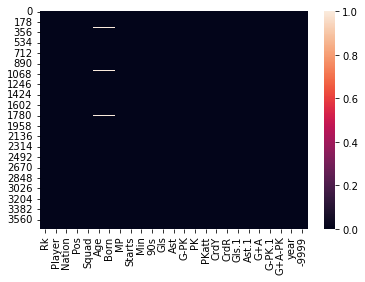

In [62]:
sns.heatmap(st.isna())

fillna & dropna

In [63]:
st.drop('-9999', axis=1, inplace=True)

In [64]:
st['Pos'].fillna('DF', inplace=True)
st['Nation'].fillna('sa KSA', inplace=True)
st['Age'].fillna(26.3, inplace=True)
st['Born'].fillna(1991.3, inplace=True)

{Age: 26.3  , Born: 1991.3}

<AxesSubplot:>

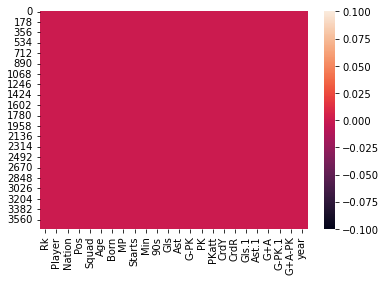

In [65]:
sns.heatmap(st.isna())

player 

In [66]:
st.Player = st.Player.apply(lambda x: x.replace('Al-','Al')
                                      .replace('Al ','Al')
                                      .replace('l-A','lA')
                                      .replace('El ', 'El'))

Nation

In [67]:
print(st['Nation'].nunique())
print()
print(st['Nation'].unique())

100

['sa KSA' 'dz ALG' 'cm CMR' 'ao ANG' 'gh GHA' 'jo JOR' 'ma MAR' 'mk MKD'
 'br BRA' 'fr FRA' 'bi BDI' 'pt POR' 'hr CRO' 'ar ARG' 'tn TUN' 'au AUS'
 'uy URU' 'pe PER' 'co COL' 'ml MLI' 'nl NED' 'eg EGY' 'rs SRB' 'mw MWI'
 'ng NGA' 'es ESP' 'kr KOR' 'py PAR' 'sk SVK' 'ua UKR' 'cl CHI' 'cv CPV'
 'bg BUL' 'md MDA' 'cd COD' 'ch SUI' 'uz UZB' 'cg CGO' 'ne NIG' 'zw ZIM'
 'sn SEN' 'gr GRE' 'se SWE' 'sy SYR' 'sr SUR' 'no NOR' 'de GER' 'mg MAD'
 'lt LTU' 'ro ROU' 'mr MTN' 'it ITA' 'tt TRI' 've VEN' 'ee EST' 'kz KAZ'
 'me MNE' 'ba BIH' 'bj BEN' 'SUD' 'td CHA' 'ga GAB' 'cw CUW' 'ci CIV'
 'tr TUR' 'pl POL' 'dk DEN' 'cf CTA' 'gw GNB' 'ae UAE' 'bo BOL' 'kw KUW'
 'gn GUI' 'ec ECU' 'be BEL' 'om OMA' 'cr CRC' 'by BLR' 'gm GAM' 'ge GEO'
 'km COM' 'iq IRQ' 'ly LBY' 'hn HON' 'lr LBR' 'sl SLE' 'am ARM' 'zm ZAM'
 'th THA' 'tl TLS' 'bf BFA' 'st STP' 'tg TOG' 'gq EQG' 'bh BHR' 'ps PLE'
 'pr PUR' 'za RSA' 'ke KEN' 'lb LIB']


In [68]:
# Keep the 3 letters country code and remove whitespaces
st['Nation'] = st.Nation.apply(lambda x: x.split()[-1].strip())

pos

In [69]:
st.Pos.unique()

array(['FW', 'MF', 'DF', 'GK', 'MFFW', 'FWMF', 'MFDF', 'DFMF', 'DFFW',
       'GKMF'], dtype=object)

In [70]:
# Keep the first postion only (for simplicity)
st.Pos = st.Pos.apply(lambda x: x[0])


In [71]:
st.Pos.unique()

array(['F', 'M', 'D', 'G'], dtype=object)

In [72]:
st.Pos.value_counts().sum()

3719

In [73]:
st.head(3)

Rk               Player Nation Pos       Squad   Age    Born  MP  Starts  \
0   1  Malek AlAbadalmanam    KSA   F    Al-Fayha  23.0  1998.0  22       8   
1   2        Saleh AlAbbas    KSA   M  Al-Faisaly  27.0  1993.0   9       1   
2   3        Hamad AlAbdan    KSA   M    Al-Hazem  21.0  2000.0   8       3   

   Min  90s  Gls  Ast  G-PK  PK  PKatt  CrdY  CrdR  Gls.1  Ast.1   G+A  \
0  735  8.2    4    0     4   0      0     3     0   0.49    0.0  0.49   
1  247  2.7    0    0     0   0      0     0     0   0.00    0.0  0.00   
2  298  3.3    0    0     0   0      0     0     0   0.00    0.0  0.00   

   G-PK.1  G+A-PK  year  
0    0.49    0.49  2021  
1    0.00    0.00  2021  
2    0.00    0.00  2021

create 2 tables

In [74]:
st18 = st[st.year >= 2018].iloc[:,:-1]
st18.tail()

Rk              Player Nation Pos       Squad   Age    Born  MP  \
1986  506      Safi AlZaqarta    KSA   F     Al-Ahli  19.0  1999.0   2   
1987  507        Omar AlZayni    KSA   M     Al-Ahli  22.0  1996.0   1   
1988  508     Abdullah AlZori    KSA   D    Al-Wehda  30.0  1987.0  22   
1989  509   Ibrahim AlZubaidi    KSA   D  Al-Taawoun  29.0  1989.0  27   
1990  510  Mohammed AlZubaidi    KSA   M     Al-Ahli  20.0  1997.0   3   

      Starts   Min   90s  Gls  Ast  G-PK  PK  PKatt  CrdY  CrdR  Gls.1  Ast.1  \
1986       0    19   0.2    0    0     0   0      0     0     0   0.00   0.00   
1987       0     1   0.0    0    0     0   0      0     0     0   0.00   0.00   
1988      22  1968  21.9    1    0     1   0      0     1     0   0.05   0.00   
1989      26  2285  25.4    1    4     1   0      0     7     0   0.04   0.16   
1990       2    86   1.0    0    0     0   0      0     0     0   0.00   0.00   

       G+A  G-PK.1  G+A-PK  
1986  0.00    0.00    0.00  
1987  0.00    0.00    0.00  
1988  0.05    0.05    0.05  
1989  0.20    0.04    0.20  
1990  0.00    0.00    0.00

In [75]:
st14 = st.iloc[:,:-1].reset_index()
st14.tail()

index   Rk              Player Nation Pos       Squad   Age    Born  MP  \
3714   3714  421  Ibrahim AlZawahreh    JOR   D  Al-Khaleej  25.0  1989.0  24   
3715   3715  422    Khaled AlZealaiy    KSA   M    Al-Nassr  27.0  1987.0   1   
3716   3716  423     Abdullah AlZori    KSA   D    Al-Hilal  26.0  1987.0  19   
3717   3717  424       Ali AlZubaidi    KSA   D   Al-Orobah  21.0  1993.0  11   
3718   3718  425     Đorđe Đikanović    MNE   D       Hajer  29.0  1984.0  23   

      Starts   Min   90s  Gls  Ast  G-PK  PK  PKatt  CrdY  CrdR  Gls.1  Ast.1  \
3714      24  2069  23.0    5    1     4   1      1     5     1   0.22   0.04   
3715       0    20   0.2    0    0     0   0      0     0     0   0.00   0.00   
3716      15  1267  14.1    1    0     1   0      0     1     1   0.07   0.00   
3717       6   548   6.1    0    0     0   0      0     1     0   0.00   0.00   
3718      23  2028  22.5    0    1     0   0      0     6     1   0.00   0.04   

       G+A  G-PK.1  G+A-PK  
3714  0.26    0.17    0.22  
3715  0.00    0.00    0.00  
3716  0.07    0.07    0.07  
3717  0.00    0.00    0.00  
3718  0.04    0.00    0.04

#### ***II) player shooting***

In [76]:
sh.head()

Rk                Player  Nation Pos       Squad   Age    Born   90s  Gls  \
0   1  Malek Al Abadalmanam  sa KSA  FW    Al-Fayha  23.0  1998.0   8.2    4   
1   2        Saleh Al Abbas  sa KSA  MF  Al-Faisaly  27.0  1993.0   2.7    0   
2   3        Hamad Al Abdan  sa KSA  MF    Al-Hazem  21.0  2000.0   3.3    0   
3   4      Ayoub Abdellaoui  dz ALG  DF  Al-Ettifaq  28.0  1993.0  17.8    0   
4   5       Saud Abdulhamid  sa KSA  DF    Al-Hilal  22.0  1999.0  10.8    0   

   Sh  SoT  SoT%  Sh/90  SoT/90  G/Sh  G/SoT  Dist  PK  PKatt  year     -9999  
0  24   13  54.2   2.94    1.59  0.17   0.31   NaN   0      0  2021  22cccb9f  
1   6    1  16.7   2.19    0.36  0.00   0.00   NaN   0      0  2021  ac46f44a  
2   6    2  33.3   1.81    0.60  0.00   0.00   NaN   0      0  2021  f64a8aee  
3  11    4  36.4   0.62    0.23  0.00   0.00   NaN   0      0  2021  76250bac  
4   3    0   0.0   0.28    0.00  0.00    NaN   NaN   0      0  2021  caa254e4

In [77]:
sh.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1991 entries, 0 to 1990
Data columns (total 21 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Rk      1991 non-null   int64  
 1   Player  1991 non-null   object 
 2   Nation  1981 non-null   object 
 3   Pos     1990 non-null   object 
 4   Squad   1991 non-null   object 
 5   Age     1918 non-null   float64
 6   Born    1918 non-null   float64
 7   90s     1991 non-null   float64
 8   Gls     1991 non-null   int64  
 9   Sh      1991 non-null   int64  
 10  SoT     1991 non-null   int64  
 11  SoT%    1565 non-null   float64
 12  Sh/90   1991 non-null   float64
 13  SoT/90  1991 non-null   float64
 14  G/Sh    1565 non-null   float64
 15  G/SoT   1241 non-null   float64
 16  Dist    0 non-null      float64
 17  PK      1991 non-null   int64  
 18  PKatt   1991 non-null   int64  
 19  year    1991 non-null   int64  
 20  -9999   1991 non-null   object 
dtypes: float64(9), int64(7), object(5)
me

In [78]:
# the Nan value in %
sh.isna().sum(axis=0) / sh.shape[0] * 100

Rk          0.000000
Player      0.000000
Nation      0.502260
Pos         0.050226
Squad       0.000000
Age         3.666499
Born        3.666499
90s         0.000000
Gls         0.000000
Sh          0.000000
SoT         0.000000
SoT%       21.396283
Sh/90       0.000000
SoT/90      0.000000
G/Sh       21.396283
G/SoT      37.669513
Dist      100.000000
PK          0.000000
PKatt       0.000000
year        0.000000
-9999       0.000000
dtype: float64

<AxesSubplot:>

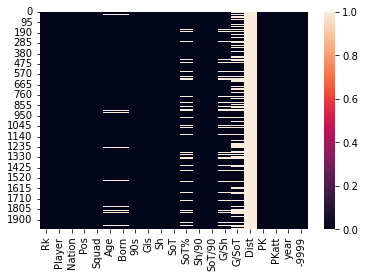

In [79]:
sns.heatmap(sh.isna())

fillna & dropna

In [80]:
sh.drop(['Dist', '-9999'], axis=1, inplace=True)

In [81]:
sh['Pos'].fillna('DF', inplace=True)
sh['Nation'].fillna('sa KSA', inplace=True)
sh['Age'].fillna(26.3, inplace=True)
sh['Born'].fillna(1991.3, inplace=True)

In [82]:
sh['G/Sh'] = sh['G/Sh'].fillna(0)
sh['SoT%'] = sh['SoT%'].fillna(0)
sh['G/SoT'] = sh['G/SoT'].fillna(0)

<AxesSubplot:>

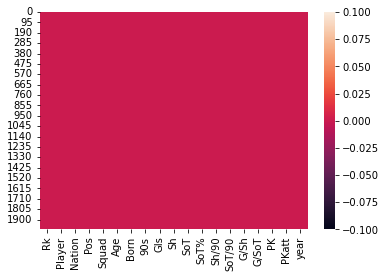

In [83]:
sns.heatmap(sh.isna())

In [84]:
sh.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1991 entries, 0 to 1990
Data columns (total 19 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Rk      1991 non-null   int64  
 1   Player  1991 non-null   object 
 2   Nation  1991 non-null   object 
 3   Pos     1991 non-null   object 
 4   Squad   1991 non-null   object 
 5   Age     1991 non-null   float64
 6   Born    1991 non-null   float64
 7   90s     1991 non-null   float64
 8   Gls     1991 non-null   int64  
 9   Sh      1991 non-null   int64  
 10  SoT     1991 non-null   int64  
 11  SoT%    1991 non-null   float64
 12  Sh/90   1991 non-null   float64
 13  SoT/90  1991 non-null   float64
 14  G/Sh    1991 non-null   float64
 15  G/SoT   1991 non-null   float64
 16  PK      1991 non-null   int64  
 17  PKatt   1991 non-null   int64  
 18  year    1991 non-null   int64  
dtypes: float64(8), int64(7), object(4)
memory usage: 295.7+ KB


In [85]:
sh18 = sh.iloc[:,7:-1]
sh18.shape

(1991, 11)

#### ***III) players playing time***

In [86]:
pt.head(3)

Rk                Player  Nation Pos       Squad   Age    Born  MP    Min  \
0   1  Malek Al Abadalmanam  sa KSA  FW    Al-Fayha  23.0  1998.0  22  735.0   
1   2        Saleh Al Abbas  sa KSA  MF  Al-Faisaly  27.0  1993.0   9  247.0   
2   3        Hamad Al Abdan  sa KSA  MF    Al-Hazem  21.0  2000.0   8  298.0   

   Mn/MP  Min%  90s  Starts  Mn/Start  Compl  Subs  Mn/Sub  unSub   PPM  onG  \
0   33.0  27.2  8.2       8      68.0    2.0    14    14.0      2  1.32  7.0   
1   27.0   9.1  2.7       1      55.0    0.0     8    24.0     12  0.22  2.0   
2   37.0  11.0  3.3       3      67.0    0.0     5    19.0      2  1.00  1.0   

   onGA  +/-  +/-90  On-Off  year     -9999  
0   4.0  3.0   0.37    0.64  2021  22cccb9f  
1   5.0 -3.0  -1.09   -0.87  2021  ac46f44a  
2   5.0 -4.0  -1.21   -0.35  2021  f64a8aee

In [87]:
pt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4240 entries, 0 to 4239
Data columns (total 26 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Rk        4240 non-null   int64  
 1   Player    4240 non-null   object 
 2   Nation    4208 non-null   object 
 3   Pos       4235 non-null   object 
 4   Squad     4240 non-null   object 
 5   Age       4085 non-null   float64
 6   Born      4085 non-null   float64
 7   MP        4240 non-null   int64  
 8   Min       3719 non-null   float64
 9   Mn/MP     3719 non-null   float64
 10  Min%      3720 non-null   float64
 11  90s       3720 non-null   float64
 12  Starts    4240 non-null   int64  
 13  Mn/Start  3310 non-null   float64
 14  Compl     4171 non-null   float64
 15  Subs      4240 non-null   int64  
 16  Mn/Sub    2714 non-null   float64
 17  unSub     4240 non-null   int64  
 18  PPM       3720 non-null   float64
 19  onG       3720 non-null   float64
 20  onGA      3720 non-null   floa

Null values

In [88]:
# the Nan value in %
pt.isna().sum(axis=0) / pt.shape[0] * 100

Rk           0.000000
Player       0.000000
Nation       0.754717
Pos          0.117925
Squad        0.000000
Age          3.655660
Born         3.655660
MP           0.000000
Min         12.287736
Mn/MP       12.287736
Min%        12.264151
90s         12.264151
Starts       0.000000
Mn/Start    21.933962
Compl        1.627358
Subs         0.000000
Mn/Sub      35.990566
unSub        0.000000
PPM         12.264151
onG         12.264151
onGA        12.264151
+/-         12.264151
+/-90       12.287736
On-Off      12.641509
year         0.000000
-9999        0.000000
dtype: float64

dropna & fillna

In [89]:
pt['Pos'].fillna('DF', inplace=True)
pt['Nation'].fillna('sa KSA', inplace=True)
pt['Age'].fillna(26.3, inplace=True)
pt['Born'].fillna(1991.3, inplace=True)

In [90]:
pt['Mn/Sub'] = pt['Mn/Sub'].fillna(0)
pt['Mn/Start'] = pt['Mn/Start'].fillna(0)
pt['Compl'] = pt['Compl'].fillna(0)
pt['On-Off'] = pt['On-Off'].fillna(0)

In [91]:
pt.dropna(subset= ['Min'], axis=0, inplace=True)
pt.shape

(3719, 26)

In [92]:
pt[pt.year >= 2018].reset_index().shape

(1991, 27)

In [93]:
pt18 = pt[pt.year >= 2018].reset_index().iloc[:, 7:-2]
pt18.tail()

Born  MP     Min  Mn/MP  Min%   90s  Starts  Mn/Start  Compl  Subs  \
1986  1999.0   2    19.0   10.0   0.7   0.2       0       0.0    0.0     2   
1987  1996.0   1     1.0    1.0   0.0   0.0       0       0.0    0.0     1   
1988  1987.0  22  1968.0   89.0  72.9  21.9      22      89.0   21.0     0   
1989  1989.0  27  2285.0   85.0  84.6  25.4      26      86.0   19.0     1   
1990  1997.0   3    86.0   29.0   3.2   1.0       2      33.0    0.0     1   

      Mn/Sub  unSub   PPM   onG  onGA   +/-  +/-90  On-Off  
1986     9.0      0  1.50   1.0   1.0   0.0   0.00   -0.91  
1987     0.0     12  3.00   0.0   0.0   0.0   0.00   -0.90  
1988     0.0      2  1.41  26.0  27.0  -1.0  -0.05   -0.17  
1989    45.0      0  1.85  47.0  27.0  20.0   0.79   -1.38  
1990    21.0      8  1.00   2.0   3.0  -1.0  -1.05   -2.01

In [94]:
pt14 = pt.iloc[:, 7:-1].reset_index()
pt14.head(2)

index  MP    Min  Mn/MP  Min%  90s  Starts  Mn/Start  Compl  Subs  Mn/Sub  \
0      0  22  735.0   33.0  27.2  8.2       8      68.0    2.0    14    14.0   
1      1   9  247.0   27.0   9.1  2.7       1      55.0    0.0     8    24.0   

   unSub   PPM  onG  onGA  +/-  +/-90  On-Off  year  
0      2  1.32  7.0   4.0  3.0   0.37    0.64  2021  
1     12  0.22  2.0   5.0 -3.0  -1.09   -0.87  2021

#### ***III) player miscellaneous stats***

In [95]:
ms.sample(4)

Rk             Player  Nation   Pos      Squad   Age    Born   90s  \
741   226     Saša Jovanović  rs SRB    FW   Al-Fateh  28.0  1991.0   3.8   
1683  203      Yassin Hamzah  sa KSA    DF   Al-Fateh  27.0  1990.0  17.7   
783   268  Mohammed Majrashi  sa KSA  MFFW   Al-Fateh  29.0  1991.0   5.9   
1145  160  Savvas Gentsoglou  gr GRE  MFDF  Al-Adalah  28.0  1990.0  11.9   

      CrdY  CrdR  2CrdY  Fls  Fld  Off  Crs  Int  TklW  PKwon  PKcon  OG  \
741      0     0      0    9    0    5    8    0     1    NaN    NaN   0   
1683     2     0      0   15   15    1    1   32    18    0.0    2.0   1   
783      1     0      0   15    5    2    1    2     1    NaN    NaN   0   
1145     5     0      0   17   15    0    4   12    19    NaN    NaN   0   

      year     -9999  
741   2020  73c56892  
1683  2018  94f31ace  
783   2020  39425891  
1145  2019  8ed17872

In [96]:
ms.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1991 entries, 0 to 1990
Data columns (total 22 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Rk      1991 non-null   int64  
 1   Player  1991 non-null   object 
 2   Nation  1981 non-null   object 
 3   Pos     1990 non-null   object 
 4   Squad   1991 non-null   object 
 5   Age     1918 non-null   float64
 6   Born    1918 non-null   float64
 7   90s     1991 non-null   float64
 8   CrdY    1991 non-null   int64  
 9   CrdR    1991 non-null   int64  
 10  2CrdY   1991 non-null   int64  
 11  Fls     1991 non-null   int64  
 12  Fld     1991 non-null   int64  
 13  Off     1991 non-null   int64  
 14  Crs     1991 non-null   int64  
 15  Int     1991 non-null   int64  
 16  TklW    1991 non-null   int64  
 17  PKwon   833 non-null    float64
 18  PKcon   833 non-null    float64
 19  OG      1991 non-null   int64  
 20  year    1991 non-null   int64  
 21  -9999   1991 non-null   object 
dtype

In [97]:
ms.drop(['-9999','PKwon','PKcon'], axis=1, inplace=True)

In [98]:
ms['Pos'].fillna('DF', inplace=True)
ms['Nation'].fillna('sa KSA', inplace=True)
ms['Age'].fillna(26.3, inplace=True)
ms['Born'].fillna(1991.3, inplace=True)

In [99]:
ms18 = ms.iloc[:,11:19]
ms18.head(3)

Fls  Fld  Off  Crs  Int  TklW  OG  year
0   27   12    3    1    1     1   0  2021
1    5    7    1    1    1     1   0  2021
2    3    0    0    2    1     2   0  2021

#### ***II) players goalkeeping***

In [100]:
gk.sample(5)

Rk                Player  Nation Pos      Squad   Age    Born  MP  \
118   7        Abdu Al Basisi  sa KSA  GK       Ohod  41.0  1977.0   3   
64   25  Abdullah Al-Owaishir  sa KSA  GK   Al-Wehda  29.0  1991.0  27   
273  25      Rafea Al-Ruwaili  sa KSA  GK  Al-Orobah  24.0  1990.0  19   
126  15          Ali Al-Habsi  om OMA  GK   Al-Hilal  36.0  1981.0  21   
214  34   Abdullah Al-Zahrani  sa KSA  GK    Al-Raed  22.0  1993.0   1   

     Starts   Min   90s    GA  GA90   SoTA  Saves  Save%     W    D     L  CS  \
118       2   249   2.8   9.0  3.25   20.0     12   60.0   0.0  0.0   2.0   0   
64       27  2430  27.0  56.0  2.07  136.0     89   65.4   8.0  5.0  14.0   3   
273      19  1710  19.0   NaN   NaN    NaN      0    NaN   4.0  2.0  13.0   2   
126      21  1870  20.8  21.0  1.01   51.0     34   66.7  15.0  4.0   2.0   6   
214       1    90   1.0   NaN   NaN    NaN      0    NaN   0.0  1.0   0.0   0   

      CS%  PKatt  PKA  PKsv  PKm  Save%.1  year     -9999  
118   0.0      1    1     0    0      0.0  2018  52a92714  
64   11.1     10    9     0    1      0.0  2020  6a1fe279  
273  10.5      5    4     0    1      0.0  2014  fd8092a8  
126  28.6      4    4     0    0      0.0  2018  032f766b  
214   0.0      0    0     0    0      NaN  2016  4900efdb

In [101]:
gk.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 283 entries, 0 to 282
Data columns (total 28 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Rk       283 non-null    int64  
 1   Player   283 non-null    object 
 2   Nation   283 non-null    object 
 3   Pos      283 non-null    object 
 4   Squad    283 non-null    object 
 5   Age      278 non-null    float64
 6   Born     278 non-null    float64
 7   MP       283 non-null    int64  
 8   Starts   283 non-null    int64  
 9   Min      283 non-null    int64  
 10  90s      283 non-null    float64
 11  GA       181 non-null    float64
 12  GA90     181 non-null    float64
 13  SoTA     154 non-null    float64
 14  Saves    283 non-null    int64  
 15  Save%    151 non-null    float64
 16  W        281 non-null    float64
 17  D        281 non-null    float64
 18  L        281 non-null    float64
 19  CS       283 non-null    int64  
 20  CS%      276 non-null    float64
 21  PKatt    283 non

<AxesSubplot:>

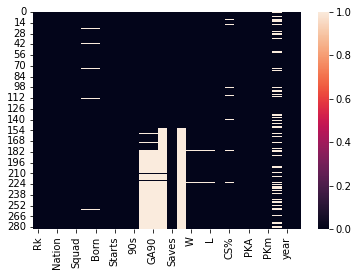

In [102]:
sns.heatmap(gk.isna())

In [103]:
# the Nan value in %
gk.isna().sum(axis=0) / gk.shape[0] * 100

Rk          0.000000
Player      0.000000
Nation      0.000000
Pos         0.000000
Squad       0.000000
Age         1.766784
Born        1.766784
MP          0.000000
Starts      0.000000
Min         0.000000
90s         0.000000
GA         36.042403
GA90       36.042403
SoTA       45.583039
Saves       0.000000
Save%      46.643110
W           0.706714
D           0.706714
L           0.706714
CS          0.000000
CS%         2.473498
PKatt       0.000000
PKA         0.000000
PKsv        0.000000
PKm         0.000000
Save%.1    27.915194
year        0.000000
-9999       0.000000
dtype: float64

dropna & fillna

In [104]:
gk.drop('-9999', axis=1, inplace=True)

In [105]:
gk['Age'].fillna(gk['Age'].mean() , inplace=True)
gk['Born'].fillna(gk['Born'].mean(), inplace=True)

In [106]:
gk['GA'].fillna(18.3 , inplace=True)
gk['GA90'].fillna(1.3 , inplace=True)
gk['SoTA'].fillna(51.3 , inplace=True)
gk['Save%'].fillna(69.3 , inplace=True)
gk['W'].fillna(4.3 , inplace=True)
gk['D'].fillna(2.3 , inplace=True)
gk['L'].fillna(4.3 , inplace=True)
gk['CS%'].fillna(18.3 , inplace=True)
gk['CS%'].fillna(22.3 , inplace=True)
gk['Save%.1'].fillna(13.3 , inplace=True)

player

In [107]:
gk.Player = gk.Player.apply(lambda x: x.replace('Al-','Al')
                                      .replace('Al ','Al')
                                      .replace('l-A','lA')
                                      .replace('El ', 'El'))

Nation

In [108]:
# Keep the 3 letters country code and remove whitespaces
gk['Nation'] = gk.Nation.apply(lambda x: x.split()[-1].strip())

pos

In [109]:
gk['Pos'].unique()

array(['GK', 'MF'], dtype=object)

In [110]:
# Keep the first postion only (for simplicity)
gk.Pos = gk.Pos.apply(lambda x: x.split(',')[0])

In [111]:
gk.head(3)

Rk           Player Nation Pos     Squad   Age    Born  MP  Starts   Min  \
0   1  Waleed Abdullah    KSA  GK  Al-Nassr  35.0  1986.0  20      19  1649   
1   2    Nawaf AlAqidi    KSA  GK  Al-Ta'ee  21.0  2000.0   7       7   630   
2   3    Nawaf AlAqidi    KSA  GK  Al-Nassr  21.0  2000.0   3       3   270   

    90s    GA  GA90  SoTA  Saves  Save%     W    D    L  CS   CS%  PKatt  PKA  \
0  18.3  20.0  1.09  52.0     37   71.2  13.0  1.0  5.0   6  31.6      6    5   
1   7.0   5.0  0.71  25.0     20   80.0   5.0  1.0  1.0   3  42.9      0    0   
2   3.0   4.0  1.33   8.0      5   62.5   1.0  1.0  1.0   0   0.0      1    1   

   PKsv  PKm  Save%.1  year  
0     0    1      0.0  2021  
1     0    0     13.3  2021  
2     0    0      0.0  2021

### ***Merging tables***

In [112]:
pt18.tail()

Born  MP     Min  Mn/MP  Min%   90s  Starts  Mn/Start  Compl  Subs  \
1986  1999.0   2    19.0   10.0   0.7   0.2       0       0.0    0.0     2   
1987  1996.0   1     1.0    1.0   0.0   0.0       0       0.0    0.0     1   
1988  1987.0  22  1968.0   89.0  72.9  21.9      22      89.0   21.0     0   
1989  1989.0  27  2285.0   85.0  84.6  25.4      26      86.0   19.0     1   
1990  1997.0   3    86.0   29.0   3.2   1.0       2      33.0    0.0     1   

      Mn/Sub  unSub   PPM   onG  onGA   +/-  +/-90  On-Off  
1986     9.0      0  1.50   1.0   1.0   0.0   0.00   -0.91  
1987     0.0     12  3.00   0.0   0.0   0.0   0.00   -0.90  
1988     0.0      2  1.41  26.0  27.0  -1.0  -0.05   -0.17  
1989    45.0      0  1.85  47.0  27.0  20.0   0.79   -1.38  
1990    21.0      8  1.00   2.0   3.0  -1.0  -1.05   -2.01

In [113]:
ps18 = pd.concat((st18,sh18,pt18,ms18), axis=1).reset_index()

In [114]:
ps18.head()

index  Rk               Player Nation Pos       Squad   Age    Born  MP  \
0      0   1  Malek AlAbadalmanam    KSA   F    Al-Fayha  23.0  1998.0  22   
1      1   2        Saleh AlAbbas    KSA   M  Al-Faisaly  27.0  1993.0   9   
2      2   3        Hamad AlAbdan    KSA   M    Al-Hazem  21.0  2000.0   8   
3      3   4     Ayoub Abdellaoui    ALG   D  Al-Ettifaq  28.0  1993.0  22   
4      4   5      Saud Abdulhamid    KSA   D    Al-Hilal  22.0  1999.0  13   

   Starts   Min   90s  Gls  Ast  G-PK  PK  PKatt  CrdY  CrdR  Gls.1  Ast.1  \
0       8   735   8.2    4    0     4   0      0     3     0   0.49   0.00   
1       1   247   2.7    0    0     0   0      0     0     0   0.00   0.00   
2       3   298   3.3    0    0     0   0      0     0     0   0.00   0.00   
3      19  1598  17.8    0    0     0   0      0     4     0   0.00   0.00   
4      10   970  10.8    0    2     0   0      0     2     0   0.00   0.19   

    G+A  G-PK.1  G+A-PK   90s  Gls  Sh  SoT  SoT%  Sh/90  SoT/90  G/Sh  G/SoT  \
0  0.49    0.49    0.49   8.2    4  24   13  54.2   2.94    1.59  0.17   0.31   
1  0.00    0.00    0.00   2.7    0   6    1  16.7   2.19    0.36  0.00   0.00   
2  0.00    0.00    0.00   3.3    0   6    2  33.3   1.81    0.60  0.00   0.00   
3  0.00    0.00    0.00  17.8    0  11    4  36.4   0.62    0.23  0.00   0.00   
4  0.19    0.00    0.19  10.8    0   3    0   0.0   0.28    0.00  0.00   0.00   

   PK  PKatt    Born  MP     Min  Mn/MP  Min%   90s  Starts  Mn/Start  Compl  \
0   0      0  1998.0  22   735.0   33.0  27.2   8.2       8      68.0    2.0   
1   0      0  1993.0   9   247.0   27.0   9.1   2.7       1      55.0    0.0   
2   0      0  2000.0   8   298.0   37.0  11.0   3.3       3      67.0    0.0   
3   0      0  1993.0  22  1598.0   73.0  59.2  17.8      19      82.0   14.0   
4   0      0  1999.0  13   970.0   75.0  35.9  10.8      10      88.0    9.0   

   Subs  Mn/Sub  unSub   PPM   onG  onGA   +/-  +/-90  On-Off  Fls  Fld  Off  \
0    14    14.0      2  1.32   7.0   4.0   3.0   0.37    0.64   27   12    3   
1     8    24.0     12  0.22   2.0   5.0  -3.0  -1.09   -0.87    5    7    1   
2     5    19.0      2  1.00   1.0   5.0  -4.0  -1.21   -0.35    3    0    0   
3     3    13.0      0  0.95  19.0  25.0  -6.0  -0.34   -0.26   23   20    1   
4     3    31.0      0  2.77  29.0   6.0  23.0   2.13    1.51   20   15    0   

   Crs  Int  TklW  OG  year  
0    1    1     1   0  2021  
1    1    1     1   0  2021  
2    2    1     2   0  2021  
3   22   21    11   0  2021  
4   43    7    24   0  2021

In [115]:
ps18.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1991 entries, 0 to 1990
Data columns (total 61 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   index     1991 non-null   int64  
 1   Rk        1991 non-null   int64  
 2   Player    1991 non-null   object 
 3   Nation    1991 non-null   object 
 4   Pos       1991 non-null   object 
 5   Squad     1991 non-null   object 
 6   Age       1991 non-null   float64
 7   Born      1991 non-null   float64
 8   MP        1991 non-null   int64  
 9   Starts    1991 non-null   int64  
 10  Min       1991 non-null   int64  
 11  90s       1991 non-null   float64
 12  Gls       1991 non-null   int64  
 13  Ast       1991 non-null   int64  
 14  G-PK      1991 non-null   int64  
 15  PK        1991 non-null   int64  
 16  PKatt     1991 non-null   int64  
 17  CrdY      1991 non-null   int64  
 18  CrdR      1991 non-null   int64  
 19  Gls.1     1991 non-null   float64
 20  Ast.1     1991 non-null   floa

In [116]:
pt14.shape

(3719, 19)

In [117]:
st14.shape

(3719, 24)

In [118]:
st14.tail()

index   Rk              Player Nation Pos       Squad   Age    Born  MP  \
3714   3714  421  Ibrahim AlZawahreh    JOR   D  Al-Khaleej  25.0  1989.0  24   
3715   3715  422    Khaled AlZealaiy    KSA   M    Al-Nassr  27.0  1987.0   1   
3716   3716  423     Abdullah AlZori    KSA   D    Al-Hilal  26.0  1987.0  19   
3717   3717  424       Ali AlZubaidi    KSA   D   Al-Orobah  21.0  1993.0  11   
3718   3718  425     Đorđe Đikanović    MNE   D       Hajer  29.0  1984.0  23   

      Starts   Min   90s  Gls  Ast  G-PK  PK  PKatt  CrdY  CrdR  Gls.1  Ast.1  \
3714      24  2069  23.0    5    1     4   1      1     5     1   0.22   0.04   
3715       0    20   0.2    0    0     0   0      0     0     0   0.00   0.00   
3716      15  1267  14.1    1    0     1   0      0     1     1   0.07   0.00   
3717       6   548   6.1    0    0     0   0      0     1     0   0.00   0.00   
3718      23  2028  22.5    0    1     0   0      0     6     1   0.00   0.04   

       G+A  G-PK.1  G+A-PK  
3714  0.26    0.17    0.22  
3715  0.00    0.00    0.00  
3716  0.07    0.07    0.07  
3717  0.00    0.00    0.00  
3718  0.04    0.00    0.04

In [119]:
pt14.tail()

index  MP     Min  Mn/MP  Min%   90s  Starts  Mn/Start  Compl  Subs  \
3714   4234  24  2069.0   86.0  88.4  23.0      24      86.0   22.0     0   
3715   4235   1    20.0   20.0   0.9   0.2       0       0.0    0.0     1   
3716   4236  19  1267.0   67.0  54.1  14.1      15      79.0    8.0     4   
3717   4237  11   548.0   50.0  23.4   6.1       6      83.0    5.0     5   
3718   4239  23  2028.0   88.0  86.7  22.5      23      88.0   21.0     0   

      Mn/Sub  unSub   PPM   onG  onGA   +/-  +/-90  On-Off  year  
3714     0.0      0  1.08  28.0  34.0  -6.0  -0.26   -0.26  2014  
3715    19.0      3  3.00   0.0   0.0   0.0   0.00   -1.63  2014  
3716    20.0      1  2.11  20.0  11.0   9.0   0.64   -1.04  2014  
3717    10.0     13  0.91   3.0   9.0  -6.0  -0.99   -0.18  2014  
3718     0.0      0  1.09  26.0  47.0 -21.0  -0.93    0.80  2014

In [120]:
ps14 = pd.concat((st14,pt14), axis=1)
ps14.tail(3)

index   Rk           Player Nation Pos      Squad   Age    Born  MP  \
3716   3716  423  Abdullah AlZori    KSA   D   Al-Hilal  26.0  1987.0  19   
3717   3717  424    Ali AlZubaidi    KSA   D  Al-Orobah  21.0  1993.0  11   
3718   3718  425  Đorđe Đikanović    MNE   D      Hajer  29.0  1984.0  23   

      Starts   Min   90s  Gls  Ast  G-PK  PK  PKatt  CrdY  CrdR  Gls.1  Ast.1  \
3716      15  1267  14.1    1    0     1   0      0     1     1   0.07   0.00   
3717       6   548   6.1    0    0     0   0      0     1     0   0.00   0.00   
3718      23  2028  22.5    0    1     0   0      0     6     1   0.00   0.04   

       G+A  G-PK.1  G+A-PK  index  MP     Min  Mn/MP  Min%   90s  Starts  \
3716  0.07    0.07    0.07   4236  19  1267.0   67.0  54.1  14.1      15   
3717  0.00    0.00    0.00   4237  11   548.0   50.0  23.4   6.1       6   
3718  0.04    0.00    0.04   4239  23  2028.0   88.0  86.7  22.5      23   

      Mn/Start  Compl  Subs  Mn/Sub  unSub   PPM   onG  onGA   +/-  +/-90  \
3716      79.0    8.0     4    20.0      1  2.11  20.0  11.0   9.0   0.64   
3717      83.0    5.0     5    10.0     13  0.91   3.0   9.0  -6.0  -0.99   
3718      88.0   21.0     0     0.0      0  1.09  26.0  47.0 -21.0  -0.93   

      On-Off  year  
3716   -1.04  2014  
3717   -0.18  2014  
3718    0.80  2014

In [121]:
ps14.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3719 entries, 0 to 3718
Data columns (total 43 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   index     3719 non-null   int64  
 1   Rk        3719 non-null   int64  
 2   Player    3719 non-null   object 
 3   Nation    3719 non-null   object 
 4   Pos       3719 non-null   object 
 5   Squad     3719 non-null   object 
 6   Age       3719 non-null   float64
 7   Born      3719 non-null   float64
 8   MP        3719 non-null   int64  
 9   Starts    3719 non-null   int64  
 10  Min       3719 non-null   int64  
 11  90s       3719 non-null   float64
 12  Gls       3719 non-null   int64  
 13  Ast       3719 non-null   int64  
 14  G-PK      3719 non-null   int64  
 15  PK        3719 non-null   int64  
 16  PKatt     3719 non-null   int64  
 17  CrdY      3719 non-null   int64  
 18  CrdR      3719 non-null   int64  
 19  Gls.1     3719 non-null   float64
 20  Ast.1     3719 non-null   floa

___
### 1.3- ***Save data***
___

##### ***ls 18-14***

In [122]:
ps18.to_csv('p_period 18-21', index=False)

In [123]:
ps14.to_csv('p_period 14-21', index=False)

In [124]:
gk.to_csv('goolkeepars', index=False)

# ***Exploratory Analysis***

In [125]:
import pandas as pd
import numpy as np 

import plotly as py
import plotly.express as px
import plotly.graph_objs as go
import seaborn as sns
from plotly.offline import init_notebook_mode, iplot
init_notebook_mode(connected=True)
import matplotlib.pyplot as plt
%matplotlib inline

from plotly.subplots import make_subplots
from IPython.display import Image
import plotly.figure_factory as ff
import ipywidgets as wid
import re 
from scipy import special
import warnings
warnings.filterwarnings('ignore')

pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
py.offline.init_notebook_mode(connected= True)

## ***Squads***

***
### 2.1- ***Load Data***
***

In [126]:
lt = pd.read_csv('new_league_tables')
ps18 = pd.read_csv('period 18-21')
ps14 = pd.read_csv('period 14-21')

***
### 2.2- ***Exploratory Analysis***
***

### EDA on Saudi Professional League Statistics
#### Objectives:
Exploratory data anlysis on Saudi Professional League stats dataset.
Learn and apply data visualizatiosn techniques using plotly's data visualization library.
1. Introduction

The Saudi Professional League, also known as the SPL League is the top division of association football in the Saudi Arabian league system. From 2013 to 2019, it was known as the Abdul Latif Jameel League, or Dawry Jameel, as it was sponsored by Abdul Latif Jameel.
The first season of competition was the 1976–77 season, Al Hilal is the most successful team, holding 18 titles in its history and most recently winning the title in 2021–22.

 1.1 The Saudi League

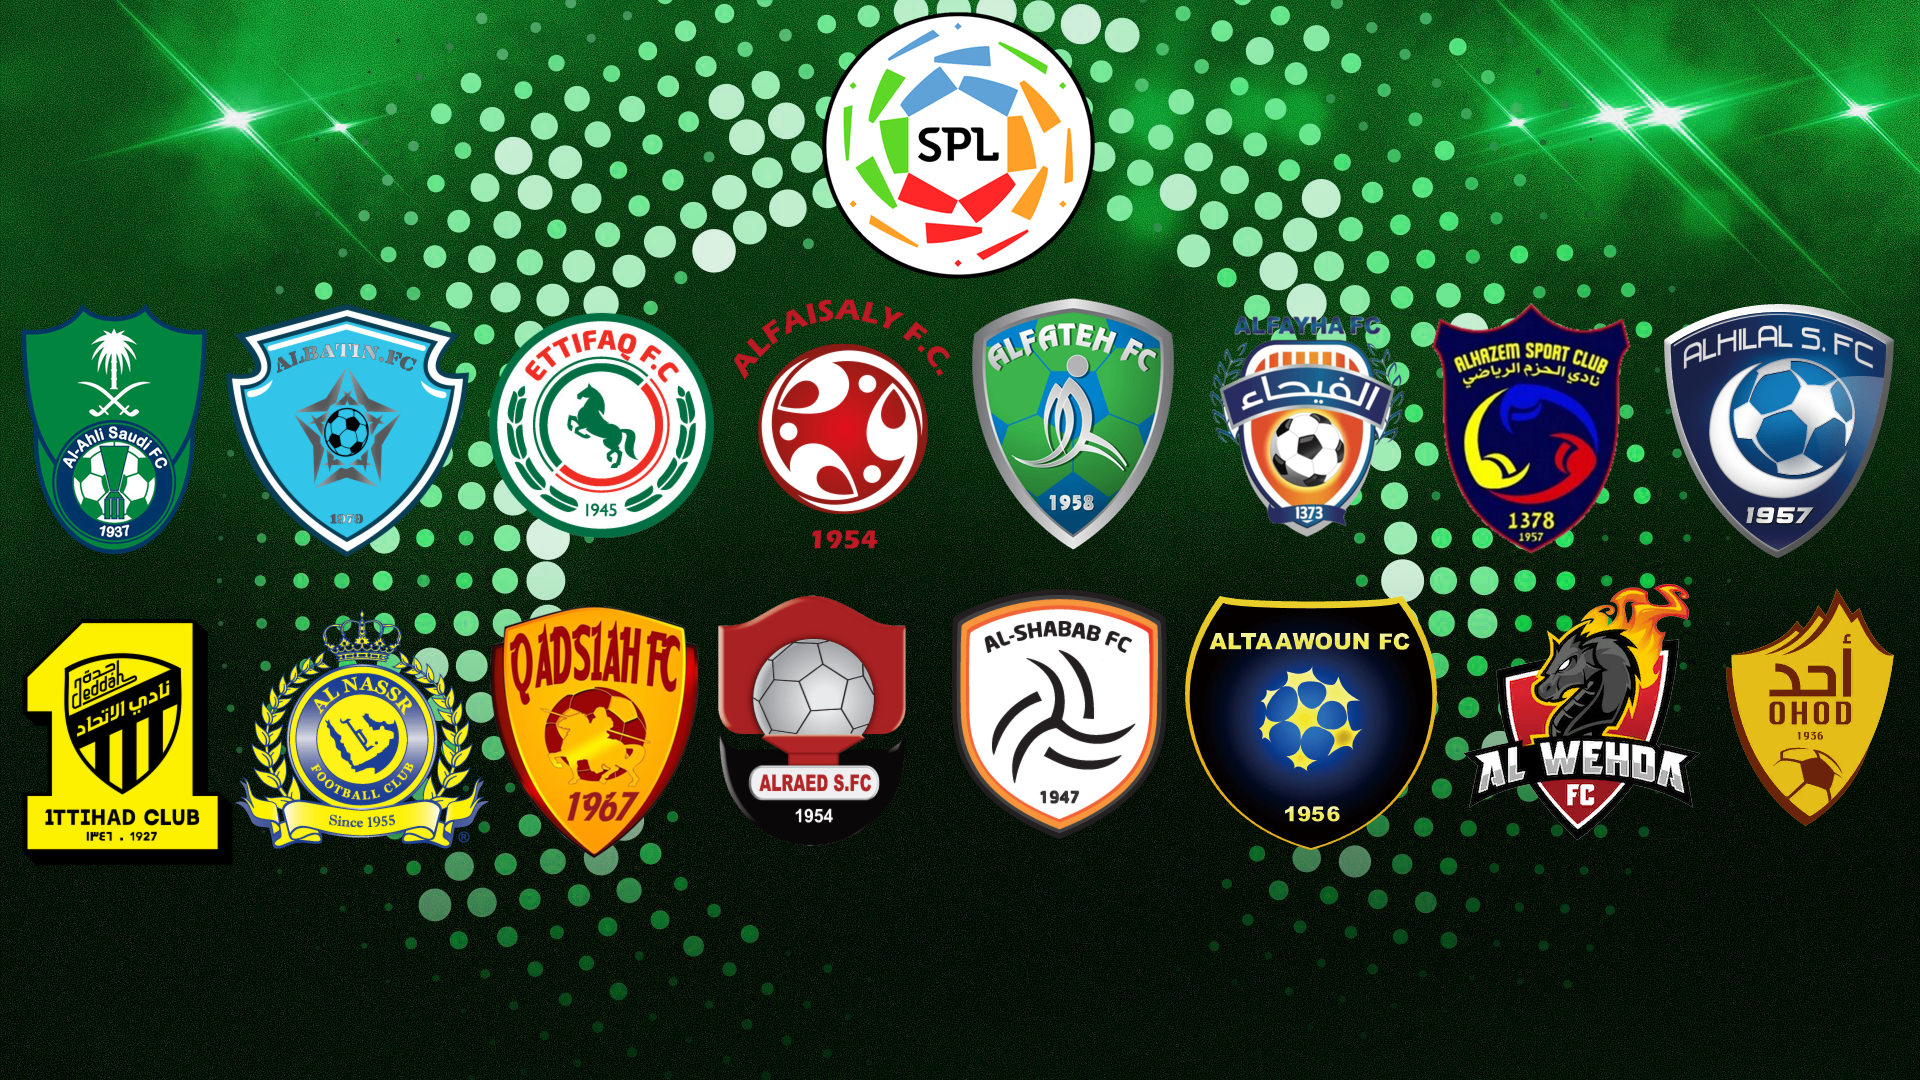

In [127]:
from IPython.display import Image
Image("Saudi-Professionals-League.jpg")

***
#### ***General Exploration***
- league table
- period 18-21
- period 18-21
***

##### ***league table***

In [128]:
print(lt.shape)
lt.head(3)

(120, 33)


year  Rk       Squad  MP   W  D  L  GF  GA  GDiff  Pts  Pts/Mp  W-H  D-H  \
0  2021   1    Al-Hilal  30  20  7  3  63  28     35   67    2.23   11    2   
1  2021   2  Al-Ittihad  30  20  5  5  62  29     33   65    2.17   11    2   
2  2021   3    Al-Nassr  30  19  4  7  58  36     22   61    2.03   10    2   

   L-H  GF-H  GA-H  GD-H  Pts-H  Pts/MP-H  MP-A  W-A  D-A  L-A  GF-A  GA-A  \
0    2    31    15    16     35      2.33    15    9    5    1    32    13   
1    2    31    10    21     35      2.33    15    9    3    3    31    19   
2    3    31    19    12     32      2.13    15    9    2    4    27    17   

   GD-A  Pts-A  Pts/MP-A  Attendance Top Team Scorer  Scorer Goals  \
0    19     32      2.13       10397   Moussa Marega            13   
1    12     30      2.00       31263       Romarinho            20   
2    10     29      1.93        7500         Talisca            20   

           Goalkeeper  
0  Abdullah Al-Mayouf  
1       Marcelo Grohe  
2     Waleed Abdullah

In [129]:
# Set parameters for graphing
sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = [16.0, 8.0]
plt.rcParams['font.size'] = 12
plt.rcParams['legend.markerscale'] = 1.5
# Color
all_colors = {'Al-Hilal':'#032e91', 
          'Al-Nassr':'#c97600', 
          'Al-Ahli':'#089103', 
          'Al-Wehda':'#b00000', 
         'Al-Faisaly': '#5c0000',
         'Al-Raed': '#7a0000',
         'Al-Shabab': '#000000',
         'Al-Ettifaq': '#60b043',
         'Abha': '#ff963b',
         "Al-Ta'ee": '#ff963b',
         'Damac': '#613e1f',
         'Al-Ittihad': '#e0b000',
         'Al-Taawoun': '#b0965a',
         'Al-Fateh': '#5a7eb0',
         'Al-Fayha': '#02214d',
         'Al-Hazem': '#490059',
         'Al-Adalah': '#ad398b',
         'Al-Ain': '#498f6c',
         'Al-Qadsiah':'#d44866' ,
         'Al-Batin': '#575757',
         'Ohod': '#81ab67',
         'Al-Khaleej': '#498f6c',
         'Najran': '#20b074',
         'Hajer': '#73c5ff',
         'Al-Shoulla': '#69164e',
         'Al-Orobah': '#5b6e75'}


# Set Color
sns.set_palette(sns.color_palette(all_colors.values()))

## Points

summary :
- the number of teams that exceed 60 points is 4 [Al-Hilal 5 times W 5, Al-Nasser 3 times W 2, Al-Itti 1 time , Al-Ahli 1 time W 1] 
- the number of teams that not exceed 20 points is 6 [Al-Hazem, Al-Wehda, Al-Ain, Ohod, Hajer, Al-Orobah]
- Number of remaining teams is: 9  [Al-Hilal, Al-Ittihad, Al-Nassr, Al-Shabab, Al-Raed, Al-Fateh, Al-Taawoun, Al-Faisaly, Al-Ahli]
-        [Al-Hilal , Al-Nassr , Al-Ittihad , Al-Ahli , Al-Shabab , Al-Taawoun , Al-Faisaly , Al-Raed , Al-Fateh  ]
- Range       18         38        30.5         31         26          28           20         22         13
- IQR        12.5        19        19.5         13        18.5        13.5          10         12         5.5
- median     63.5       56.5       50.5         55        42.5        34.5          34        35.5        35
- mean        62         54         47          51         44          38           35         33         35
  
Extra info :
- The most stable difference in level are [Al-Fateh , Al-Hilal]
- The most unstable difference in the level [Al-Nassr , Al-Ittihad]

***Teams points for the period 2014-2021***

In [130]:
px.scatter(lt,
            x=lt.Squad, y='Pts', template='plotly_dark',
             size= 'Pts', color_discrete_map=all_colors,
             color='Squad',hover_name= 'year',
             title='Teams Points from 2014 - 2021')

***Remaining teams in the league for the period 2014-2021***

In [131]:
remaining_teams = []
for i in lt.Squad.unique():
    if(lt[lt.Squad == i].shape[0]>7):
        remaining_teams.append(i)

print('Number of remaining teams is: ',len(remaining_teams),'\n')
print(remaining_teams)

Number of remaining teams is:  9 

['Al-Hilal', 'Al-Ittihad', 'Al-Nassr', 'Al-Shabab', 'Al-Raed', 'Al-Fateh', 'Al-Taawoun', 'Al-Faisaly', 'Al-Ahli']


In [132]:
top_teams = lt[lt.Squad.isin(remaining_teams)].sort_values(by= 'Pts',ascending=False)

px.scatter(top_teams,
            x=top_teams.Squad, y='Pts', template='plotly_dark',
             size= 'Pts', color='Squad',hover_name= 'year',color_discrete_map=all_colors,
             title='Top Teams Points from 2014 - 2021')

In [133]:

px.scatter(data_frame=top_teams.sort_values(by= 'year', ascending=True),
             x='Squad', y='Pts',template='plotly_dark', size='Pts', color= 'Squad',
              title='Teams Points for the period 2014 - 2021', color_discrete_map=all_colors,
                range_y= [10,80], hover_name='Squad',height=500, size_max=20, animation_frame= 'year')


In [134]:
px.violin(top_teams,
          y= 'Pts', x= 'Squad', color= 'Squad',
           box= True, color_discrete_map=all_colors,
            title='Teams Points for the period 2014 - 2021',
              hover_name= 'Squad',template='plotly_dark')

***Average teams points for the period 2014-2021***

In [135]:
ave_top_team = top_teams.groupby(['Squad'], as_index=False)['Pts'].mean().sort_values(by='Pts',ascending = False)

px.scatter(data_frame=ave_top_team,
            x= 'Squad', y='Pts', size='Pts',color='Squad',
             template='plotly_dark',color_discrete_map=all_colors,
               title='Average teams points for the period 2014-2021')

In [136]:
top_teams.pivot_table( index= 'year',values= 'Pts', columns='Squad' )

Squad  Al-Ahli  Al-Faisaly  Al-Fateh  Al-Hilal  Al-Ittihad  Al-Nassr  Al-Raed  \
year                                                                            
2014        60          30        33        54          52        64       26   
2015        63          29        41        55          49        32       24   
2016        55          28        29        66          52        52       35   
2017        55          35        36        56          33        44       24   
2018        55          43        35        69          34        70       38   
2019        50          48        33        72          35        64       46   
2020        39          36        42        61          56        46       36   
2021        32          33        35        67          65        61       36   

Squad  Al-Shabab  Al-Taawoun  
year                          
2014          40          28  
2015          39          45  
2016          33          31  
2017          31          34  
2018          54          56  
2019          43          35  
2020          57          47  
2021          55          34

## Attendance


| sammury |
- the number of teams that exceed 20k Attendances in one year is 2 [Al-Ittihad 5 times , Al-Ahli 3 times]
- the Highest Average teams Atteendance for the period 2014-2021 is [Al-Ittihad 23k , Al-Ahli 18k ]
- the Highest attendance rate for the period 2014-2021 is [2014 135k , 2018 134k , 2021 123k]

Extra info :
- 2020 is not included due to the impact of COVID-19 on attendance

In [137]:
lt1 = lt[lt.year.isin([2021,2019,2018,2017,2016,2015,2014])]
teams_att = pd.DataFrame(lt1.groupby(['Squad','year'])['Attendance'].mean()).reset_index()
avr_att = pd.DataFrame(lt.groupby('Squad')['Attendance'].mean()).reset_index().sort_values(by= 'Attendance', ascending=False)
sum_att = pd.DataFrame(lt.groupby('year')['Attendance'].sum()).reset_index()

In [138]:
px.scatter(data_frame= teams_att,
            x=teams_att.Squad, y='Attendance', template='plotly_dark',
             size= 'Attendance', color='Attendance',hover_name= 'year',
             title='teams Attendance for the period 2014-2021')

In [139]:
px.scatter(data_frame= avr_att, 
             x=avr_att.Squad, y=avr_att['Attendance'],
              size= 'Attendance', template='plotly_dark',color='Attendance',
                    title='Average teams Atteendance for the period 2014-2021')

In [140]:
px.scatter(data_frame= sum_att,
              x='year', y='Attendance',
                 size= 'Attendance', color='Attendance',template='plotly_dark',
                          title='Highest attendance rate for the period 2014-2021')

In [141]:
top_teams.pivot_table( index= 'year',values= 'Attendance', columns='Squad' )

Squad  Al-Ahli  Al-Faisaly  Al-Fateh  Al-Hilal  Al-Ittihad  Al-Nassr  Al-Raed  \
year                                                                            
2014     36165         570      3876     13043       42371     19579     3406   
2015     27716         481      2860     11804       22728      6323     4732   
2016     20689         760      3384     15387       25407      7635     5843   
2017     16213         972      2978     12194       16213      5480     4769   
2018     18889        1190      3427     19551       33482     16408     4089   
2019     10244        2459      7305     10683       13822      8923     3616   
2020        48          71       138      1049          43      1060       89   
2021     16935        4418      7730     10397       31263      7500     5873   

Squad  Al-Shabab  Al-Taawoun  
year                          
2014        3375        2968  
2015        2939        5378  
2016        2801        5025  
2017        2135        3876  
2018        3428        4446  
2019        6482        3828  
2020         152         401  
2021        5645        5341

## League winner stats per year


summary :
- the Highest league winner points is Al-Hilal-2019 [72] and the lowest is Al-Hilal-2017 [56]
- the Highest league winner GDiff is Al-Hilal-2019 [48] and the lowest is Al-Hilal-2017 [24]
- the Highest league winner GDiff is Al-Hilal-2021 [28] and the lowest is Al-Hilal-2016 [16]
- the Highest attendance rate for league winner is Al-Ahli [27k]

Extra info :
- the away points rite for league winner for the poried [2014 - 2016] is highest then home 
- the home points rite for league winner for the poried [2017 - 2021] is highest then away

In [142]:
# Get the first team each year from 2014-2019
league_winner = lt.query("Rk == 1")
league_winner = league_winner.sort_values(by='year', ascending=True)
league_winner.reset_index(drop=True, inplace=True)

px.scatter(league_winner, 
           x='year', y= 'Pts',
            size='Pts', color='Pts', size_max=15 ,
             trendline='ols',template='plotly_dark',
             title="League Winner Points from 2014-2021")


In [143]:
px.scatter(league_winner, 
           x='year', y= 'GDiff',
            size='GDiff', color='GDiff', size_max=15 ,
             trendline='ols',template='plotly_dark',
             title="League Winner GDiff from 2014-2021")

In [144]:
px.scatter(league_winner, 
           x='year', y= 'GF',
            size='GF', color='GF', size_max=15 ,
             trendline='ols',template='plotly_dark',
             title="League Winner GF from 2014-2021")

In [145]:
px.scatter(league_winner, 
           x='year', y= 'GA', width=800,
            size='GA', color='GA', size_max=13 ,
             trendline='ols',template='plotly_dark',
             title="League Winner GA from 2014-2021")

In [146]:
px.scatter(league_winner, 
           x='year', y= 'Attendance', width=800,
            size='Attendance', color='Attendance', size_max=13 ,
             trendline='ols',template='plotly_dark',
             title="League Winner Attendance from 2014-2021")

In [147]:
fig = go.Figure()

fig.add_trace(go.Scatter(x=league_winner['year'], y=league_winner['Pts'], name='Points'))
fig.add_trace(go.Scatter(x=league_winner['year'], y=league_winner['GF'], name='Goals For'))
fig.add_trace(go.Scatter(x=league_winner['year'], y=league_winner['GA'], name='Goals Agenist'))
fig.add_trace(go.Scatter(x=league_winner['year'], y=league_winner['GDiff'], name='Goals Difference'))
fig.update_layout(title='Overall Statistic for League Winner from 2014-2021', template='plotly_dark')
fig.show()

In [148]:
fig = go.Figure()

fig.add_trace(go.Scatter(x=league_winner['year'], y=league_winner['Pts/MP-H'], name='Home'))
fig.add_trace(go.Scatter(x=league_winner['year'], y=league_winner['Pts/MP-A'], name='Away'))
fig.update_layout(title='Overall Statistic for League Winner from 2014-2021', template='simple_white')
fig.show()

#####  ***period 14-21 &  18-21***


In [149]:
print(ps14.shape)
ps14.head(2)

(120, 43)


Squad  # Pl   Age  MP  Starts   Min   90s  Gls  Ast  G-PK  PK  PKatt  \
0     Abha    30  28.3  30     330  2700  30.0   26   17    23   3      5   
1  Al-Ahli    35  27.5  30     330  2700  30.0   37   21    28   9     10   

   CrdY  CrdR  Gls-90  Ast-90   G+A  G-PK-90  G+A-PK  Subs  Mn/Sub  unSub  \
0    56     3    0.87    0.57  1.43     0.77    1.33    91      17    175   
1    77     3    1.23    0.70  1.93     0.93    1.63   120      20    147   

    PPM  onG  onGA  +/-  +/-90  year  GA  GA90  SoTA  Saves  Save%  W   D   L  \
0  1.17   27    43  -16  -0.53  2021  43  1.43   128     90   70.3  9   8  13   
1  1.07   38    43   -5  -0.17  2021  43  1.43   124     85   68.5  6  14  10   

   CS   CS%  PKatt.1  PKA  PKsv  PKm  P-Save%  
0   8  26.7        5    5     0    0      0.0  
1   5  16.7        4    4     0    0      0.0

In [150]:
print(ps18.shape)
ps18.head(2)

(64, 59)


Squad  # Pl   Age  Poss  MP  Starts   Min   90s  Gls  Ast  G-PK  PK  \
0     Abha    30  28.3  47.2  30     330  2700  30.0   26   17    23   3   
1  Al-Ahli    35  27.5  55.2  30     330  2700  30.0   37   21    28   9   

   PKatt  CrdY  CrdR  Gls-90  Ast-90   G+A  G-PK-90  G+A-PK   Sh  SoT  SoT%  \
0      5    56     3    0.87    0.57  1.43     0.77    1.33  316  101  32.0   
1     10    77     3    1.23    0.70  1.93     0.93    1.63  434  140  32.3   

   Sh/90  SoT/90  G/Sh  G/SoT  PK.1  PKatt.1  Subs  Mn/Sub  unSub   PPM  onG  \
0  10.53    3.37  0.07   0.23     3        5    91      17    175  1.17   27   
1  14.47    4.67  0.06   0.20     9       10   120      20    147  1.07   38   

   onGA  +/-  +/-90  Fls  Fld  Off  Crs  Int  TklW  OG  year  GA  GA90  SoTA  \
0    43  -16  -0.53  389  356   47  534  339   240   2  2021  43  1.43   128   
1    43   -5  -0.17  408  378   48  645  335   289   1  2021  43  1.43   124   

   Saves  W   D   L  CS   CS%  PKatt.2  PKA  PKsv  PKm  P-Save%  
0     90  9   8  13   8  26.7        5    5     0    0      0.0  
1     85  6  14  10   5  16.7        4    4     0    0      0.0

In [151]:
remaining_teams = []
for i in ps14.Squad.unique():
    if(ps14[ps14.Squad == i].shape[0]>7):
        remaining_teams.append(i)
top_teams14 = ps14[ps14.Squad.isin(remaining_teams)]
top_teams18 = ps18[ps18.Squad.isin(['Al-Ahli', 'Al-Faisaly', 'Al-Fateh', 'Al-Hilal', 'Al-Ittihad','Al-Nassr', 'Al-Raed', 'Al-Shabab', 'Al-Taawoun'])]

## ***some intrested states***

## Standard Stats

In [152]:
 # 18-Total number of penalties per team 2014 - 2021

fig = px.bar_polar(top_teams14, r="year", theta="Squad", color="Age", template='plotly_dark', 
                   color_discrete_sequence= px.colors.sequential.Plasma_r,width=800,
                   title="Average Age Per Team per year For The Period 2014-2021"
                  )
fig.show()

In [153]:
fig = px.bar_polar(ps18, r="year", theta="Squad", color="Poss",
                   color_discrete_sequence= px.colors.sequential.Plasma_r,width=800,
                   title="Average poss Per Team per year For The Period 2018-2021", template='plotly_dark'
                  )
fig.show()

In [154]:

df = top_teams18
fig = px.sunburst(df, 
                   path=['Squad', 'year'], 
                   values='Poss', 
                 )
fig.update_layout(title_text='<b>teams poss by year<b>', 
                  title_x=0.5, 
                  titlefont=dict(color='black', 
                            size=28, 
                            family="Courier New, monospace",),
                  width=600,
                  height=600,
                  showlegend=False,
                 )
fig.show()


In [155]:
fig = px.bar_polar(ps14, r="year", theta="Squad", color="CrdY", template='plotly_dark', 
                   color_discrete_sequence= px.colors.sequential.Plasma_r,width=800,
                   title="Average CrdY Per Team per year For The Period 2014-2021"
                  )
fig.show()

In [156]:
fig = px.bar_polar(ps14, r="year", theta="Squad", color="CrdR", template='plotly_dark', 
                   color_discrete_sequence= px.colors.sequential.Plasma_r,width=800,
                   title="Average CrdR Per Team per year For The Period 2014-2021"
                  )
fig.show()

In [157]:
fig = px.bar_polar(ps18, r="year", theta="Squad", color="SoT/90", template='plotly_dark', 
                   color_discrete_sequence= px.colors.sequential.Plasma_r,width=700,
                   title="Average SoT/90 Per Team per year For The Period 2014-2021"
                  )
fig.show()

In [158]:
fig = px.bar_polar(ps18, r="year", theta="Squad", color="G/SoT", template='plotly_dark', 
                   color_discrete_sequence= px.colors.sequential.Plasma_r,width=700,
                   title="Average G/SoT Per Team per year For The Period 2014-2021"
                  )
fig.show()

In [159]:
px.scatter(top_teams18,
            x=top_teams18.Squad, y='SoTA', template='plotly_dark',width=900,size_max=15,
             size= 'SoTA', color='Squad',hover_name= 'year',color_discrete_map=all_colors,
             title='Top Teams SoTA from 2014 - 2021')

In [160]:
from plotly.subplots import make_subplots

head = 5
df1=ps14.sort_values(by='G-PK', ascending=False).head(head)
df2=ps18.sort_values(by='PK', ascending=False).head(head)
df3=ps18.sort_values(by='Sh', ascending=False).head(head)
df4=ps18.sort_values(by='SoT', ascending=False).head(head)

df11=ps18.sort_values(by='Fls', ascending=False).head(head)
df12=ps18.sort_values(by='Off', ascending=False).head(head)
df13=ps18.sort_values(by='SoTA', ascending=False).head(head)
df14=ps18.sort_values(by='Saves', ascending=False).head(head)

fig = make_subplots(
    rows=4, cols=2,
    subplot_titles=('Gools without-PK','Fls' ,'Gools with PK','Off',
                    'Shoots', 'SoTA','shoot on target', 'Saves'),
    horizontal_spacing = 0.12,
    vertical_spacing = 0.075)

fig.add_trace(go.Bar(
                y=df1["Squad"], 
                x=df1['G-PK'],
                hovertext=df1['Squad'],
                orientation='h'),
                row=1, col=1)

fig.add_trace(go.Bar(
                y=df2["Squad"], 
                x=df2['PK'],
                hovertext=df2['Squad'],
                orientation='h'),
                row=2, col=1)

fig.add_trace(go.Bar(
                y=df3["Squad"], 
                x=df3['Sh'],
                hovertext=df3['Squad'],
                orientation='h'),
                row=3, col=1)

fig.add_trace(go.Bar(
                y=df4["Squad"], 
                x=df4['SoT'],
                hovertext=df4['Squad'],
                orientation='h'),
                row=4, col=1)


fig.add_trace(go.Bar(
                y=df11["Squad"], 
                x=df11['Fls'],
                hovertext=df11['Squad'],
                orientation='h'),
                row=1, col=2)

fig.add_trace(go.Bar(
                y=df12["Squad"], 
                x=df12['Off'],
                hovertext=df12['Squad'],
                orientation='h'),
                row=2, col=2)

fig.add_trace(go.Bar(
                y=df13["Squad"], 
                x=df13['SoTA'],
                hovertext=df13['Squad'],
                orientation='h'),
                row=3, col=2)

fig.add_trace(go.Bar(
                y=df14["Squad"], 
                x=df14['Saves'],
                hovertext=df14['Squad'],
                orientation='h'),
                row=4, col=2)

fig.update_traces(marker_color= ['rgb(110,102,250)','rgb(210,202,82)','rgb(210,202,82)','rgb(210,202,82)',
                                 'rgb(210,202,82)',], marker_line_color='rgb(8,48,107)',
                  marker_line_width=2.5, opacity=0.6)
fig.update_layout(title_text='<b> Top goalkeepers stat<b>', 
                  titlefont={'size':28},
                  title_x=0.5,
                  showlegend=False,
                  autosize=False, 
                  width=1300, 
                  height=1200,
                  template='ggplot2',
                  paper_bgcolor='lightgray',
                  #plot_bgcolor='lightgray',
                 )
fig.show()


***
### 2.3- ***Save Data***
***

In [161]:
players = pd.read_csv('top_teemAll')
print(players.shape)
players.head()

(1204, 53)


Rk               Player Nation Pos       Squad   Age    Born  MP  Starts  \
0   1  Malek AlAbadalmanam    KSA   F    Al-Fayha  23.0  1998.0  22       8   
1   2        Saleh AlAbbas    KSA   M  Al-Faisaly  27.0  1993.0   9       1   
2   5      Saud Abdulhamid    KSA   D    Al-Hilal  22.0  1999.0  13      10   
3   6      Saud Abdulhamid    KSA   D  Al-Ittihad  22.0  1999.0   8       8   
4   7      Waleed Abdullah    KSA   G    Al-Nassr  35.0  1986.0  20      19   

    Min   90s  Gls  Ast  G-PK  PK  PKatt  CrdY  CrdR  Gls.1  Ast.1   G+A  \
0   735   8.2    4    0     4   0      0     3     0   0.49   0.00  0.49   
1   247   2.7    0    0     0   0      0     0     0   0.00   0.00  0.00   
2   970  10.8    0    2     0   0      0     2     0   0.00   0.19  0.19   
3   720   8.0    0    0     0   0      0     5     0   0.00   0.00  0.00   
4  1649  18.3    0    0     0   0      0     1     0   0.00   0.00  0.00   

   G-PK.1  G+A-PK  Sh  SoT  SoT%  Sh/90  SoT/90  G/Sh  G/SoT   Min.1  Mn/MP  \
0    0.49    0.49  24   13  54.2   2.94    1.59  0.17   0.31   735.0   33.0   
1    0.00    0.00   6    1  16.7   2.19    0.36  0.00   0.00   247.0   27.0   
2    0.00    0.19   3    0   0.0   0.28    0.00  0.00   0.00   970.0   75.0   
3    0.00    0.00   1    0   0.0   0.12    0.00  0.00   0.00   720.0   90.0   
4    0.00    0.00   0    0   0.0   0.00    0.00  0.00   0.00  1649.0   82.0   

   Min%  Starts.1  Mn/Start  Compl  Subs  Mn/Sub  unSub   PPM   onG  onGA  \
0  27.2         8      68.0    2.0    14    14.0      2  1.32   7.0   4.0   
1   9.1         1      55.0    0.0     8    24.0     12  0.22   2.0   5.0   
2  35.9        10      88.0    9.0     3    31.0      0  2.77  29.0   6.0   
3  26.7         8      90.0    8.0     0     0.0      0  2.00  17.0   7.0   
4  61.1        19      86.0   17.0     1    22.0      8  2.05  33.0  20.0   

    +/-  +/-90  On-Off  Fls  Fld  Off  Crs  Int  TklW  OG  year  
0   3.0   0.37    0.64   27   12    3    1    1     1   0  2021  
1  -3.0  -1.09   -0.87    5    7    1    1    1     1   0  2021  
2  23.0   2.13    1.51   20   15    0   43    7    24   0  2021  
3  10.0   1.25    0.20   11   10    1   27   12     5   0  2021  
4  13.0   0.71   -0.06    1    2    0    0    0     0   0  2021

In [162]:
pn5s = players[players.Squad.isin(top_teams.Squad.unique())].groupby(['Squad', 'year', 
                                                                      'Nation','Pos'], as_index=False)['Player'].count()

def get_nationality_per_team(t):
    df1 = pd.DataFrame(columns=['year','Nation' ,'Pos' , 'Player'])
    rt = []
    for y in pn5s.year.unique():
        df = pn5s[(pn5s.Squad == t) & (pn5s.year == y)].drop('year', axis=1).groupby(['Nation','Pos'],as_index=False).sum()
        df['year'] = y
        ratio = df[df.Nation == 'KSA']['Player'].sum()/df.Player.sum()
        rt.append(round(ratio,2))
        df1 = df1.append(df, ignore_index=True)
        
    df3 = df1.groupby(['year','Nation'], as_index=False)['Player'].sum()

    ah = sns.FacetGrid(df3, col='year', hue='Nation',col_wrap=2, size=4, aspect=1.5, palette="Spectral");
    ah.map(plt.bar,'Nation','Player');
    ah.add_legend()

    for ax in ah.axes.ravel():
        for p in ax.patches:
            ax.annotate(round(p.get_height()), (p.get_x() + p.get_width() / 2., p.get_height()), 
                        ha = 'center', va = 'center', xytext = (0, 10), textcoords = 'offset points')
    ah.fig.subplots_adjust(top=0.9)        
    ah.fig.suptitle('{} $Players$ Nationalities from 2014-2019'.format(t), fontsize=16)
    
    return df1, rt

In [163]:
top_teams14.head()

Squad  # Pl   Age  MP  Starts   Min   90s  Gls  Ast  G-PK  PK  PKatt  \
1     Al-Ahli    35  27.5  30     330  2700  30.0   37   21    28   9     10   
4  Al-Faisaly    31  28.7  30     330  2700  30.0   28   18    26   2      2   
5    Al-Fateh    39  28.3  30     330  2700  30.0   45   25    38   7      8   
8    Al-Hilal    31  29.2  30     330  2700  30.0   63   45    57   6      8   
9  Al-Ittihad    29  28.7  30     330  2700  30.0   60   41    50  10     12   

   CrdY  CrdR  Gls-90  Ast-90   G+A  G-PK-90  G+A-PK  Subs  Mn/Sub  unSub  \
1    77     3    1.23    0.70  1.93     0.93    1.63   120      20    147   
4    73     4    0.93    0.60  1.53     0.87    1.47    99      17    171   
5    73     7    1.50    0.83  2.33     1.27    2.10   129      18    140   
8    60     2    2.10    1.50  3.60     1.90    3.40   119      17    150   
9    61     3    2.00    1.37  3.37     1.67    3.03   104      16    166   

    PPM  onG  onGA  +/-  +/-90  year  GA  GA90  SoTA  Saves  Save%   W   D  \
1  1.07   38    43   -5  -0.17  2021  43  1.43   124     85   68.5   6  14   
4  1.10   28    37   -9  -0.30  2021  37  1.23   116     84   72.4   7  12   
5  1.17   45    41    4   0.13  2021  41  1.37    98     65   63.3   9   8   
8  2.23   63    28   35   1.17  2021  28  0.93    86     65   75.6  20   7   
9  2.17   62    29   33   1.10  2021  29  0.97    99     73   72.7  20   5   

    L  CS   CS%  PKatt.1  PKA  PKsv  PKm  P-Save%  
1  10   5  16.7        4    4     0    0      0.0  
4  11  10  33.3        6    5     1    0     16.7  
5  13   9  30.0       10    5     5    0     50.0  
8   3  12  40.0        7    7     0    0      0.0  
9   5  12  40.0        3    2     1    0     33.3

In [164]:
sota = top_teams14[['Squad','year','SoTA']]
Saves = top_teams14[['Squad','year','Saves']]
Savepc = top_teams14[['Squad','year','Save%']]
cs = top_teams14[['Squad','year','CS']]
cspc = top_teams14[['Squad','year','CS%']]
pka = top_teams14[['Squad','year','PKA']]
PKsv = top_teams14[['Squad','year','PKsv']]
PKm = top_teams14[['Squad','year','PKm']]

In [165]:
# Extract data and join it in one data frame
pk_df = (players[players.Squad.isin(top_teams.Squad.unique())]
.groupby(['Squad','year'], as_index=False)['PK']
.sum())

# Minutes Played per team per year
min_df = (players[players.Squad.isin(top_teams.Squad.unique())]
.groupby(['Squad','year'], as_index=False)['Min']
.sum())

# Positions per team per year
pos_df = (players[players.Squad.isin(top_teams.Squad.unique())]
 .groupby(['Squad','year','Pos'], as_index=False)['Player']
.count())

# Average age per team per year
ag_df = (players[players.Squad.isin(top_teams.Squad.unique())]
.groupby(['Squad','year'], as_index=False)['Age']
.mean())

# Extract data and join it in one data frame
Ast_df = (players[players.Squad.isin(top_teams.Squad.unique())]
.groupby(['Squad','year'], as_index=False)['Ast']
.sum())

# Extract data and join it in one data frame
G_and_A_df = (players[players.Squad.isin(top_teams.Squad.unique())]
.groupby(['Squad','year'], as_index=False)['G+A']
.sum())

# Extract data and join it in one data frame
onG_df = (players[players.Squad.isin(top_teams.Squad.unique())]
.groupby(['Squad','year'], as_index=False)['onG']
.sum())

# Number of Saudi and non-Saudi players per team per year
pp = pd.DataFrame(columns=['year','Squad','KSA player','Non KSA player'])
for t in top_teams.Squad.unique():
    df, _ = get_nationality_per_team(t)
    plt.close();
    df = df.groupby(['year','Nation'], as_index=False)['Player'].sum()
    ksap = df[df.Nation == 'KSA'][['year', 'Player']]
    nksa = df[df.Nation != 'KSA'].groupby(['year'], as_index=False).sum()
    for y in df.year.unique():
        k1 = ksap[ksap.year==y]['Player'].values[0]
        k2 = nksa[nksa.year==y]['Player'].values[0]
        pp = pp.append({'year':y,'Squad':t,'KSA player':k1,'Non KSA player':k2}, ignore_index=True)

# Join data
top_teams[['Pk', 'Min', 'Age', 'n_FW', 'n_MF', 'n_DF', 'n_GK','n_S','n_nS','Ast','G+A','onG']] = pd.DataFrame([[0,0,0,0,0,0,0,0,0,0,0,0]], index=top_teams.index)
df_new = pd.DataFrame(columns=top_teams.columns)
for ind, row in top_teams.iterrows():
    
    t = row['Squad']
    y = row['year']
    row['Pk'] = pk_df[(pk_df.year == y) & (pk_df.Squad == t)]['PK']
    row['Min'] = min_df[(min_df.year == y) & (min_df.Squad == t)]['Min']
    row['Age'] =  ag_df[(ag_df.year == y) & (ag_df.Squad == t)]['Age']
    row['n_FW'] =  pos_df[(pos_df.year == y) & (pos_df.Squad == t) & (pos_df.Pos == 'F')]['Player']
    row['n_MF'] =  pos_df[(pos_df.year == y) & (pos_df.Squad == t) & (pos_df.Pos == 'M')]['Player']
    row['n_DF'] =  pos_df[(pos_df.year == y) & (pos_df.Squad == t) & (pos_df.Pos == 'D')]['Player']
    row['n_GK'] =  pos_df[(pos_df.year == y) & (pos_df.Squad == t) & (pos_df.Pos == 'G')]['Player']
    row['n_S'] =  pp[(pp.year == y) & (pp.Squad == t)]['KSA player']
    row['n_nS'] =  pp[(pp.year == y) & (pp.Squad == t)]['Non KSA player']
    row['Ast'] =  Ast_df[(Ast_df.year == y) & (Ast_df.Squad == t)]['Ast']
    row['G+A'] =  G_and_A_df[(G_and_A_df.year == y) & (G_and_A_df.Squad == t)]['G+A']
    row['onG'] =  onG_df[(onG_df.year == y) & (onG_df.Squad == t)]['onG']
    row['SoTA'] =  sota[(sota.year == y) & (sota.Squad == t)]['SoTA'].values[0]
    row['Saves'] =  Saves[(Saves.year == y) & (Saves.Squad == t)]['Saves'].values[0]
    row['CS'] =  cs[(cs.year == y) & (cs.Squad == t)]['CS'].values[0]
    row['CS%'] =  cspc[(cspc.year == y) & (cspc.Squad == t)]['CS%'].values[0]
    row['PKA'] =  pka[(pka.year == y) & (pka.Squad == t)]['PKA'].values[0]
    row['PKsv'] =  PKsv[(PKsv.year == y) & (PKsv.Squad == t)]['PKsv'].values[0]
    row['PKm'] =  PKm[(PKm.year == y) & (PKm.Squad == t)]['PKm'].values[0]
    df_new = df_new.append(row, ignore_index=True)
    
df_new.head()

year Rk     Squad  MP   W  D  L  GF  GA GDiff Pts Pts/Mp W-H D-H L-H GF-H  \
0  2019  1  Al-Hilal  30  22  6  2  74  26    48  72    2.4  13   1   1   39   
1  2018  1  Al-Nassr  30  22  4  4  69  27    42  70   2.33  12   0   3   37   
2  2018  2  Al-Hilal  30  21  6  3  66  33    33  69    2.3   9   4   2   33   
3  2021  1  Al-Hilal  30  20  7  3  63  28    35  67   2.23  11   2   2   31   
4  2016  1  Al-Hilal  26  21  3  2  63  16    47  66   2.54   9   2   2   33   

  GA-H GD-H Pts-H Pts/MP-H MP-A W-A D-A L-A GF-A GA-A GD-A Pts-A Pts/MP-A  \
0   12   27    40     2.67   15   9   5   1   35   14   21    32     2.13   
1   15   22    36      2.4   15  10   4   1   32   12   20    34     2.27   
2   19   14    31     2.07   15  12   2   1   33   14   19    38     2.53   
3   15   16    35     2.33   15   9   5   1   32   13   19    32     2.13   
4    9   24    29     2.23   13  12   1   0   30    7   23    37     2.85   

  Attendance       Top Team Scorer Scorer Goals          Goalkeeper  \
0      10683       Bafétimbi Gomis           27  Abdullah Al-Mayouf   
1      16408  Abderrazak Hamdallah           34          Brad Jones   
2      19551       Bafétimbi Gomis           21        Ali Al-Habsi   
3      10397         Moussa Marega           13  Abdullah Al-Mayouf   
4      15387          Léo Bonatini           12  Abdullah Al-Mayouf   

                                   Pk                                  Min  \
0     13    12
Name: PK, dtype: int64  13    29691
Name: Min, dtype: int64   
1      20    8
Name: PK, dtype: int64  20    29648
Name: Min, dtype: int64   
2     12    12
Name: PK, dtype: int64  12    29634
Name: Min, dtype: int64   
3      15    6
Name: PK, dtype: int64  15    29653
Name: Min, dtype: int64   
4  Series([], Name: PK, dtype: int64)  Series([], Name: Min, dtype: int64)   

                                         Age  \
0  13    27.259259
Name: Age, dtype: float64   
1  20    26.193548
Name: Age, dtype: float64   
2  12    27.233333
Name: Age, dtype: float64   
3  15    26.612903
Name: Age, dtype: float64   
4      Series([], Name: Age, dtype: float64)   

                                     n_FW  \
0      53    3
Name: Player, dtype: int64   
1      81    4
Name: Player, dtype: int64   
2      49    5
Name: Player, dtype: int64   
3      61    7
Name: Player, dtype: int64   
4  Series([], Name: Player, dtype: int64)   

                                     n_MF  \
0     55    13
Name: Player, dtype: int64   
1     83    13
Name: Player, dtype: int64   
2     51    14
Name: Player, dtype: int64   
3     63    10
Name: Player, dtype: int64   
4  Series([], Name: Player, dtype: int64)   

                                     n_DF  \
0      52    9
Name: Player, dtype: int64   
1     80    11
Name: Player, dtype: int64   
2      48    9
Name: Player, dtype: int64   
3     60    12
Name: Player, dtype: int64   
4  Series([], Name: Player, dtype: int64)   

                                     n_GK  \
0      54    2
Name: Player, dtype: int64   
1      82    3
Name: Player, dtype: int64   
2      50    2
Name: Player, dtype: int64   
3      62    2
Name: Player, dtype: int64   
4  Series([], Name: Player, dtype: int64)   

                                           n_S  \
0      1    20
Name: KSA player, dtype: object   
1      4    22
Name: KSA player, dtype: object   
2      0    19
Name: KSA player, dtype: object   
3      3    22
Name: KSA player, dtype: object   
4  Series([], Name: KSA player, dtype: object)   

                                              n_nS  \
0       1    7
Name: Non KSA player, dtype: object   
1       4    9
Name: Non KSA player, dtype: object   
2      0    11
Name: Non KSA player, dtype: object   
3       3    9
Name: Non KSA player, dtype: object   
4  Series([], Name: Non KSA player, dtype: object)   

                                   Ast                                    G+A  \
0     13    48
Name: Ast, dtype: int64   13    8.65
Name: G+A, dtype: float64   
1 

In [166]:
pk_df

Squad  year  PK
0      Al-Ahli  2018   8
1      Al-Ahli  2019   4
2      Al-Ahli  2020   6
3      Al-Ahli  2021   9
4   Al-Faisaly  2018   4
5   Al-Faisaly  2019   5
6   Al-Faisaly  2020   6
7   Al-Faisaly  2021   2
8     Al-Fateh  2018   8
9     Al-Fateh  2019   9
10    Al-Fateh  2020  10
11    Al-Fateh  2021   7
12    Al-Hilal  2018  12
13    Al-Hilal  2019  12
14    Al-Hilal  2020  10
15    Al-Hilal  2021   6
16  Al-Ittihad  2018   3
17  Al-Ittihad  2019   7
18  Al-Ittihad  2020   5
19  Al-Ittihad  2021  10
20    Al-Nassr  2018   8
21    Al-Nassr  2019   9
22    Al-Nassr  2020  10
23    Al-Nassr  2021   6
24     Al-Raed  2018   6
25     Al-Raed  2019   8
26     Al-Raed  2020   9
27     Al-Raed  2021   4
28   Al-Shabab  2018   3
29   Al-Shabab  2019   4
30   Al-Shabab  2020   7
31   Al-Shabab  2021   4
32  Al-Taawoun  2018   9
33  Al-Taawoun  2019   4
34  Al-Taawoun  2020   5
35  Al-Taawoun  2021   6

In [167]:
top_teams18.head(3)

Squad  # Pl   Age  Poss  MP  Starts   Min   90s  Gls  Ast  G-PK  PK  \
1     Al-Ahli    35  27.5  55.2  30     330  2700  30.0   37   21    28   9   
4  Al-Faisaly    31  28.7  51.0  30     330  2700  30.0   28   18    26   2   
5    Al-Fateh    39  28.3  52.5  30     330  2700  30.0   45   25    38   7   

   PKatt  CrdY  CrdR  Gls-90  Ast-90   G+A  G-PK-90  G+A-PK   Sh  SoT  SoT%  \
1     10    77     3    1.23    0.70  1.93     0.93    1.63  434  140  32.3   
4      2    73     4    0.93    0.60  1.53     0.87    1.47  306   91  29.7   
5      8    73     7    1.50    0.83  2.33     1.27    2.10  333  132  39.6   

   Sh/90  SoT/90  G/Sh  G/SoT  PK.1  PKatt.1  Subs  Mn/Sub  unSub   PPM  onG  \
1  14.47    4.67  0.06   0.20     9       10   120      20    147  1.07   38   
4  10.20    3.03  0.08   0.29     2        2    99      17    171  1.10   28   
5  11.10    4.40  0.11   0.29     7        8   129      18    140  1.17   45   

   onGA  +/-  +/-90  Fls  Fld  Off  Crs  Int  TklW  OG  year  GA  GA90  SoTA  \
1    43   -5  -0.17  408  378   48  645  335   289   1  2021  43  1.43   124   
4    37   -9  -0.30  469  437   43  525  321   246   0  2021  37  1.23   116   
5    41    4   0.13  407  407   63  522  284   282   0  2021  41  1.37    98   

   Saves  W   D   L  CS   CS%  PKatt.2  PKA  PKsv  PKm  P-Save%  
1     85  6  14  10   5  16.7        4    4     0    0      0.0  
4     84  7  12  11  10  33.3        6    5     1    0     16.7  
5     65  9   8  13   9  30.0       10    5     5    0     50.0

In [168]:
#  Drop unnecessary columns
data = df_new.copy()
data.drop(['Goalkeeper', 'Top Team Scorer', 'Scorer Goals'],axis=1, inplace=True)
data.head()

year Rk     Squad  MP   W  D  L  GF  GA GDiff Pts Pts/Mp W-H D-H L-H GF-H  \
0  2019  1  Al-Hilal  30  22  6  2  74  26    48  72    2.4  13   1   1   39   
1  2018  1  Al-Nassr  30  22  4  4  69  27    42  70   2.33  12   0   3   37   
2  2018  2  Al-Hilal  30  21  6  3  66  33    33  69    2.3   9   4   2   33   
3  2021  1  Al-Hilal  30  20  7  3  63  28    35  67   2.23  11   2   2   31   
4  2016  1  Al-Hilal  26  21  3  2  63  16    47  66   2.54   9   2   2   33   

  GA-H GD-H Pts-H Pts/MP-H MP-A W-A D-A L-A GF-A GA-A GD-A Pts-A Pts/MP-A  \
0   12   27    40     2.67   15   9   5   1   35   14   21    32     2.13   
1   15   22    36      2.4   15  10   4   1   32   12   20    34     2.27   
2   19   14    31     2.07   15  12   2   1   33   14   19    38     2.53   
3   15   16    35     2.33   15   9   5   1   32   13   19    32     2.13   
4    9   24    29     2.23   13  12   1   0   30    7   23    37     2.85   

  Attendance                                  Pk  \
0      10683     13    12
Name: PK, dtype: int64   
1      16408      20    8
Name: PK, dtype: int64   
2      19551     12    12
Name: PK, dtype: int64   
3      10397      15    6
Name: PK, dtype: int64   
4      15387  Series([], Name: PK, dtype: int64)   

                                   Min  \
0  13    29691
Name: Min, dtype: int64   
1  20    29648
Name: Min, dtype: int64   
2  12    29634
Name: Min, dtype: int64   
3  15    29653
Name: Min, dtype: int64   
4  Series([], Name: Min, dtype: int64)   

                                         Age  \
0  13    27.259259
Name: Age, dtype: float64   
1  20    26.193548
Name: Age, dtype: float64   
2  12    27.233333
Name: Age, dtype: float64   
3  15    26.612903
Name: Age, dtype: float64   
4      Series([], Name: Age, dtype: float64)   

                                     n_FW  \
0      53    3
Name: Player, dtype: int64   
1      81    4
Name: Player, dtype: int64   
2      49    5
Name: Player, dtype: int64   
3      61    7
Name: Player, dtype: int64   
4  Series([], Name: Player, dtype: int64)   

                                     n_MF  \
0     55    13
Name: Player, dtype: int64   
1     83    13
Name: Player, dtype: int64   
2     51    14
Name: Player, dtype: int64   
3     63    10
Name: Player, dtype: int64   
4  Series([], Name: Player, dtype: int64)   

                                     n_DF  \
0      52    9
Name: Player, dtype: int64   
1     80    11
Name: Player, dtype: int64   
2      48    9
Name: Player, dtype: int64   
3     60    12
Name: Player, dtype: int64   
4  Series([], Name: Player, dtype: int64)   

                                     n_GK  \
0      54    2
Name: Player, dtype: int64   
1      82    3
Name: Player, dtype: int64   
2      50    2
Name: Player, dtype: int64   
3      62    2
Name: Player, dtype: int64   
4  Series([], Name: Player, dtype: int64)   

                                           n_S  \
0      1    20
Name: KSA player, dtype: object   
1      4    22
Name: KSA player, dtype: object   
2      0    19
Name: KSA player, dtype: object   
3      3    22
Name: KSA player, dtype: object   
4  Series([], Name: KSA player, dtype: object)   

                                              n_nS  \
0       1    7
Name: Non KSA player, dtype: object   
1       4    9
Name: Non KSA player, dtype: object   
2      0    11
Name: Non KSA player, dtype: object   
3       3    9
Name: Non KSA player, dtype: object   
4  Series([], Name: Non KSA player, dtype: object)   

                                   Ast                                    G+A  \
0     13    48
Name: Ast, dtype: int64   13    8.65
Name: G+A, dtype: float64   
1     20    50
Name: Ast, dtype: int64   20    6.85
Name: G+A, dtype: float64   
2     12    40
Name: Ast, dtype: int64   12    9.78
Name: G+A, dtype: float64   
3     15    45
Name: Ast, dtype: int64   15    8.99
Name: G+A, dtype: float64   
4  Series([], Name: Ast, dtype: int64)  Series([], Name: G+A, dtype: float64)   

       

In [169]:
print(data.shape)
data.columns

(72, 49)


Index(['year', 'Rk', 'Squad', 'MP', 'W', 'D', 'L', 'GF', 'GA', 'GDiff', 'Pts',
       'Pts/Mp', 'W-H', 'D-H', 'L-H', 'GF-H', 'GA-H', 'GD-H', 'Pts-H',
       'Pts/MP-H', 'MP-A', 'W-A', 'D-A', 'L-A', 'GF-A', 'GA-A', 'GD-A',
       'Pts-A', 'Pts/MP-A', 'Attendance', 'Pk', 'Min', 'Age', 'n_FW', 'n_MF',
       'n_DF', 'n_GK', 'n_S', 'n_nS', 'Ast', 'G+A', 'onG', 'CS', 'CS%', 'PKA',
       'PKm', 'PKsv', 'Saves', 'SoTA'],
      dtype='object')

In [170]:
#  Change data type for columns
convert_dict = {'year':int, 'Rk':int, 'MP':int, 'W':int, 'D':int, 'L':int, 'GF':int, 'GA':int, 'GDiff':int, 'Pts':int,
       'Pts/Mp':int, 'W-H':int, 'D-H':int, 'L-H':int, 'GF-H':int, 'GA-H':int, 'GD-H':int, 'Pts-H':int,'Pts/MP-H':int,'MP-A':int,
         'W-A':int, 'D-A':int, 'L-A':int, 'GF-A':int,'GA-A':int, 'GD-A':int,'Pts-A':int, 'Pts/MP-A':int,'Attendance':int, 'Pk':int,
         'Min':int, 'Age':int, 'n_FW':int, 'n_MF':int, 'n_DF':int, 'n_GK':int,'n_S':int,'n_nS':int, 'Ast':int, 'G+A':int, 'onG':int, 
           'CS':int, 'CS%':int, 'PKA':int,'PKm':int, 'PKsv':int, 'Saves':int, 'SoTA':int} 
  
data = data.astype(convert_dict) 
data.info()

ValueError: setting an array element with a sequence.

In [ ]:
data.to_csv('cleaned.csv', index=False)

In [ ]:
top_teams18.to_csv('cleaned18', index=False)

## ***Players***

***
### 2.1- ***Load Data***
***

In [171]:
p14 = pd.read_csv('p_period 14-21')
p18 = pd.read_csv('p_period 18-21')
gk = pd.read_csv('goolkeepars')
gk21 = gk[gk['year'] == 2021]
p14.drop('index', axis=1, inplace=True)
p18.drop('index', axis=1, inplace=True)


***
### 2.2- ***Exploratory Analysis***
***

### EDA on Saudi Professional League players Statistics
#### Objectives:
Exploratory data anlysis on Saudi Professional League players stats dataset.
Learn and apply data visualizatiosn techniques using plotly's data visualization library.
1. Introduction

The Saudi Professional League, also known as the SPL League is the top division of association football in the Saudi Arabian league system. From 2013 to 2019, it was known as the Abdul Latif Jameel League, or Dawry Jameel, as it was sponsored by Abdul Latif Jameel.
The first season of competition was the 1976–77 season, Al Hilal is the most successful team, holding 18 titles in its history and most recently winning the title in 2021–22.

 1.1 The Saudi League

In [172]:
print(p14.shape)
p14.head(2)

(3719, 42)


Rk               Player Nation Pos       Squad   Age    Born  MP  Starts  \
0   1  Malek AlAbadalmanam    KSA   F    Al-Fayha  23.0  1998.0  22       8   
1   2        Saleh AlAbbas    KSA   M  Al-Faisaly  27.0  1993.0   9       1   

   Min  90s  Gls  Ast  G-PK  PK  PKatt  CrdY  CrdR  Gls.1  Ast.1   G+A  \
0  735  8.2    4    0     4   0      0     3     0   0.49    0.0  0.49   
1  247  2.7    0    0     0   0      0     0     0   0.00    0.0  0.00   

   G-PK.1  G+A-PK  index.1  MP.1  Min.1  Mn/MP  Min%  90s.1  Starts.1  \
0    0.49    0.49        0    22  735.0   33.0  27.2    8.2         8   
1    0.00    0.00        1     9  247.0   27.0   9.1    2.7         1   

   Mn/Start  Compl  Subs  Mn/Sub  unSub   PPM  onG  onGA  +/-  +/-90  On-Off  \
0      68.0    2.0    14    14.0      2  1.32  7.0   4.0  3.0   0.37    0.64   
1      55.0    0.0     8    24.0     12  0.22  2.0   5.0 -3.0  -1.09   -0.87   

   year  
0  2021  
1  2021

In [173]:
p18 = p18.drop(['90s.1','Gls.2','PK.1','PKatt.1','Born.1','MP.1','90s.2'], axis=1)
p21 = p18[p18['year'] == 2021]
print(p18.shape)
p18.head(2)


(1991, 53)


Rk               Player Nation Pos       Squad   Age    Born  MP  Starts  \
0   1  Malek AlAbadalmanam    KSA   F    Al-Fayha  23.0  1998.0  22       8   
1   2        Saleh AlAbbas    KSA   M  Al-Faisaly  27.0  1993.0   9       1   

   Min  90s  Gls  Ast  G-PK  PK  PKatt  CrdY  CrdR  Gls.1  Ast.1   G+A  \
0  735  8.2    4    0     4   0      0     3     0   0.49    0.0  0.49   
1  247  2.7    0    0     0   0      0     0     0   0.00    0.0  0.00   

   G-PK.1  G+A-PK  Sh  SoT  SoT%  Sh/90  SoT/90  G/Sh  G/SoT  Min.1  Mn/MP  \
0    0.49    0.49  24   13  54.2   2.94    1.59  0.17   0.31  735.0   33.0   
1    0.00    0.00   6    1  16.7   2.19    0.36  0.00   0.00  247.0   27.0   

   Min%  Starts.1  Mn/Start  Compl  Subs  Mn/Sub  unSub   PPM  onG  onGA  +/-  \
0  27.2         8      68.0    2.0    14    14.0      2  1.32  7.0   4.0  3.0   
1   9.1         1      55.0    0.0     8    24.0     12  0.22  2.0   5.0 -3.0   

   +/-90  On-Off  Fls  Fld  Off  Crs  Int  TklW  OG  year  
0   0.37    0.64   27   12    3    1    1     1   0  2021  
1  -1.09   -0.87    5    7    1    1    1     1   0  2021

In [174]:
print(gk.shape)
gk.head(2)

(283, 27)


Rk           Player Nation Pos     Squad   Age    Born  MP  Starts   Min  \
0   1  Waleed Abdullah    KSA  GK  Al-Nassr  35.0  1986.0  20      19  1649   
1   2    Nawaf AlAqidi    KSA  GK  Al-Ta'ee  21.0  2000.0   7       7   630   

    90s    GA  GA90  SoTA  Saves  Save%     W    D    L  CS   CS%  PKatt  PKA  \
0  18.3  20.0  1.09  52.0     37   71.2  13.0  1.0  5.0   6  31.6      6    5   
1   7.0   5.0  0.71  25.0     20   80.0   5.0  1.0  1.0   3  42.9      0    0   

   PKsv  PKm  Save%.1  year  
0     0    1      0.0  2021  
1     0    0     13.3  2021

***
#### ***General Exploration***
- period 18-21
- period 18-21
- goolkeepars stats
***

## Nation and postion

I) Countries most represented in the EPL:

In any league it is normal to have more home-grown players than foreign palyers and the SPL is no different.

summary :
- Overall: 1st BRA, 2nd MAR, 3rd ALG
- Goalkeepers: 1st ALG, 2nd BOR, 3rd AUS
- Defenders: 1st BRA, 2nd ALG, 3rd EGY
- Midfielders: 1st BRA, 2nd MAR, 3rd TUN
- Forwards: 1st BRA, 2nd MAR, 3rd SYR

In [175]:
fig = px.pie(p14,
             values='MP',
             names='Nation',template='plotly_white',
             title='Countries represented in the PSL by number of appearances',
             )
fig.update_traces(textposition='inside', textinfo='percent+label')
fig.update_layout(title_text='<b> Nr. of MP per country <b>', 
                  title_x=0.5, 
                  titlefont=dict(color='black', 
                            size=28, 
                            family="Courier New, monospace",),
                  width=600,
                  height=600,
                  showlegend=False,
                 )
fig.show()

In [176]:
fig = px.sunburst(p14, 
                   path=['Pos', 'Nation'], 
                   values='MP', template='plotly_white',
                 )
fig.update_layout(title_text='<b>Players position by country <b>', 
                  title_x=0.5, 
                  titlefont=dict(color='black', 
                            size=28, 
                            family="Courier New, monospace",),
                  width=600,
                  height=600,
                  showlegend=False,
                
                 )
fig.show()

In [177]:
df = p18.groupby(['Player','Squad','Pos'])['MP'].sum().reset_index()

II) Players Appearances (nr. games):

Longevity, versatility, quality of the player & the squad and playing position are major factors for number of appearances.

Most of the appearances come from defence and midfield position. No surprise here. If the most common line-ups/systems (4-4-2, 4-5-1, 3-5-2, 4-3-3) are averaged they would look like in the graph below. Usually midfielders are versatile and can play in defence or in attack if needed. So they constitute the majority of a given squad.

Summary most appearances
Goalkeeper: Cassio, 115
Defender: Igor Rossi, 108
Midfielder: [Mhammed AlFuhaid, Sultan Fahran], 109
Forward: Bafetimbi Gomis, 106

In [178]:
fig = px.bar(df, x="Pos", y="MP",color='Squad',
             hover_data=["Player"],
             width=750, height=600,)
fig.update_layout(
             template='plotly_dark',
             title='<b>Players appearance by position<b>',
             titlefont={'size':24})
fig.show()

In [179]:
fig = px.bar(p18, y="Squad", x="MP",color='Pos',
             hover_data=["Player"],
             width=750, 
             height=600,
             )
fig.update_layout(
             template='plotly_dark',
             title='<b>Appearance by club<b>',
             titlefont={'size':24},
)
fig.show()

## Age

Goalkeepers and defender are relatively older than thier mid-field and attacking colleagues. The defence line (including goalkeepers) is widely regarded as the area where more of a wise-head/cool-headed than a lightning fast leg is need. No harm if a defender is fast, there are many of them. But most defenders mature with age. Being an older defender is not a bad thing.

Summary:

The yougest squad is AlFateh
AlFayha are the oldest group of players
The min, median and max ages are 16, 26.8 and 40 years



In [180]:
age_avg = p18['Age'].mean()
df = p18[p18['year'] == 2021]

fig = px.violin(p18, y="Age", x="Pos", box=True,
                title='<b> Players Age distribution by position (avg. age dotted line)<b>',
                width=600,height=400,template='simple_white')
fig.add_shape( 
    type="line", line_color="blue", line_width=3, opacity=1, line_dash="dot",
    x0=0, x1=1, xref="paper", y0=age_avg, y1=age_avg, yref="y"
)
iplot(fig)

fig = px.box(p18, y="Squad", x="Age",
            title='<b>Players Age distribution by club (avg. age dotted line)<b>',
            width=750,height=750,template='simple_white')
fig.add_shape( 
    type="line", line_color="black", line_width=3, opacity=1, line_dash="dot",
    y0=0, y1=1, yref="paper", x0=age_avg, x1=age_avg, xref="x"
)
iplot(fig)

fig = px.box(df, y="Squad", x="Age",
            title='<b>Players Age distribution by club in 2021 (avg. age dotted line)<b>',
            width=750,height=750,template='simple_white')
fig.add_shape( 
    type="line", line_color="black", line_width=3, opacity=1, line_dash="dot",
    y0=0, y1=1, yref="paper", x0=age_avg, x1=age_avg, xref="x"
)

## Players Stats By Playing Position

## Goalkeepers

One of the key stats for goalkeepers is the much coveted clean sheet (conceeding zero goals in a game). Although this stat is not entierly dependent on the performance/ability of the goalkeeper only (a solid defence-line infront of a goalkeeper always helps), this metric shows how good a goal keeper is. Other important qualities of a goalkeeper are:

- Clean sheets
- Saves
- Penalties saved
- Punches
- High Claims
- Catches

In [181]:

gk21.head(3)

Rk           Player Nation Pos     Squad   Age    Born  MP  Starts   Min  \
0   1  Waleed Abdullah    KSA  GK  Al-Nassr  35.0  1986.0  20      19  1649   
1   2    Nawaf AlAqidi    KSA  GK  Al-Ta'ee  21.0  2000.0   7       7   630   
2   3    Nawaf AlAqidi    KSA  GK  Al-Nassr  21.0  2000.0   3       3   270   

    90s    GA  GA90  SoTA  Saves  Save%     W    D    L  CS   CS%  PKatt  PKA  \
0  18.3  20.0  1.09  52.0     37   71.2  13.0  1.0  5.0   6  31.6      6    5   
1   7.0   5.0  0.71  25.0     20   80.0   5.0  1.0  1.0   3  42.9      0    0   
2   3.0   4.0  1.33   8.0      5   62.5   1.0  1.0  1.0   0   0.0      1    1   

   PKsv  PKm  Save%.1  year  
0     0    1      0.0  2021  
1     0    0     13.3  2021  
2     0    0      0.0  2021

In [182]:

head = 5
df1=gk21.sort_values(by='CS', ascending=False).head(head)
df2=gk21.sort_values(by='Saves', ascending=False).head(head)
df3=gk21.sort_values(by='GA', ascending=False).head(head)
df4=gk21.sort_values(by='PKsv', ascending=False).head(head)

df11=gk21.sort_values(by='CS%', ascending=False).head(head)
df12=gk21.sort_values(by='Save%', ascending=False).head(head)
df13=gk21.sort_values(by='GA90', ascending=False).head(head)
df14=gk21.sort_values(by='PKatt', ascending=False).head(head)

fig = make_subplots(
    rows=4, cols=2,
    subplot_titles=('Clean sheets', 'Clean sheets pc','Saves','Saves pc',
                    'Gool Ag', 'Gool Ag90','PKsv', 'PKatt'),
    horizontal_spacing = 0.12,
    vertical_spacing = 0.075)

fig.add_trace(go.Bar(
                y=df1["Player"], 
                x=df1['CS'],
                hovertext=df1['Squad'],
                orientation='h'),
                row=1, col=1)

fig.add_trace(go.Bar(
                y=df2["Player"], 
                x=df2['Saves'],
                hovertext=df2['Squad'],
                orientation='h'),
                row=2, col=1)

fig.add_trace(go.Bar(
                y=df3["Player"], 
                x=df3['GA'],
                hovertext=df3['Squad'],
                orientation='h'),
                row=3, col=1)

fig.add_trace(go.Bar(
                y=df4["Player"], 
                x=df4['PKsv'],
                hovertext=df4['Squad'],
                orientation='h'),
                row=4, col=1)


fig.add_trace(go.Bar(
                y=df11["Player"], 
                x=df11['CS%'],
                hovertext=df11['Squad'],
                orientation='h'),
                row=1, col=2)

fig.add_trace(go.Bar(
                y=df12["Player"], 
                x=df12['Save%'],
                hovertext=df12['Squad'],
                orientation='h'),
                row=2, col=2)

fig.add_trace(go.Bar(
                y=df13["Player"], 
                x=df13['GA90'],
                hovertext=df13['Squad'],
                orientation='h'),
                row=3, col=2)

fig.add_trace(go.Bar(
                y=df14["Player"], 
                x=df14['PKatt'],
                hovertext=df14['Squad'],
                orientation='h'),
                row=4, col=2)

fig.update_traces(marker_color= ['rgb(110,102,250)','rgb(210,202,82)','rgb(210,202,82)','rgb(210,202,82)',
                                 'rgb(210,202,82)',], marker_line_color='rgb(8,48,107)',
                  marker_line_width=2.5, opacity=0.6)
fig.update_layout(title_text='<b> Top goalkeepers state<b>', 
                  titlefont={'size':28},
                  title_x=0.5,
                  showlegend=False,
                  autosize=False, 
                  width=1300, 
                  height=1200,
                  template='ggplot2',
                  paper_bgcolor='lightgray',
                  #plot_bgcolor='lightgray',
                 )
fig.show()

In [183]:
fig = px.sunburst(gk, 
                   path=['Squad', 'Nation'], 
                   values='MP', template='plotly_white',
                 )
fig.update_layout(title_text='<b>Players Appearance by country <b>', 
                  title_x=0.5, 
                  titlefont=dict(color='black', 
                            size=28, 
                            family="Courier New, monospace",),
                  width=600,
                  height=600,
                  showlegend=False,
                
                 )
fig.show()

fig = px.sunburst(gk21, 
                   path=['Squad', 'Nation'], 
                   values='MP', template='plotly_white',
                 )
fig.update_layout(title_text='<b>Goolkeepers Appearance by country in 2021<b>', 
                  title_x=0.5, 
                  titlefont=dict(color='black', 
                            size=22, 
                            family="Courier New, monospace",),
                  width=600,
                  height=600,
                  showlegend=False,
                
                 )
fig.show()

## Defenders
In a game of footall (in fact in any game where a draw is possible) if you can not win the game then do not lose it. That means defend well and do not concede a goal. For that to happen derenders play a huge part. Good defenders are able to read the game very well and sense where the danger is in time. They know when to join the party (attacking) or sit back and defend. Although they are rare to find, there are defenders who can do more than their own job by assisting goals and scoring themselves as well. Let's see who are the best defenders at doing their job and who are contributing more than they are needed to.

Extra info: Most expensive defender in the EPL:

Harry Maguire (Leicester City to Manchester United) - €87million
Virgil van Dijk (Southampton to Liverpool) - €84.65 million
Joao Cancelo (Juventus to Manchester City) - €65 million
Contrary to the transfer fees, big Virgil is the best defender in the list, if not in the world (of course my opinion)

In [184]:
df21 = p21[p21['Pos'] == 'D']
df21.head(3)

Rk            Player Nation Pos       Squad   Age    Born  MP  Starts  \
3   4  Ayoub Abdellaoui    ALG   D  Al-Ettifaq  28.0  1993.0  22      19   
4   5   Saud Abdulhamid    KSA   D    Al-Hilal  22.0  1999.0  13      10   
5   6   Saud Abdulhamid    KSA   D  Al-Ittihad  22.0  1999.0   8       8   

    Min   90s  Gls  Ast  G-PK  PK  PKatt  CrdY  CrdR  Gls.1  Ast.1   G+A  \
3  1598  17.8    0    0     0   0      0     4     0    0.0   0.00  0.00   
4   970  10.8    0    2     0   0      0     2     0    0.0   0.19  0.19   
5   720   8.0    0    0     0   0      0     5     0    0.0   0.00  0.00   

   G-PK.1  G+A-PK  Sh  SoT  SoT%  Sh/90  SoT/90  G/Sh  G/SoT   Min.1  Mn/MP  \
3     0.0    0.00  11    4  36.4   0.62    0.23   0.0    0.0  1598.0   73.0   
4     0.0    0.19   3    0   0.0   0.28    0.00   0.0    0.0   970.0   75.0   
5     0.0    0.00   1    0   0.0   0.12    0.00   0.0    0.0   720.0   90.0   

   Min%  Starts.1  Mn/Start  Compl  Subs  Mn/Sub  unSub   PPM   onG  onGA  \
3  59.2        19      82.0   14.0     3    13.0      0  0.95  19.0  25.0   
4  35.9        10      88.0    9.0     3    31.0      0  2.77  29.0   6.0   
5  26.7         8      90.0    8.0     0     0.0      0  2.00  17.0   7.0   

    +/-  +/-90  On-Off  Fls  Fld  Off  Crs  Int  TklW  OG  year  
3  -6.0  -0.34   -0.26   23   20    1   22   21    11   0  2021  
4  23.0   2.13    1.51   20   15    0   43    7    24   0  2021  
5  10.0   1.25    0.20   11   10    1   27   12     5   0  2021

In [185]:
defenders_attr =['Gls', 'CrdY','G+A', 'onGA','Int','90s','CrdR', 'onG','+/-90', 'TklW']
# top=5
# defenders_attr =['Tackles', 'Tackle success'Interceptions' %', 'Last man tackles', 'Blocked shots', 'Interceptions', 'Clearances',
#                  'Headed Clearance', 'Clearances off line', 'Recoveries', 'Duels won','Successful 50/50s', 'Aerial battles won'] 
# for atr in defenders_attr:
#     text = 5
#     df = data_38app[data_38app["Position"] == 'Defender'].sort_values(by=atr, ascending=False).head(top)
#     fig = px.bar(df, x="Name", 
#                  y=atr,
#                  color='Club',
#                  hover_name=None,
#                  title="Defender defensive ability: Top {} {} ".format(text, atr.lower()))
#     fig.update_layout(autosize=False, width=1000, height=500)
#     iplot(fig)


top = 5
fig = make_subplots(
    rows=5, cols=2,
    horizontal_spacing = 0.05, 
    vertical_spacing = 0.075, 
    subplot_titles=('Gls', 'onG','90s', 'onGA','Int','+/-90','CrdY', 'G+A','CrdR', 'TklW'),
    )


df = df21.sort_values(by='Gls', ascending=False).head(top)
fig.add_trace(go.Bar(x=df["Player"], 
             y=df['Gls'],
             #color='Club',
             #hover_name=None,
             orientation='v'),
             row=1, col=1)

df = df21.sort_values(by='onG', ascending=False).head(top)
fig.add_trace(go.Bar( x=df["Player"], 
             y=df['onG'],
             #color='Club',
             #hover_name=None,
             orientation='v'),
             row=1, col=2)

df = df21.sort_values(by='90s', ascending=False).head(top)
fig.add_trace(go.Bar(x=df["Player"], 
             y=df['90s'],
             #color='Club',
             #hover_name=None,
             orientation='v'),
             row=2, col=1)  

df = df21.sort_values(by='onGA', ascending=False).head(top)
fig.add_trace(go.Bar( x=df["Player"], 
             y=df['onGA'],
             #color='Club',
             #hover_name=None,
             orientation='v'),
             row=2, col=2)

df = df21.sort_values(by='Int', ascending=False).head(top)
fig.add_trace(go.Bar(x=df["Player"], 
             y=df['Int'],
             #color='Club',
            #hover_name=None,
             orientation='v'),
             row=3, col=1)

df = df21.sort_values(by='+/-90', ascending=False).head(top)
fig.add_trace(go.Bar(x=df["Player"], 
             y=df['+/-90'],
             #color='Club',
             #hover_name=None,
             orientation='v'),
             row=3, col=2)

df = df21.sort_values(by='CrdY', ascending=False).head(top)
fig.add_trace(go.Bar(x=df["Player"], 
             y=df['CrdY'],
             #color='Club',
             #hover_name=None,
             orientation='v'),
             row=4,col=1)
             
df = df21.sort_values(by='G+A', ascending=False).head(top)
fig.add_trace(go.Bar( x=df["Player"], 
             y=df['G+A'],
             #color='Club',
             #hover_name=None,
             orientation='v'),
             row=4,col=2)

df = df21.sort_values(by='CrdR', ascending=False).head(top)
fig.add_trace(go.Bar( x=df["Player"], 
             y=df['CrdR'],
             #color='Club',
             #hover_name=None,
             orientation='v'),
             row=5, col=1)

df = df21.sort_values(by='TklW', ascending=False).head(top)
fig.add_trace(go.Bar( x=df["Player"], 
             y=df['TklW'],
             #color='Club',
             #hover_name=None),
             orientation='v'),
             row=5, col=2)

#fig.update_layout(title_text='Top Defender Qualities', title_x=0.5)
fig.update_traces(marker_color= ['rgb(96, 96, 96)','rgb(210,202,82)','rgb(210,202,82)','rgb(210,202,82)',
                                 'rgb(210,202,82)', 'rgb(210,202,82)'], marker_line_color='rgb(8,48,107)',
                  marker_line_width=2.5, opacity=0.6)

fig.update_layout(title_text='<b>Top Defender Qualities<b>', 
                  titlefont={'size':28},
                  title_x=0.5,
                  showlegend=False,
                  autosize=False, 
                  width=1300, 
                  height=1500,
                  template='ggplot2',
                  paper_bgcolor='lightgray')
fig.show()

## Midfielders
As it's often called mid-field is the engine-room of a football team. Mid-fielders dictate the tempo of the game, they help their attacking or defending team mates depending on the situation of their team is in. Their ability to thread in an incisive pass or their awarness to sense danger before their defending colleagues are in trouble are crucial qualities of a good mid-fielder. All great teams past and present had/have a couple world-class mid-fielders in them. Below some of these attributes are summerized

In [186]:
mf21 = p21[p21['Pos'] == 'M']
mf21.head(3)

Rk         Player Nation Pos       Squad   Age    Born  MP  Starts  Min  \
1   2  Saleh AlAbbas    KSA   M  Al-Faisaly  27.0  1993.0   9       1  247   
2   3  Hamad AlAbdan    KSA   M    Al-Hazem  21.0  2000.0   8       3  298   
7   8   Nawaf AlAbed    KSA   M   Al-Shabab  31.0  1990.0  13       7  622   

   90s  Gls  Ast  G-PK  PK  PKatt  CrdY  CrdR  Gls.1  Ast.1   G+A  G-PK.1  \
1  2.7    0    0     0   0      0     0     0   0.00   0.00  0.00    0.00   
2  3.3    0    0     0   0      0     0     0   0.00   0.00  0.00    0.00   
7  6.9    1    2     1   0      0     1     0   0.14   0.29  0.43    0.14   

   G+A-PK  Sh  SoT  SoT%  Sh/90  SoT/90  G/Sh  G/SoT  Min.1  Mn/MP  Min%  \
1    0.00   6    1  16.7   2.19    0.36   0.0    0.0  247.0   27.0   9.1   
2    0.00   6    2  33.3   1.81    0.60   0.0    0.0  298.0   37.0  11.0   
7    0.43  10    2  20.0   1.45    0.29   0.1    0.5  622.0   48.0  23.0   

   Starts.1  Mn/Start  Compl  Subs  Mn/Sub  unSub   PPM   onG  onGA  +/-  \
1         1      55.0    0.0     8    24.0     12  0.22   2.0   5.0 -3.0   
2         3      67.0    0.0     5    19.0      2  1.00   1.0   5.0 -4.0   
7         7      76.0    1.0     6    15.0      8  1.85  13.0   5.0  8.0   

   +/-90  On-Off  Fls  Fld  Off  Crs  Int  TklW  OG  year  
1  -1.09   -0.87    5    7    1    1    1     1   0  2021  
2  -1.21   -0.35    3    0    0    2    1     2   0  2021  
7   1.16    0.81   11   13    0   13    5     4   0  2021

In [187]:
top = 5
fig = make_subplots(
    rows=5, cols=2,
    horizontal_spacing = 0.05, 
    vertical_spacing = 0.075, 
    subplot_titles=('Gls', 'Ast','G+A','SoT%','G/Sh','G/SoT','90s','+/-90', 'onG', 'onGA'),
    )


df = mf21.sort_values(by='Gls', ascending=False).head(top)
fig.add_trace(go.Bar(x=df["Player"], 
             y=df['Gls'],
             #color='Club',
             #hover_name=None,
             orientation='v'),
             row=1, col=1)

df = mf21.sort_values(by='Ast', ascending=False).head(top)
fig.add_trace(go.Bar( x=df["Player"], 
             y=df['Ast'],
             #color='Club',
             #hover_name=None,
             orientation='v'),
             row=1, col=2)

df = mf21.sort_values(by='G+A', ascending=False).head(top)
fig.add_trace(go.Bar(x=df["Player"], 
             y=df['G+A'],
             #color='Club',
             #hover_name=None,
             orientation='v'),
             row=2, col=1)  

df = mf21.sort_values(by='SoT%', ascending=False).head(top)
fig.add_trace(go.Bar( x=df["Player"], 
             y=df['SoT%'],
             #color='Club',
             #hover_name=None,
             orientation='v'),
             row=2, col=2)

df = mf21.sort_values(by='G/Sh', ascending=False).head(top)
fig.add_trace(go.Bar(x=df["Player"], 
             y=df['G/Sh'],
             #color='Club',
            #hover_name=None,
             orientation='v'),
             row=3, col=1)

df = mf21.sort_values(by='G/SoT', ascending=False).head(top)
fig.add_trace(go.Bar(x=df["Player"], 
             y=df['G/SoT'],
             #color='Club',
             #hover_name=None,
             orientation='v'),
             row=3, col=2)

df = mf21.sort_values(by='90s', ascending=False).head(top)
fig.add_trace(go.Bar(x=df["Player"], 
             y=df['90s'],
             #color='Club',
             #hover_name=None,
             orientation='v'),
             row=4,col=1)
             
df = mf21.sort_values(by='+/-90', ascending=False).head(top)
fig.add_trace(go.Bar( x=df["Player"], 
             y=df['+/-90'],
             #color='Club',
             #hover_name=None,
             orientation='v'),
             row=4,col=2)

df = mf21.sort_values(by='onG', ascending=False).head(top)
fig.add_trace(go.Bar( x=df["Player"], 
             y=df['onG'],
             #color='Club',
             #hover_name=None,
             orientation='v'),
             row=5, col=1)

df = mf21.sort_values(by='onGA', ascending=False).head(top)
fig.add_trace(go.Bar( x=df["Player"], 
             y=df['onGA'],
             #color='Club',
             #hover_name=None),
             orientation='v'),
             row=5, col=2)

#fig.update_layout(title_text='Top Defender Qualities', title_x=0.5)
fig.update_traces(marker_color= ['rgb(96, 96, 96)','rgb(210,202,82)','rgb(210,202,82)','rgb(210,202,82)',
                                 'rgb(210,202,82)', 'rgb(210,202,82)'], marker_line_color='rgb(8,48,107)',
                  marker_line_width=2.5, opacity=0.6)

fig.update_layout(title_text='<b>Top Midfielder Qualities<b>', 
                  titlefont={'size':28},
                  title_x=0.5,
                  showlegend=False,
                  autosize=False, 
                  width=1300, 
                  height=1500,
                  template='ggplot2',
                  paper_bgcolor='lightgray')
fig.show()

In [188]:

top = 5
fig = make_subplots(
    rows=5, cols=2,
    horizontal_spacing = 0.05, 
    vertical_spacing = 0.075, 
    subplot_titles=('Mn/Sub', 'PPM','On-Off', 'Off','Fls','Crs','CrdY', 'CrdR','Int', 'TklW'),
    )


df = mf21.sort_values(by='Mn/Sub', ascending=False).head(top)
fig.add_trace(go.Bar(x=df["Player"], 
             y=df['Mn/Sub'],
             #color='Club',
             #hover_name=None,
             orientation='v'),
             row=1, col=1)

df = mf21.sort_values(by='PPM', ascending=False).head(top)
fig.add_trace(go.Bar( x=df["Player"], 
             y=df['PPM'],
             #color='Club',
             #hover_name=None,
             orientation='v'),
             row=1, col=2)

df = df21.sort_values(by='On-Off', ascending=False).head(top)
fig.add_trace(go.Bar(x=df["Player"], 
             y=df['On-Off'],
             #color='Club',
             #hover_name=None,
             orientation='v'),
             row=2, col=1)  

df = mf21.sort_values(by='Off', ascending=False).head(top)
fig.add_trace(go.Bar( x=df["Player"], 
             y=df['Off'],
             #color='Club',
             #hover_name=None,
             orientation='v'),
             row=2, col=2)

df = mf21.sort_values(by='Fls', ascending=False).head(top)
fig.add_trace(go.Bar(x=df["Player"], 
             y=df['Fls'],
             #color='Club',
            #hover_name=None,
             orientation='v'),
             row=3, col=1)

df = mf21.sort_values(by='Crs', ascending=False).head(top)
fig.add_trace(go.Bar(x=df["Player"], 
             y=df['Crs'],
             #color='Club',
             #hover_name=None,
             orientation='v'),
             row=3, col=2)

df = mf21.sort_values(by='CrdY', ascending=False).head(top)
fig.add_trace(go.Bar(x=df["Player"], 
             y=df['CrdY'],
             #color='Club',
             #hover_name=None,
             orientation='v'),
             row=4,col=1)
             
df = mf21.sort_values(by='CrdR', ascending=False).head(top)
fig.add_trace(go.Bar( x=df["Player"], 
             y=df['CrdR'],
             #color='Club',
             #hover_name=None,
             orientation='v'),
             row=4,col=2)

df = mf21.sort_values(by='Int', ascending=False).head(top)
fig.add_trace(go.Bar( x=df["Player"], 
             y=df['Int'],
             #color='Club',
             #hover_name=None,
             orientation='v'),
             row=5, col=1)

df = mf21.sort_values(by='TklW', ascending=False).head(top)
fig.add_trace(go.Bar( x=df["Player"], 
             y=df['TklW'],
             #color='Club',
             #hover_name=None),
             orientation='v'),
             row=5, col=2)

#fig.update_layout(title_text='Top Defender Qualities', title_x=0.5)
fig.update_traces(marker_color= ['rgb(96, 96, 96)','rgb(210,202,82)','rgb(210,202,82)','rgb(210,202,82)',
                                 'rgb(210,202,82)', 'rgb(210,202,82)'], marker_line_color='rgb(8,48,107)',
                  marker_line_width=2.5, opacity=0.6)

fig.update_layout(title_text='<b>Top Midfielder Qualities<b>', 
                  titlefont={'size':28},
                  title_x=0.5,
                  showlegend=False,
                  autosize=False, 
                  width=1300, 
                  height=1500,
                  template='ggplot2',
                  paper_bgcolor='lightgray')
fig.show()

## Forwards
Goals, goals and goals:
Winning a game is the ultimate goal of the beautiful game. Scoring more goals that your opponent will do just that. We all watch football and enjoy when the team we support or our favorite team scores gaol/s. And enjoy the moment. Some would argue that goals just for the sake of goals are meaningless without attractive, entertaining attacking football. But goals goals are that wins you games. Below are the goals machines in the SPL.


In [189]:
fw21 = p21[p21['Pos'] == 'F']
fw21.head(3)

Rk               Player Nation Pos     Squad   Age    Born  MP  Starts  \
0   1  Malek AlAbadalmanam    KSA   F  Al-Fayha  23.0  1998.0  22       8   
8   9   Mazen Abo Shararah    KSA   F     Damac  30.0  1991.0  18       5   
9  10    Vincent Aboubakar    CMR   F  Al-Nassr  29.0  1992.0  23      19   

    Min   90s  Gls  Ast  G-PK  PK  PKatt  CrdY  CrdR  Gls.1  Ast.1   G+A  \
0   735   8.2    4    0     4   0      0     3     0   0.49   0.00  0.49   
8   445   4.9    0    1     0   0      0     0     1   0.00   0.20  0.20   
9  1671  18.6    9    4     9   0      0     0     0   0.48   0.22  0.70   

   G-PK.1  G+A-PK  Sh  SoT  SoT%  Sh/90  SoT/90  G/Sh  G/SoT   Min.1  Mn/MP  \
0    0.49    0.49  24   13  54.2   2.94    1.59  0.17   0.31   735.0   33.0   
8    0.00    0.20   8    1  12.5   1.62    0.20  0.00   0.00   445.0   25.0   
9    0.48    0.70  53   27  50.9   2.85    1.45  0.17   0.33  1671.0   73.0   

   Min%  Starts.1  Mn/Start  Compl  Subs  Mn/Sub  unSub   PPM   onG  onGA  \
0  27.2         8      68.0    2.0    14    14.0      2  1.32   7.0   4.0   
8  16.5         5      63.0    0.0    13    10.0      3  1.33   2.0   6.0   
9  61.9        19      81.0    9.0     4    33.0      1  1.83  31.0  25.0   

   +/-  +/-90  On-Off  Fls  Fld  Off  Crs  Int  TklW  OG  year  
0  3.0   0.37    0.64   27   12    3    1    1     1   0  2021  
8 -4.0  -0.81   -0.73   12   17    2   11    4     4   0  2021  
9  6.0   0.32   -1.08   16   19    4    7    2     2   0  2021

In [190]:
top = 5
fig = make_subplots(
    rows=5, cols=2,
    horizontal_spacing = 0.05, 
    vertical_spacing = 0.075, 
    subplot_titles=('Gls', 'Ast','G+A','SoT%','G/Sh','G/SoT','90s','+/-90', 'onG', 'onGA'),
    )


df = fw21.sort_values(by='Gls', ascending=False).head(top)
fig.add_trace(go.Bar(x=df["Player"], 
             y=df['Gls'],
             #color='Club',
             #hover_name=None,
             orientation='v'),
             row=1, col=1)

df = fw21.sort_values(by='Ast', ascending=False).head(top)
fig.add_trace(go.Bar( x=df["Player"], 
             y=df['Ast'],
             #color='Club',
             #hover_name=None,
             orientation='v'),
             row=1, col=2)

df = fw21.sort_values(by='G+A', ascending=False).head(top)
fig.add_trace(go.Bar(x=df["Player"], 
             y=df['G+A'],
             #color='Club',
             #hover_name=None,
             orientation='v'),
             row=2, col=1)  

df = fw21.sort_values(by='SoT%', ascending=False).head(top)
fig.add_trace(go.Bar( x=df["Player"], 
             y=df['SoT%'],
             #color='Club',
             #hover_name=None,
             orientation='v'),
             row=2, col=2)

df = fw21.sort_values(by='G/Sh', ascending=False).head(top)
fig.add_trace(go.Bar(x=df["Player"], 
             y=df['G/Sh'],
             #color='Club',
            #hover_name=None,
             orientation='v'),
             row=3, col=1)

df = fw21.sort_values(by='G/SoT', ascending=False).head(top)
fig.add_trace(go.Bar(x=df["Player"], 
             y=df['G/SoT'],
             #color='Club',
             #hover_name=None,
             orientation='v'),
             row=3, col=2)

df = fw21.sort_values(by='90s', ascending=False).head(top)
fig.add_trace(go.Bar(x=df["Player"], 
             y=df['90s'],
             #color='Club',
             #hover_name=None,
             orientation='v'),
             row=4,col=1)
             
df = fw21.sort_values(by='+/-90', ascending=False).head(top)
fig.add_trace(go.Bar( x=df["Player"], 
             y=df['+/-90'],
             #color='Club',
             #hover_name=None,
             orientation='v'),
             row=4,col=2)

df = fw21.sort_values(by='onG', ascending=False).head(top)
fig.add_trace(go.Bar( x=df["Player"], 
             y=df['onG'],
             #color='Club',
             #hover_name=None,
             orientation='v'),
             row=5, col=1)

df = fw21.sort_values(by='onGA', ascending=False).head(top)
fig.add_trace(go.Bar( x=df["Player"], 
             y=df['onGA'],
             #color='Club',
             #hover_name=None),
             orientation='v'),
             row=5, col=2)

#fig.update_layout(title_text='Top Defender Qualities', title_x=0.5)
fig.update_traces(marker_color= ['rgb(96, 96, 96)','rgb(210,202,82)','rgb(210,202,82)','rgb(210,202,82)',
                                 'rgb(210,202,82)', 'rgb(210,202,82)'], marker_line_color='rgb(8,48,107)',
                  marker_line_width=2.5, opacity=0.6)

fig.update_layout(title_text='<b>Top Forward Qualities<b>', 
                  titlefont={'size':28},
                  title_x=0.5,
                  showlegend=False,
                  autosize=False, 
                  width=1300, 
                  height=1500,
                  template='ggplot2',
                  paper_bgcolor='lightgray')
fig.show()

In [191]:
fig = px.pie(fw21,
             values='Gls',
             names='Nation',
             title='<b>Player of which country score the most goals? <b>',
             width=550, height=550,
             )
fig.update_traces(textposition='inside',
                  textinfo='percent+label',
                  showlegend= False,
                 )
iplot(fig)

## Other Statistics

4.1 Goal distribution

Summary:

Forwards score more goals (obvious)
Right-footed goals are dominant
Defenders love to head
The big hitters are Machester City, Liverpool and Tottenham
The new boys (Leeds United have the fewest goals scored)
Crystal Palace defenders have the best goal-scoring defenders

In [192]:
fig = go.Figure()

fig.add_trace(go.Bar(
    x=p18['Squad'],
    y=p18['Gls.1'],
    name='gools pc',
    marker_color='indianred'
))
fig.add_trace(go.Bar(
    x=p18['Squad'],
    y=p18['Ast.1'],
    name='Ast pc',
   marker_color='lightsalmon'
))

fig.add_trace(go.Bar(
    x=p18['Squad'],
    y=p18['G+A'],
    name='Gool & Ast pc',
   marker_color='lightseagreen'
))

fig.update_layout(barmode='group',)# xaxis_tickangle=-45)
fig.update_layout(title_text="<b>Goal distribution by club<b>",
                  titlefont={'size': 24, 'family': 'Courier'},
                  width=900,
                  height =500,
                  template='plotly_dark'
                 )

iplot(fig)

In [193]:
fig = go.Figure()

fig.add_trace(go.Bar(
    x=p18['Squad'],
    y=p18['CrdY'],
    name='yellow cards',
    marker_color='indianred'
))
fig.add_trace(go.Bar(
    x=p18['Squad'],
    y=p18['CrdR'],
    name='red cards',
   marker_color='lightsalmon'
))

fig.update_layout(barmode='group',)# xaxis_tickangle=-45)
fig.update_layout(title_text="<b>Goal distribution by club<b>",
                  titlefont={'size': 24, 'family': 'Courier'},
                  width=900,
                  height =500,
                  template='plotly_dark'
                 )

iplot(fig)

***
### 2.3- ***Save Data***
***

In [194]:
top_teamsall = p18[(p18.Squad == 'Al-Hilal') | (p14.Squad == 'Al-Ittihad') | (p14.Squad == 'Al-Nassr') | (p14.Squad == 'Al-Shabab') | (p14.Squad == 'Al-Raed') | (p14.Squad == 'Al-Fateh') | (p14.Squad == 'Al-Taawoun') | (p14.Squad == 'Al-Faisaly') | (p14.Squad == 'Al-Ahli') | (p14.Squad == 'Al-Fayha')]


In [195]:
top_teamsall.to_csv('top_teemAll', index=False)

# ***Diagnostic analysis***

***
### 3.1- ***Load Data***
***

In [196]:
lt = pd.read_csv('new_league_tables')
ps18 = pd.read_csv('period 18-21')
ps14 = pd.read_csv('period 14-21')

***
### 3.2- ***Diagnostic analysis***
***

### ***The Pythagorean Expectation***

The Pythagorean expectation is an idea devised by the famous baseball analyst, Bill James, but it can in fact be applied to any sport.

to estimate the percentage of games a football team "should" have won 

The Pythagorean expectation can be described thus: in any season, the percentage of games won will be proportional to the square of total runs/points/goals scored by the team squared divided by the sum of total runs/points/goals scored by the team squared plus total runs/points/goals conceded by the team squared.
- or wpc = TF2 / ( TF2 + TA2 )

Where TF is runs/points/goals scored and TA is runs/points/goals conceded.

In [197]:
cor = lt.iloc[:,([0,1,2,3,4,7,8,9,10,11,17,19,26,28])]
cor['wpc'] = cor['W'] / cor['MP']
cor['pyth'] = cor['GF']**2 / (cor['GF']**2 + cor['GA']**2)
cor['diff'] = cor['wpc'] - cor['pyth']
cor.shape

(120, 17)

In [198]:
px.scatter(cor, 
           x='wpc', y= 'pyth',
            size='pyth', size_max=10 ,
             template='plotly_white',width=500,
             color_discrete_map=all_colors,trendline='ols',
             title="League Winner Attendance from 2014-2021")

In [199]:
px.scatter(cor, 
           x='wpc', y= 'pyth',
            size='pyth', size_max=8 ,
             template='plotly_white',width=500,
             color_discrete_map=all_colors,color= 'Squad',
             title="League Winner Attendance from 2014-2021")

In [200]:
import statsmodels.formula.api as smf
pyth = smf.ols(formula = 'wpc ~ pyth', data= cor).fit()
print(pyth.summary())

                            OLS Regression Results                            
Dep. Variable:                    wpc   R-squared:                       0.857
Model:                            OLS   Adj. R-squared:                  0.856
Method:                 Least Squares   F-statistic:                     708.7
Date:                Fri, 21 Oct 2022   Prob (F-statistic):           1.03e-51
Time:                        21:29:20   Log-Likelihood:                 164.08
No. Observations:                 120   AIC:                            -324.2
Df Residuals:                     118   BIC:                            -318.6
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.0084      0.015      0.557      0.5

- wpc = Intercept + coef x pyth

You can see the value of Intercept is 0.0084 and coef is 0.7526 It's this latter value were interested in. It means that for every one unit increase in pyth, the value of wpc goes up by 0.857.

### ***best season***

In [201]:
remaining_teams = []
for i in lt.Squad.unique():
    if(lt[lt.Squad == i].shape[0]>7):
        remaining_teams.append(i)

top_teams = lt[lt.Squad.isin(remaining_teams)]


print('Number of remaining teams is: ',len(remaining_teams),'\n')
print(remaining_teams)

Number of remaining teams is:  9 

['Al-Hilal', 'Al-Ittihad', 'Al-Nassr', 'Al-Shabab', 'Al-Raed', 'Al-Fateh', 'Al-Taawoun', 'Al-Faisaly', 'Al-Ahli']


In [202]:
top_teamsP = pd.read_csv('top_teemAll')
p18 = pd.read_csv('p_period 18-21')

p18 = p18.drop('index', axis=1)
p18 = p18.drop(['90s.1','Gls.2','PK.1','PKatt.1','Born.1','MP.1','90s.2'], axis=1)

lt18 = lt[lt['year'] >= 2018]

top_teamsS = ps18[(ps18.Squad == 'Al-Hilal') | (ps18.Squad == 'Al-Ittihad') | (ps18.Squad == 'Al-Nassr') | (ps18.Squad == 'Al-Shabab') | (ps18.Squad == 'Al-Raed') | (ps18.Squad == 'Al-Fateh') | (ps18.Squad == 'Al-Taawoun') | (ps18.Squad == 'Al-Fayha')]
top_teamsLt = lt18[(lt18.Squad == 'Al-Hilal') | (lt18.Squad == 'Al-Ittihad') | (lt18.Squad == 'Al-Nassr') | (lt18.Squad == 'Al-Shabab') | (lt18.Squad == 'Al-Raed') | (lt18.Squad == 'Al-Fateh') | (lt18.Squad == 'Al-Taawoun') | (ps18.Squad == 'Al-Fayha')]


In [203]:
corT = top_teams.iloc[:,([0,1,2,3,4,7,8,9,10,11,17,19,26,28])]
corT['wpc'] = corT['W'] / corT['MP']
corT['pyth'] = corT['GF']**2 / (corT['GF']**2 + corT['GA']**2)
corT['diff'] = corT['wpc'] - corT['pyth']

ps18['wpc'] = ps18['W'] / ps18['MP']
ps18['pyth'] = ps18['Gls']**2 / (ps18['Gls']**2 + ps18['GA']**2)
ps18['diff'] = ps18['wpc'] - ps18['pyth']

cory = cor.groupby('year')['wpc','pyth','diff'].mean().reset_index()

In [204]:
cory.sort_values(by= 'diff',ascending=False)

year       wpc      pyth      diff
0  2014  0.390110  0.486933 -0.096823
5  2019  0.395833  0.494283 -0.098450
4  2018  0.387500  0.487879 -0.100379
2  2016  0.387363  0.488589 -0.101226
7  2021  0.360417  0.479776 -0.119359
1  2015  0.370879  0.492838 -0.121959
6  2020  0.379167  0.503947 -0.124781
3  2017  0.351648  0.495187 -0.143539

- قوة المنافسة على اللقب
- كثرة الاندية المنافسة على اللقب
- الحضور الجماهيري طوال الموسم
- دخل المباريات
- معذل تسجيل الاهداف
- مستوى اللاعبين 

- قوة المنافسة على اللقب
- كثرة الاندية المنافسة على اللقب

summary :
- في المنافسة الثنائية  كانت سنة 2017 & 2018 & 2021 اقوى سنين الدوري منافسة 
- في المنافسة الثلاثية كانت سنة 2020 & 2021 اقوى سنين الدوري منافسة 
- في المنافسة على الهبوط كانت سنة 2021 & 2020 اقوى السنوات منافسة على الهبوط
- اقوى سنة منافسة كانت سنة 2021 لانها جمعت بين قوة المنافسة الثنائية والمنافسة الثلاثية وكذلك كانت اقوى سنة منافسة على الهبوط
- اضعف سنة في المنافسة الثنائية كانت 2016 & 2019 & 2015  وفي المنافسة الثلاثية كانت سنة 2019
- اضعف سنة في المنافسة على الهبوط كانت سنة 2019 & 2018

In [205]:
s = lt[(lt['Rk'] == 1) | (lt['Rk'] == 2)]
s1 = lt[(lt['Rk'] == 1) | (lt['Rk'] == 2) | (lt['Rk'] == 3)]
sp2 = s.groupby('year')['Pts'].std().reset_index().sort_values(by='Pts')
print(sp2)
print()
sp3 = s1.groupby('year')['Pts'].std().reset_index().sort_values(by='Pts')
print(sp3)

   year       Pts
3  2017  0.707107
4  2018  0.707107
7  2021  1.414214
0  2014  2.828427
6  2020  2.828427
1  2015  5.656854
5  2019  5.656854
2  2016  7.778175

   year        Pts
6  2020   2.645751
7  2021   3.055050
0  2014   5.033223
3  2017   6.658328
1  2015   7.023769
2  2016   7.371115
4  2018   7.810250
5  2019  11.135529


In [206]:
fig = px.scatter(sp2,
          y= 'Pts', x= 'year', color= 'Pts',size='Pts',
            title='Bilateral competition for the period 2014 - 2021',
              hover_name= 'year',template='plotly_dark')
fig.show()

fig = px.scatter(sp3,
          y= 'Pts', x= 'year', color= 'Pts',size='Pts',
            title='Triple competition for the period 2014 - 2021',
              hover_name= 'year',template='plotly_dark')
fig.show()

In [207]:
w = lt18[(lt18['Rk'] >= 11) & (lt18['Rk'] < 16)]
ws = w.groupby('year')['Pts'].std().reset_index().sort_values(by='Pts')

px.scatter(ws,
          y= 'Pts', x= 'year', color= 'Pts',size='Pts',
            title='Competition for relegation for the period 2018 - 2021',
              hover_name= 'year',template='plotly_dark')

- الحضور الجماهيري طوال الموسم
- دخل المباريات

summary :
- اعلى السنوات معدل حضور كانت 2014 & 2018 & 2021
- اعلى سنة دخل مباريات من الحضور الجماهيري كانت 2021 لارتفاع سعر التذاكر عن السنين السابقة

Extra info :

كشفت الأرقام الخاصة بمباريات الدوري السعودي لكرة القدم أن الجماهير دفعت أكثر من 83 مليون ريال، لحضور مباريات الموسم الحالي الذي انتهى بتتويج الهلال باللقب.

واختلفت أسعار التذاكر حسب رغبة الأندية المستضيفة، حيث لم تقل عن 35 ريالًا، ووصلت إلى 350 ريالًا للدرجات المختلفة، واحتلت الدرجة الثانية نسبة 90% من مساحة المدرجات في الملاعب، حيث لم يتجاوز سعر تذكرتها 40 ريالًا.

In [208]:
sum_att = pd.DataFrame(lt.groupby('year')['Attendance'].sum()).reset_index()

px.scatter(data_frame= sum_att,
              x='year', y='Attendance',
                 size= 'Attendance', color='Attendance',template='plotly_dark',
                          title='Highest attendance rate for the period 2014-2021')

- معذل تسجيل الاهداف

summary :
- اعلى معدل تسجيل اهداف كانت في سنة 2020 
- اقل سنة معدل تسجيل اهداف كانت في سنة 2021

In [209]:
g = lt.groupby('year')['GF'].mean().reset_index().sort_values(by= 'GF', ascending=False)
print(g)
fig = px.scatter(data_frame= g,
              x='year', y='GF',
                 size= 'GF', color='GF',template='plotly_dark',
                          title='Highest attendance rate for the period 2014-2021')
fig.show()

fig = px.scatter(lt, 
           x='year', y= 'GF',
            size='GF', color='Squad', size_max=15 ,
             template='plotly_dark',color_discrete_map=all_colors,
             title="League Winner GF from 2014-2021")
fig.show()

   year         GF
6  2020  46.625000
4  2018  44.125000
5  2019  43.125000
7  2021  39.812500
2  2016  39.214286
3  2017  38.714286
0  2014  37.714286
1  2015  36.285714


- مستوى اللاعبين 

In [210]:
ps18.groupby('year')[[ 'Gls','Ast','Gls-90', 'Ast-90', 'G+A',
       'SoT%', 'Sh/90', 'SoT/90', 'G/Sh',
       'G/SoT', 'Crs', 'Int', 'TklW','GA', 'GA90', 'SoTA', 'CS', 'CS%']].mean()

Gls      Ast    Gls-90   Ast-90       G+A      SoT%      Sh/90  \
year                                                                       
2018  43.1875  29.3125  1.439375  0.97750  2.416250  35.94375  12.855625   
2019  42.3125  27.8125  1.411250  0.92625  2.336875  36.11250  12.310625   
2020  45.6875  29.3750  1.524375  0.97875  2.502500  36.59375  12.860625   
2021  38.7500  24.7500  1.290625  0.82500  2.115625  35.18750  11.787500   

       SoT/90      G/Sh     G/SoT       Crs       Int      TklW       GA  \
year                                                                       
2018  4.63250  0.096875  0.270000  501.1250  399.3750  374.0000  43.5625   
2019  4.45625  0.098750  0.270000  542.8125  334.7500  319.1875  43.2500   
2020  4.72500  0.099375  0.269375  566.0625  356.9375  281.3125  46.3125   
2021  4.15750  0.093750  0.266875  520.7500  311.5000  292.5000  39.6875   

          GA90      SoTA      CS       CS%  
year                                        
2018  1.453125  128.4375  7.8125  26.03750  
2019  1.441250  124.2500  6.6875  22.29375  
2020  1.543750  128.8125  5.7500  19.16250  
2021  1.323125  115.5625  8.5625  28.55625

### ***winners & contenders***

In [211]:
G21 = top_teamsP[(top_teamsP['Pos'] == 'G') & (top_teamsP['year'] == 2021)][['Player', 'Nation', 'Pos', 'Squad', 'Age', 'Born', 'MP', 'Starts','Min','Mn/MP', 'Min%','90s','year']]
D21 = top_teamsP[(top_teamsP['Pos'] == 'D') & (top_teamsP['year'] == 2021)][['Player', 'Nation', 'Pos', 'Squad', 'Age', 'Born', 'MP', 'Starts','Min','Mn/MP', 'Min%','90s', 'Gls', 'Ast','CrdY', 'CrdR','Gls.1', 'Ast.1', 'G+A','Sh', 'SoT', 'SoT%','Sh/90', 'SoT/90', 'G/Sh', 'G/SoT','PPM','onG', 'onGA', '+/-', '+/-90','On-Off', 'Fls', 'Fld', 'Off', 'Crs','Int', 'TklW', 'OG', 'year']]
M21 = top_teamsP[(top_teamsP['Pos'] == 'M') & (top_teamsP['year'] == 2021)][['Player', 'Nation', 'Pos', 'Squad', 'Age', 'Born', 'MP', 'Starts','Min','Mn/MP', 'Min%','90s', 'Gls', 'Ast','CrdY', 'CrdR','Gls.1', 'Ast.1', 'G+A','Sh', 'SoT', 'SoT%','Sh/90', 'SoT/90', 'G/Sh', 'G/SoT','PPM','onG', 'onGA', '+/-', '+/-90','On-Off', 'Fls', 'Fld', 'Off', 'Crs','Int', 'TklW', 'OG', 'year']]
F21 = top_teamsP[(top_teamsP['Pos'] == 'F') & (top_teamsP['year'] == 2021)][['Player', 'Nation', 'Pos', 'Squad', 'Age', 'Born', 'MP', 'Starts','Min','Mn/MP', 'Min%','90s', 'Gls', 'Ast','Gls.1', 'Ast.1', 'G+A','Sh', 'SoT', 'SoT%','Sh/90', 'SoT/90', 'G/Sh', 'G/SoT','PPM','onG', 'onGA', '+/-', '+/-90','On-Off', 'year']]

print('the number of G players is: ',G21.shape[0])
print('the number of D players is: ',D21.shape[0])
print('the number of M players is: ',M21.shape[0])
print('the number of F players is: ',F21.shape[0])

the number of G players is:  25
the number of D players is:  112
the number of M players is:  145
the number of F players is:  46


In [212]:
G = p18[(p18['Pos'] == 'G') & (p18['year'] == 2021)][['Player', 'Nation', 'Pos', 'Squad', 'Age', 'Born', 'MP', 'Starts','Min','Mn/MP', 'Min%','90s','year']]
D = p18[(p18['Pos'] == 'D') & (p18['year'] == 2021)][['Player', 'Nation', 'Pos', 'Squad', 'Age', 'Born', 'MP', 'Starts','Min','Mn/MP', 'Min%','90s', 'Gls', 'Ast','CrdY', 'CrdR','Gls.1', 'Ast.1', 'G+A','Sh', 'SoT', 'SoT%','Sh/90', 'SoT/90', 'G/Sh', 'G/SoT','PPM','onG', 'onGA', '+/-', '+/-90','On-Off', 'Fls', 'Fld', 'Off', 'Crs','Int', 'TklW', 'OG', 'year']]
M = p18[(p18['Pos'] == 'M') & (p18['year'] == 2021)][['Player', 'Nation', 'Pos', 'Squad', 'Age', 'Born', 'MP', 'Starts','Min','Mn/MP', 'Min%','90s', 'Gls', 'Ast','CrdY', 'CrdR','Gls.1', 'Ast.1', 'G+A','Sh', 'SoT', 'SoT%','Sh/90', 'SoT/90', 'G/Sh', 'G/SoT','PPM','onG', 'onGA', '+/-', '+/-90','On-Off', 'Fls', 'Fld', 'Off', 'Crs','Int', 'TklW', 'OG', 'year']]
F = p18[(p18['Pos'] == 'F') & (p18['year'] == 2021)][['Player', 'Nation', 'Pos', 'Squad', 'Age', 'Born', 'MP', 'Starts','Min','Mn/MP', 'Min%','90s', 'Gls', 'Ast','Gls.1', 'Ast.1', 'G+A','Sh', 'SoT', 'SoT%','Sh/90', 'SoT/90', 'G/Sh', 'G/SoT','PPM','onG', 'onGA', '+/-', '+/-90','On-Off', 'year']]

print('the number of G players is: ',G.shape[0])
print('the number of D players is: ',D.shape[0])
print('the number of M players is: ',M.shape[0])
print('the number of F players is: ',F.shape[0])

the number of G players is:  40
the number of D players is:  164
the number of M players is:  235
the number of F players is:  77


In [213]:
frt = pd.read_csv('Scores & Fixtures.txt')
frt = frt.drop(['Comp','Notes','Referee'],axis=1)
frt['Attendance'] = frt['Attendance'].fillna(frt['Attendance'].mean())
frt['Poss'] = frt['Poss'].fillna(frt['Poss'].mean())
F = frt[frt['team'] == 'Al-Faisaly']
R = frt[frt['team'] == 'Al-Raed']
T = frt[frt['team'] == 'Al-Taawoun']

===================================================

In [214]:
corT.groupby('Squad')['wpc','pyth','diff'].mean().reset_index().sort_values(by='pyth',ascending=False)

Squad       wpc      pyth      diff
3    Al-Hilal  0.674038  0.852397 -0.178359
5    Al-Nassr  0.568590  0.746130 -0.177541
0     Al-Ahli  0.535897  0.696775 -0.160878
4  Al-Ittihad  0.490064  0.619925 -0.129861
7   Al-Shabab  0.428526  0.576931 -0.148406
8  Al-Taawoun  0.374359  0.557354 -0.182995
2    Al-Fateh  0.327244  0.457890 -0.130646
1  Al-Faisaly  0.319231  0.445227 -0.125996
6     Al-Raed  0.318590  0.383536 -0.064947

In [215]:
corT.groupby('Squad')['wpc','pyth','diff'].mean().reset_index().sort_values(by='diff',ascending=False)

Squad       wpc      pyth      diff
6     Al-Raed  0.318590  0.383536 -0.064947
1  Al-Faisaly  0.319231  0.445227 -0.125996
4  Al-Ittihad  0.490064  0.619925 -0.129861
2    Al-Fateh  0.327244  0.457890 -0.130646
7   Al-Shabab  0.428526  0.576931 -0.148406
0     Al-Ahli  0.535897  0.696775 -0.160878
5    Al-Nassr  0.568590  0.746130 -0.177541
3    Al-Hilal  0.674038  0.852397 -0.178359
8  Al-Taawoun  0.374359  0.557354 -0.182995

In [216]:
corT.groupby('Squad')['wpc','pyth','diff'].mean().reset_index().sort_values(by='wpc',ascending=False)

Squad       wpc      pyth      diff
3    Al-Hilal  0.674038  0.852397 -0.178359
5    Al-Nassr  0.568590  0.746130 -0.177541
0     Al-Ahli  0.535897  0.696775 -0.160878
4  Al-Ittihad  0.490064  0.619925 -0.129861
7   Al-Shabab  0.428526  0.576931 -0.148406
8  Al-Taawoun  0.374359  0.557354 -0.182995
2    Al-Fateh  0.327244  0.457890 -0.130646
1  Al-Faisaly  0.319231  0.445227 -0.125996
6     Al-Raed  0.318590  0.383536 -0.064947

In [217]:
winners = corT[(corT['Rk'] == 1) | (corT['Rk'] == 2)].sort_values(by='diff',ascending=False)

print(pd.DataFrame(winners[['wpc','pyth','diff']].describe()))


yer = winners['year'].astype(str)
t = yer.apply(lambda x: str(x[2:]))
rk = winners['Rk'].astype(str)
winners['team'] = winners['Squad']+t+'-'+rk


print()
print('winners shape is: ',winners.shape)
winners.sort_values(by='wpc',ascending=False)

             wpc       pyth       diff
count  16.000000  16.000000  16.000000
mean    0.675000   0.841264  -0.166264
std     0.065683   0.053024   0.039563
min     0.566667   0.714352  -0.231601
25%     0.628846   0.817067  -0.195700
50%     0.660256   0.836879  -0.155304
75%     0.731410   0.874056  -0.135859
max     0.807692   0.939408  -0.100000

winners shape is:  (16, 18)


year  Rk       Squad  MP   W  GF  GA  GDiff  Pts  Pts/Mp  GD-H  Pts/MP-H  \
78   2016   1    Al-Hilal  26  21  63  16     47   66    2.54    24      2.23   
106  2014   1    Al-Nassr  26  20  62  20     42   64    2.46    19      2.31   
48   2018   1    Al-Nassr  30  22  69  27     42   70    2.33    22      2.40   
32   2019   1    Al-Hilal  30  22  74  26     48   72    2.40    27      2.67   
92   2015   1     Al-Ahli  26  19  55  21     34   63    2.42    15      2.31   
49   2018   2    Al-Hilal  30  21  66  33     33   69    2.30    14      2.07   
1    2021   2  Al-Ittihad  30  20  62  29     33   65    2.17    21      2.33   
0    2021   1    Al-Hilal  30  20  63  28     35   67    2.23    16      2.33   
79   2016   2     Al-Ahli  26  17  57  30     27   55    2.12    16      2.23   
93   2015   2    Al-Hilal  26  17  52  23     29   55    2.12    18      2.08   
107  2014   2     Al-Ahli  26  17  59  22     37   60    2.31    19      2.23   
33   2019   2    Al-Nassr  30  19  60  26     34   64    2.13    16      2.07   
64   2017   1    Al-Hilal  26  16  47  23     24   56    2.15    12      2.38   
65   2017   2     Al-Ahli  26  16  59  26     33   55    2.12    27      2.54   
16   2020   1    Al-Hilal  30  18  60  27     33   61    2.03    17      2.20   
17   2020   2   Al-Shabab  30  17  68  43     25   57    1.90    12      2.00   

     GD-A  Pts/MP-A       wpc      pyth      diff            team  
78     23      2.85  0.807692  0.939408 -0.131716    Al-Hilal16-1  
106    23      2.62  0.769231  0.905749 -0.136519    Al-Nassr14-1  
48     20      2.27  0.733333  0.867213 -0.133880    Al-Nassr18-1  
32     21      2.13  0.733333  0.890117 -0.156784    Al-Hilal19-1  
92     19      2.54  0.730769  0.872764 -0.141995     Al-Ahli15-1  
49     19      2.53  0.700000  0.800000 -0.100000    Al-Hilal18-2  
1      12      2.00  0.666667  0.820491 -0.153824  Al-Ittihad21-2  
0      19      2.13  0.666667  0.835052 -0.168385    Al-Hilal21-1  
79     11      2.00  0.653846  0.783080 -0.129234     Al-Ahli16-2  
93     11      2.15  0.653846  0.836375 -0.182529    Al-Hilal15-2  
107    18      2.38  0.653846  0.877932 -0.224086     Al-Ahli14-2  
33     18      2.20  0.633333  0.841908 -0.208575    Al-Nassr19-2  
64     12      1.92  0.615385  0.806793 -0.191409    Al-Hilal17-1  
65      6      1.69  0.615385  0.837383 -0.221998     Al-Ahli17-2  
16     16      1.87  0.600000  0.831601 -0.231601    Al-Hilal20-1  
17     13      1.80  0.566667  0.714352 -0.147685   Al-Shabab20-2

In [218]:
a = 835052 / 168385
b = 820491 / 153824
print(a)
print(b)
print('علو نسبة فيثاقورس اثر في تحقيق الدوري',a-b)
print()
c = 806793 / 191409
d = 837383 / 221998
print(d)
print(c)
print('علو الفارق اثر في تحقيق الدوري',c - d)

4.959182825073492
5.333959590180986
علو نسبة فيثاقورس اثر في تحقيق الدوري -0.3747767651074936

3.7720294777430428
4.215021237245898
علو الفارق اثر في تحقيق الدوري 0.44299175950285496


In [219]:
from sklearn.preprocessing import StandardScaler
#----------------------------------------------------

#Standard Scaler for Data

diff = winners['diff']
diff = pd.DataFrame(diff)
pyth = winners['pyth']
pyth = pd.DataFrame(pyth)

scaler = StandardScaler(copy=True, with_mean=True, with_std=True)
X = scaler.fit_transform(diff)
y = scaler.fit_transform(pyth)
winners['diff1'] = X
winners['pyth1'] = y

winners['difff'] = winners['diff1'] / winners['pyth1']
winners[(winners.year == 2017) | (winners.year == 2021)]

year  Rk       Squad  MP   W  GF  GA  GDiff  Pts  Pts/Mp  GD-H  Pts/MP-H  \
1   2021   2  Al-Ittihad  30  20  62  29     33   65    2.17    21      2.33   
0   2021   1    Al-Hilal  30  20  63  28     35   67    2.23    16      2.33   
64  2017   1    Al-Hilal  26  16  47  23     24   56    2.15    12      2.38   
65  2017   2     Al-Ahli  26  16  59  26     33   55    2.12    27      2.54   

    GD-A  Pts/MP-A       wpc      pyth      diff            team     diff1  \
1     12      2.00  0.666667  0.820491 -0.153824  Al-Ittihad21-2  0.324734   
0     19      2.13  0.666667  0.835052 -0.168385    Al-Hilal21-1 -0.055375   
64    12      1.92  0.615385  0.806793 -0.191409    Al-Hilal17-1 -0.656418   
65     6      1.69  0.615385  0.837383 -0.221998     Al-Ahli17-2 -1.454965   

       pyth1      difff  
1  -0.404608  -0.802588  
0  -0.120998   0.457654  
64 -0.671409   0.977672  
65 -0.075592  19.247606

- الاصل الاعلى في نسبة الفوز هو من يحقق الدوري مع عدم الاغفال عن امكانية تحقيق الدوري من الاقل لكن من النادر
- 2017 - 2021 يوجد تعادل في نسبة الفوز بين الاول والثاني
- في حال التعادل في نسبة الفوز يكون المؤثر الاعلى في الفوز <تستطيع القول انه للحظ> لكن نظريا يكون لنقص الفارق ثم لارتفاع نسبة فيثاقورس
- لتحقيق او المنافسة على الدوري يجب التركيز على رفع نسبة فيثاقورس وتقليل الفارق قدر الامكان وبالتالي ينتج لدينا تلقائيا ارتفاع في نسبة الفوز
- الفارق ونسبة فيثاغورس النجاح في احدهما دون الاخر الاصل انه لا يغني في تحقيق الدوري <الهلال - الاهلي - الشباب>
- تقليل الفجوة بين نسبة فيثاغورس ونسبة الفوز ارقتقائا لنسبة الفيثاغورس كفيلة بتحقيق الدوري

In [220]:
fig = px.scatter(data_frame=winners.sort_values(by='wpc'),
            x='team', y='wpc', size='wpc',color='Rk',
             template='plotly_dark',
               title='win pc')
fig.show()

fig = px.scatter(data_frame=winners.sort_values(by='pyth'),
            x='team', y='pyth', size='pyth',color='Rk',
             template='plotly_dark',
               title='pyth Ex')
fig.show()

fig = px.scatter(data_frame=winners.sort_values(by= 'diff'),
                 x='team', y='diff',color='Rk',
                    template='plotly_dark',
                      title='diff')
fig.show()


### ***Top teams***

In [221]:
print(
    'Top teams are:\n', top_teamsP.Squad.unique()
)


Top teams are:
 ['Al-Fayha' 'Al-Faisaly' 'Al-Hilal' 'Al-Ittihad' 'Al-Nassr' 'Al-Shabab'
 'Al-Taawoun' 'Al-Ahli' 'Al-Fateh' 'Al-Raed']


In [222]:
notTopteam = p18[~p18.Squad.isin(['Al-Fayha', 'Al-Faisaly', 'Al-Hilal', 'Al-Ittihad', 'Al-Nassr',
       'Al-Shabab', 'Al-Taawoun', 'Al-Ahli', 'Al-Fateh', 'Al-Raed'])]

print(
       'not Top teams are:\n', notTopteam.Squad.unique()
)


not Top teams are:
 ['Al-Hazem' 'Al-Ettifaq' 'Damac' 'Al-Batin' 'Abha' "Al-Ta'ee" 'Al-Qadsiah'
 'Al-Wehda' 'Al-Ain' 'Al-Adalah' 'Ohod']


In [223]:
p18[p18.year == 2021].groupby('Squad')['+/-'].mean()

Squad
Abha          -5.766667
Al-Ahli       -1.514286
Al-Batin      -3.689655
Al-Ettifaq    -2.714286
Al-Faisaly    -3.193548
Al-Fateh       1.205128
Al-Fayha      -0.968750
Al-Hazem      -7.972973
Al-Hilal      12.354839
Al-Ittihad    12.551724
Al-Nassr       7.562500
Al-Raed       -3.892857
Al-Shabab      4.864865
Al-Ta'ee      -4.125000
Al-Taawoun    -1.441176
Damac         -2.093750
Name: +/-, dtype: float64

In [224]:
fig = px.imshow(cor.corr(), template='seaborn', aspect='auto')
fig.show()

___
***AlShabab***
___

In [225]:
AlShabablt = top_teamsLt[top_teamsLt['Squad'] == 'Al-Shabab']
AlShababst = top_teamsS[top_teamsS['Squad'] == 'Al-Shabab']
AlShababp = top_teamsP[top_teamsP['Squad'] == 'Al-Shabab']

AlShababp211 = AlShababp[AlShababp['year'] == 2021]
AlShababp21 = AlShababp[(AlShababp['year'] == 2021) | (AlShababp['year'] == 2020)]

In [226]:
d = cor[cor['Squad'] == 'Al-Shabab']
d[['year','Squad','wpc','pyth','diff']]

year      Squad       wpc      pyth      diff
3    2021  Al-Shabab  0.500000  0.676000 -0.176000
17   2020  Al-Shabab  0.566667  0.714352 -0.147685
38   2019  Al-Shabab  0.400000  0.513331 -0.113331
52   2018  Al-Shabab  0.500000  0.708760 -0.208760
73   2017  Al-Shabab  0.307692  0.500000 -0.192308
83   2016  Al-Shabab  0.307692  0.433628 -0.125936
97   2015  Al-Shabab  0.423077  0.481824 -0.058747
110  2014  Al-Shabab  0.423077  0.587554 -0.164477

- ***Alshabab last two years***

In [227]:
g = AlShababst.head(2)
f = AlShababst.iloc[0,1:] - AlShababst.iloc[1,1:]
f = pd.DataFrame(f).T.reset_index()
v = pd.DataFrame(AlShababst.iloc[:,0]).head(2).reset_index()
v = pd.concat([v,f],axis=1)
v = v.iloc[0,:]
v = pd.DataFrame(v).T
v = v.drop('index',axis=1)
v = pd.concat([g,v],axis=0)
v

Squad # Pl   Age  Poss  MP Starts   Min   90s  Gls  Ast G-PK  PK  \
12  Al-Shabab   37  27.8  54.1  30    330  2700  30.0   49   39   45   4   
28  Al-Shabab   28  28.0  55.4  30    330  2700  30.0   68   56   61   7   
0   Al-Shabab    9  -0.2  -1.3   0      0     0   0.0  -19  -17  -16  -3   

   PKatt CrdY CrdR Gls-90 Ast-90   G+A G-PK-90 G+A-PK   Sh  SoT  SoT%  Sh/90  \
12     7   61    6   1.63    1.3  2.93     1.5    2.8  387  157  40.6   12.9   
28     8   69    4   2.27   1.87  4.13    2.03    3.9  443  191  43.1  14.77   
0     -1   -8    2  -0.64  -0.57  -1.2   -0.53   -1.1  -56  -34  -2.5  -1.87   

   SoT/90  G/Sh G/SoT PK.1 PKatt.1 Subs Mn/Sub unSub   PPM  onG onGA +/-  \
12   5.23  0.12  0.29    4       7   97     14   170  1.83   52   36  16   
28   6.37  0.14  0.32    7       8  122     20   146   1.9   68   43  25   
0   -1.14 -0.02 -0.03   -3      -1  -25     -6    24 -0.07  -16   -7  -9   

   +/-90  Fls  Fld Off  Crs  Int TklW OG  year  GA  GA90 SoTA Saves   W   D  \
12  0.53  417  396  79  466  276  286  0  2021  36   1.2  121    93  15  10   
28  0.83  391  370  52  544  327  242  0  2020  41  1.37  132    95  17   6   
0   -0.3   26   26  27  -78  -51   44  0     1  -5 -0.17  -11    -2  -2   4   

     L  CS   CS% PKatt.2 PKA PKsv PKm P-Save%  
12   5  11  36.7       8   7    1   0    12.5  
28   7   6  20.0       6   5    1   0    16.7  
0   -2   5  16.7       2   2    0   0    -4.2

In [228]:
AlShababp.groupby('year').mean().sort_values(by='Gls',ascending=False)

Rk        Age         Born         MP     Starts          Min  \
year                                                                          
2020  236.607143  26.939286  1992.653571  16.142857  11.785714  1057.571429   
2021  303.108108  26.313514  1994.232432  11.540541   8.918919   798.432432   
2018  249.258065  25.580645  1991.935484  13.451613  10.645161   953.838710   
2019  260.258065  26.719355  1991.880645  13.193548  10.645161   954.000000   

            90s       Gls       Ast      G-PK        PK     PKatt      CrdY  \
year                                                                          
2020  11.753571  2.428571  2.000000  2.178571  0.250000  0.285714  2.464286   
2021   8.864865  1.324324  1.054054  1.216216  0.108108  0.189189  1.648649   
2018  10.593548  1.258065  0.935484  1.161290  0.096774  0.129032  2.129032   
2019  10.600000  1.225806  0.967742  1.096774  0.129032  0.258065  2.161290   

          CrdR     Gls.1     Ast.1       G+A    G-PK.1    G+A-PK         Sh  \
year                                                                          
2020  0.142857  0.159286  0.164643  0.323571  0.147143  0.311071  15.821429   
2021  0.162162  0.088108  0.071081  0.159459  0.084054  0.155135  10.459459   
2018  0.161290  0.100645  0.135484  0.234839  0.095161  0.230000  14.612903   
2019  0.225806  0.067742  0.095161  0.163226  0.060968  0.156452  12.225806   

           SoT       SoT%     Sh/90    SoT/90      G/Sh     G/SoT  \
year                                                                
2020  6.821429  26.360714  1.641786  0.588571  0.087500  0.246786   
2021  4.243243  18.264865  0.884595  0.283243  0.038919  0.101892   
2018  5.161290  24.500000  1.461613  0.452903  0.041613  0.116774   
2019  4.290323  17.793548  0.781613  0.264839  0.032903  0.090968   

            Min.1      Mn/MP       Min%   Starts.1   Mn/Start     Compl  \
year                                                                      
2020  1057.571429  57.964286  39.167857  11.785714  68.928571  7.321429   
2021   798.432432  51.297297  29.570270   8.918919  58.837838  6.189189   
2018   953.838710  63.000000  35.319355  10.645161  69.677419  7.741935   
2019   954.000000  59.612903  35.329032  10.645161  68.774194  7.870968   

          Subs     Mn/Sub     unSub       PPM        onG       onGA       +/-  \
year                                                                            
2020  4.357143  13.357143  4.142857  1.892143  26.714286  16.821429  9.892857   
2021  2.621622  10.729730  4.378378  1.803514  15.432432  10.567568  4.864865   
2018  2.806452  16.903226  4.161290  1.821613  13.806452   8.774194  5.032258   
2019  2.548387  16.774194  4.774194  1.349032  13.419355  12.838710  0.580645   

         +/-90    On-Off        Fls        Fld       Off        Crs  \
year                                                                  
2020  0.698929 -0.098214  13.964286  13.214286  1.857143  19.428571   
2021 -0.156216 -0.622703  11.270270  10.702703  2.135135  12.594595   
2018  3.235806  2.866129  14.064516  14.580645  1.838710  18.096774   
2019 -0.115806 -0.026129  13.193548  12.032258  1.290323  16.645161   

            Int       TklW        OG  
year                                  
2020  11.678571   8.642857  0.000000  
2021   7.459459   7.729730  0.000000  
2018  13.806452  11.419355  0.032258  
2019  11.612903  10.193548  0.000000

(Robin Quaison - Al-Ettifaq)(Knowledge Musona - Al-Ta'ee)

تطور دفاعي ملحوظ لسنة 2021 

cs - sota - ga90 - tklw - fls

poss - G+A - shoot - Subs - +/- - 

In [229]:
print('Diff Ast 17   D-M')
print()
print('Diff Gls 20   M-D')
AlShababp21.groupby(['Pos','year'])[['Gls','Ast']].sum()

Diff Ast 17   D-M

Diff Gls 20   M-D


Gls  Ast
Pos year          
D   2020    8   13
    2021    3   14
F   2020   13   13
    2021   15    3
G   2020    0    0
    2021    0    0
M   2020   47   30
    2021   31   22

In [230]:
notTopteam[notTopteam.year == 2021].sort_values(by=['Ast','+/-'],ascending=False).head(15)

Rk              Player Nation Pos       Squad   Age    Born  MP  Starts  \
319  320    Knowledge Musona    ZIM   M    Al-Ta'ee  31.0  1990.0  24      24   
32    33    Abdullah AlAmmar    KSA   D       Damac  27.0  1994.0  28      28   
38    39        Saleh AlAmri    KSA   M        Abha  27.0  1993.0  29      26   
59    60         Walid Azaro    MAR   F  Al-Ettifaq  25.0  1995.0  17      16   
260  261   Mohammed AlKwikbi    KSA   M  Al-Ettifaq  26.0  1994.0  18      17   
471  472               Souza    BRA   M  Al-Ettifaq  33.0  1988.0  18      18   
283  284       Cephas Malele    SUI   F    Al-Ta'ee  27.0  1994.0  26      17   
46    47  Abdulaziz AlAryani    KSA   M    Al-Batin  25.0  1996.0  18       4   
162  163      Hamed AlGhamdi    KSA   M  Al-Ettifaq  22.0  1999.0  22       7   
313  314     Saeed AlMowalad    KSA   D  Al-Ettifaq  30.0  1991.0  28      28   
136  137      Hussain AlEssa    KSA   M    Al-Batin  20.0  2000.0  26      15   
430  431         Amir Sayoud    ALG   M    Al-Ta'ee  30.0  1990.0  21      20   
209  210          Ali Hazazi    KSA   M  Al-Ettifaq  27.0  1994.0  26      24   
230  231     Youssef ElJebli    NED   M    Al-Batin  28.0  1992.0  24      22   
235  236            Ola John    NED   M    Al-Hazem  29.0  1992.0  24      24   

      Min   90s  Gls  Ast  G-PK  PK  PKatt  CrdY  CrdR  Gls.1  Ast.1   G+A  \
319  2103  23.4    6    8     5   1      2     3     0   0.26   0.34  0.60   
32   2407  26.7    1    7     1   0      0     1     0   0.04   0.26  0.30   
38   2156  24.0    1    6     1   0      0     4     1   0.04   0.25  0.29   
59   1461  16.2    2    4     2   0      0     2     0   0.12   0.25  0.37   
260  1327  14.7    3    4     2   1      1     3     1   0.20   0.27  0.47   
471  1569  17.4    3    4     3   0      0     1     0   0.17   0.23  0.40   
283  1578  17.5    4    4     4   0      0     3     0   0.23   0.23  0.46   
46    447   5.0    1    3     1   0      0     0     1   0.20   0.60  0.81   
162   793   8.8    0    3     0   0      0     1     0   0.00   0.34  0.34   
313  2441  27.1    0    3     0   0      0     5     0   0.00   0.11  0.11   
136  1469  16.3    0    3     0   0      0     2     0   0.00   0.18  0.18   
430  1743  19.4    5    3     5   0      0     4     0   0.26   0.15  0.41   
209  2048  22.8    0    3     0   0      0     2     0   0.00   0.13  0.13   
230  1836  20.4    4    3     4   0      0     1     0   0.20   0.15  0.34   
235  1943  21.6    8    3     6   2      2     1     0   0.37   0.14  0.51   

     G-PK.1  G+A-PK  Sh  SoT  SoT%  Sh/90  SoT/90  G/Sh  G/SoT   Min.1  Mn/MP  \
319    0.21    0.56  62   22  35.5   2.65    0.94  0.08   0.23  2103.0   88.0   
32     0.04    0.30   9    5  55.6   0.34    0.19  0.11   0.20  2407.0   86.0   
38     0.04    0.29  59   18  30.5   2.46    0.75  0.02   0.06  2156.0   74.0   
59     0.12    0.37  31   12  38.7   1.91    0.74  0.06   0.17  1461.0   86.0   
260    0.14    0.41  27    9  33.3   1.83    0.61  0.07   0.22  1327.0   74.0   
471    0.17    0.40  36   11  30.6   2.07    0.63  0.08   0.27  1569.0   87.0   
283    0.23    0.46  37    9  24.3   2.11    0.51  0.11   0.44  1578.0   61.0   
46     0.20    0.81   2    1  50.0   0.40    0.20  0.50   1.00   447.0   25.0   
162    0.00    0.34  12    5  41.7   1.36    0.57  0.00   0.00   793.0   36.0   
313    0.00    0.11  11    0   0.0   0.41    0.00  0.00   0.00  2441.0   87.0   
136    0.00    0.18  14    5  35.7   0.86    0.31  0.00   0.00  1469.0   57.0   
430    0.26    0.41  30   13  43.3   1.55    0.67  0.17   0.38  1743.0   83.0   
209    0.00    0.13  10    2  20.0   0.44    0.09  0.00   0.00  2048.0   79.0   
230    0.20    0.34  27   10  37.0   1.32    0.49  0.15   0.40  1836.0   77.0   
235    0.28    0.42  45   18  40.0   2.08    0.83  0.13   0.33  1943.0   81.0   

     Min%  Starts.1  Mn/Start  Compl  Subs  Mn/Sub  unSub   PPM   onG  onGA  \
319  77.9        24      88.0   21.0     0     0.0      0  1.54  31.0  28.0   
32   

- الشباب في 2022

In [231]:
# AlShababp21.tail(28)
n = AlShababp21.head(37)
n = n[~n['Player'].isin(['Jamal Bajandouh','Odion Ighalo','John Mary','Paulinho','Abdullah AlShamekh','Luciano Vietto','Ahmed Sharahili'])]

j = pd.read_csv('new_p.csv',error_bad_lines=False)
AlShababp22 = pd.concat([n,j],axis=0)

print(AlShababp22.iloc[:,0:8].head(3),'\n',AlShababp22.shape)
AlShababp22.head(3)

    Rk          Player Nation Pos      Squad   Age    Born  MP
5    8    Nawaf AlAbed    KSA   M  Al-Shabab  31.0  1990.0  13
21  34   Turki AlAmmar    KSA   M  Al-Shabab  21.0  1999.0  22
36  63  Hattan Bahebri    KSA   M  Al-Shabab  29.0  1992.0  25 
 (33, 53)


Rk          Player Nation Pos      Squad   Age    Born  MP  Starts   Min  \
5    8    Nawaf AlAbed    KSA   M  Al-Shabab  31.0  1990.0  13       7   622   
21  34   Turki AlAmmar    KSA   M  Al-Shabab  21.0  1999.0  22      10   920   
36  63  Hattan Bahebri    KSA   M  Al-Shabab  29.0  1992.0  25      24  1953   

     90s  Gls  Ast  G-PK  PK  PKatt  CrdY  CrdR  Gls.1  Ast.1   G+A  G-PK.1  \
5    6.9    1    2     1   0      0     1     0   0.14   0.29  0.43    0.14   
21  10.2    2    0     2   0      0     1     0   0.20   0.00  0.20    0.20   
36  21.7    7    8     7   0      0     6     0   0.32   0.37  0.69    0.32   

    G+A-PK  Sh  SoT  SoT%  Sh/90  SoT/90  G/Sh  G/SoT   Min.1  Mn/MP  Min%  \
5     0.43  10    2  20.0   1.45    0.29  0.10   0.50   622.0   48.0  23.0   
21    0.20  21    8  38.1   2.05    0.78  0.10   0.25   920.0   42.0  34.1   
36    0.69  50   24  48.0   2.30    1.11  0.14   0.29  1953.0   78.0  72.3   

    Starts.1  Mn/Start  Compl  Subs  Mn/Sub  unSub   PPM   onG  onGA   +/-  \
5          7      76.0    1.0     6    15.0      8  1.85  13.0   5.0   8.0   
21        10      71.0    1.0    12    17.0      1  1.86  20.0   8.0  12.0   
36        24      81.0    7.0     1    17.0      1  1.92  41.0  25.0  16.0   

    +/-90  On-Off  Fls  Fld  Off  Crs  Int  TklW  OG  year  
5    1.16    0.81   11   13    0   13    5     4   0  2021  
21   1.17    0.97   13    9    4   13    4    11   0  2021  
36   0.74    0.74   45   18    8   44   13    28   0  2021

In [232]:
AlShababp22[AlShababp22['Pos'] == 'M'].sort_values(by='G+A', ascending=False).head(3)

Rk               Player Nation Pos      Squad   Age    Born  MP  Starts  \
66  106               Carlos    BRA   M  Al-Shabab  25.0  1995.0  23      23   
36   63       Hattan Bahebri    KSA   M  Al-Shabab  29.0  1992.0  25      24   
2     5  Grzegorz Krychowiak    POL   M  Al-Shabab  32.0  1990.0  14      14   

     Min   90s  Gls  Ast  G-PK  PK  PKatt  CrdY  CrdR  Gls.1  Ast.1   G+A  \
66  1980  22.0   13    3    13   0      0     2     0   0.59   0.14  0.73   
36  1953  21.7    7    8     7   0      0     6     0   0.32   0.37  0.69   
2   1190  13.2    4    2     1   3      4     2     2   0.30   0.15  0.45   

    G-PK.1  G+A-PK  Sh  SoT  SoT%  Sh/90  SoT/90  G/Sh  G/SoT   Min.1  Mn/MP  \
66    0.59    0.73  70   33  47.1   3.18    1.50  0.19   0.39  1980.0   86.0   
36    0.32    0.69  50   24  48.0   2.30    1.11  0.14   0.29  1953.0   78.0   
2     0.08    0.23  39   11  28.2   2.95    0.83  0.03   0.09  1190.0   85.0   

    Min%  Starts.1  Mn/Start  Compl  Subs  Mn/Sub  unSub   PPM   onG  onGA  \
66  73.3        23      86.0   12.0     0     0.0      0  1.87  34.0  24.0   
36  72.3        24      81.0    7.0     1    17.0      1  1.92  41.0  25.0   
2   44.1        14      85.0   11.0     0     NaN      0  1.57  23.0  17.0   

     +/-  +/-90  On-Off  Fls  Fld  Off  Crs  Int  TklW  OG  year  
66  10.0   0.45   -0.30   32   40   18   22   13    12   0  2021  
36  16.0   0.74    0.74   45   18    8   44   13    28   0  2021  
2    6.0   0.45    0.10   15   25    1    4   17    12   0  2021

In [233]:
print(AlShababp211['+/-'].mean())
print(AlShababp22['+/-'].mean())

4.864864864864865
4.545454545454546


***
***Al-raed & Al-Taawoun & Al-Faisaly***
***

In [234]:
alraedp21 = top_teamsP[(top_teamsP['year'] ==2021) & (top_teamsP['Squad'] == 'Al-Raed')]
AlTaawounp21 = top_teamsP[(top_teamsP['year'] ==2021) & (top_teamsP['Squad'] == 'Al-Taawoun')]
alfaisalyp21 = top_teamsP[(top_teamsP['year'] ==2021) & (top_teamsP['Squad'] == 'Al-Faisaly')]

top_teamsP21 = top_teamsP[top_teamsP['year'] == 2021]

In [235]:
print('the mean of poss is: \n',frt.groupby('team')['Poss'].mean())
print()
print('the mean of attendance is: \n',frt.groupby('team')['Attendance'].mean())
print()
print('the sum of GF is: \n',frt.groupby('team')['GF'].sum())
print()
print('the sum of GA is: \n',frt.groupby('team')['GA'].sum())
frt.head(2)

the mean of poss is: 
 team
Al-Faisaly    51.033333
Al-Raed       47.800000
Al-Taawoun    49.380150
Name: Poss, dtype: float64

the mean of attendance is: 
 team
Al-Faisaly    5618.809804
Al-Raed       7897.954902
Al-Taawoun    6174.176471
Name: Attendance, dtype: float64

the sum of GF is: 
 team
Al-Faisaly    28
Al-Raed       35
Al-Taawoun    43
Name: GF, dtype: int64

the sum of GA is: 
 team
Al-Faisaly    37
Al-Raed       45
Al-Taawoun    48
Name: GA, dtype: int64


Date   Time        Round  Day Venue Result  GF  GA    Opponent  Poss  \
0  2021-08-12  19:20  Matchweek 1  Thu  Home      W   1   0    Al-Fateh  35.0   
1  2021-08-16  20:50  Matchweek 2  Mon  Away      L   0   3  Al-Ittihad  49.0   

   Attendance        Captain Formation     team  
0       668.0  Sultan Fahran     3-4-3  Al-Raed  
1     23199.0  Sultan Fahran     3-4-3  Al-Raed

In [236]:
print('the mean of top teams is: ',top_teamsP21['+/-'].mean())
print('the mean of all teams is: ',pd.DataFrame(p18[p18['year'] == 2021])['+/-'].mean())

print()
print('alfaisaly',alfaisalyp21['+/-'].mean())
print('Al-Taawoun',AlTaawounp21['+/-'].mean())
print('alraed',alraedp21['+/-'].mean())

print()
print(pd.DataFrame(p18[p18['year'] == 2021].groupby('Squad')['+/-'].mean()).sort_values(by='+/-',ascending=False))

the mean of top teams is:  2.667682926829268
the mean of all teams is:  0.04844961240310078

alfaisaly -3.193548387096774
Al-Taawoun -1.4411764705882353
alraed -3.892857142857143

                  +/-
Squad                
Al-Ittihad  12.551724
Al-Hilal    12.354839
Al-Nassr     7.562500
Al-Shabab    4.864865
Al-Fateh     1.205128
Al-Fayha    -0.968750
Al-Taawoun  -1.441176
Al-Ahli     -1.514286
Damac       -2.093750
Al-Ettifaq  -2.714286
Al-Faisaly  -3.193548
Al-Batin    -3.689655
Al-Raed     -3.892857
Al-Ta'ee    -4.125000
Abha        -5.766667
Al-Hazem    -7.972973


In [237]:
frtst = ps18[(ps18['Squad'] == 'Al-Raed') | (ps18['Squad'] == 'Al-Faisaly') | (ps18['Squad'] == 'Al-Taawoun')]

print(ps18[ps18['year'] == 2021][['Squad','wpc','pyth','diff']].mean())
frtst[frtst['year'] == 2021][['Squad','wpc','pyth','diff']]


wpc     0.360417
pyth    0.469414
diff   -0.108997
dtype: float64


Squad       wpc      pyth      diff
4   Al-Faisaly  0.233333  0.364143 -0.130810
11     Al-Raed  0.333333  0.363408 -0.030074
14  Al-Taawoun  0.233333  0.433628 -0.200295

In [238]:
frtst[frtst['year'] == 2021]

Squad  # Pl   Age  Poss  MP  Starts   Min   90s  Gls  Ast  G-PK  PK  \
4   Al-Faisaly    31  28.7  51.0  30     330  2700  30.0   28   18    26   2   
11     Al-Raed    28  28.8  47.8  30     330  2700  30.0   34   21    30   4   
14  Al-Taawoun    34  28.5  49.4  30     330  2700  30.0   42   26    36   6   

    PKatt  CrdY  CrdR  Gls-90  Ast-90   G+A  G-PK-90  G+A-PK   Sh  SoT  SoT%  \
4       2    73     4    0.93    0.60  1.53     0.87    1.47  306   91  29.7   
11      6    44     1    1.13    0.70  1.83     1.00    1.70  325  105  32.3   
14      8    77     6    1.40    0.87  2.27     1.20    2.07  374  124  33.2   

    Sh/90  SoT/90  G/Sh  G/SoT  PK.1  PKatt.1  Subs  Mn/Sub  unSub   PPM  onG  \
4   10.20    3.03  0.08   0.29     2        2    99      17    171  1.10   28   
11  10.83    3.50  0.09   0.29     4        6   124      19    145  1.20   35   
14  12.47    4.13  0.10   0.29     6        8   116      16    147  1.13   43   

    onGA  +/-  +/-90  Fls  Fld  Off  Crs  Int  TklW  OG  year  GA  GA90  SoTA  \
4     37   -9  -0.30  469  437   43  525  321   246   0  2021  37  1.23   116   
11    45  -10  -0.33  389  381   53  509  305   326   1  2021  45  1.50   111   
14    48   -5  -0.17  409  421   53  439  280   299   3  2021  48  1.60   119   

    Saves   W   D   L  CS   CS%  PKatt.2  PKA  PKsv  PKm  P-Save%       wpc  \
4      84   7  12  11  10  33.3        6    5     1    0     16.7  0.233333   
11     72  10   6  14   8  26.7        7    5     1    1     16.7  0.333333   
14     78   7  13  10   5  16.7        8    7     0    1      0.0  0.233333   

        pyth      diff  
4   0.364143 -0.130810  
11  0.363408 -0.030074  
14  0.433628 -0.200295

___
#### ***Al Raed***

In [239]:
AlRaedlt = top_teamsLt[top_teamsLt['Squad'] == 'Al-Raed']
AlRaedst = top_teamsS[top_teamsS['Squad'] == 'Al-Raed']
AlRaedp = top_teamsP[top_teamsP['Squad'] == 'Al-Raed']

In [240]:
print('Most used tactics by the team :\n',R.Formation.value_counts())
print('Possession by the team :\n',R.Poss.describe())
print('Attendance: \n',R[R.Venue == 'Home']['Attendance'].describe())
print(' Home Win: ',len(R[(R.Venue == 'Home') & (R.Result == 'W')]),'\n','Home L or D:',len(R[(R.Venue == 'Home') & (R.Result == 'L' ) | (R.Result == 'D')]))
print(' Away Win: ',len(R[(R.Venue == 'Away') & (R.Result == 'W')]),'\n','Away L or D:',len(R[(R.Venue == 'Away') & (R.Result == 'L' ) | (R.Result == 'D')]))
R.sample(5)

Most used tactics by the team :
 3-4-3      14
4-2-3-1     9
4-4-2       5
3-4-1-2     1
4-1-4-1     1
Name: Formation, dtype: int64
Possession by the team :
 count    30.000000
mean     47.800000
std      12.715454
min      22.000000
25%      38.250000
50%      50.000000
75%      56.750000
max      68.000000
Name: Poss, dtype: float64
Attendance: 
 count       15.000000
mean      5918.576471
std       5608.017718
min        668.000000
25%       2060.500000
50%       4917.000000
75%       7057.323529
max      20082.000000
Name: Attendance, dtype: float64
 Home Win:  7 
 Home L or D: 12
 Away Win:  3 
 Away L or D: 14


Date   Time         Round  Day Venue Result  GF  GA    Opponent  \
10  2021-11-03  18:00  Matchweek 11  Wed  Home      W   4   0    Al-Ta'ee   
25  2022-05-07  20:50  Matchweek 26  Sat  Away      D   2   2    Al-Ta'ee   
16  2022-01-14  15:35  Matchweek 17  Fri  Home      L   1   2  Al-Ittihad   
1   2021-08-16  20:50   Matchweek 2  Mon  Away      L   0   3  Al-Ittihad   
7   2021-10-16  18:05   Matchweek 8  Sat  Away      L   0   1    Al-Fayha   

    Poss  Attendance            Captain Formation     team  
10  50.0      2362.0      Sultan Fahran   3-4-1-2  Al-Raed  
25  55.0      5993.0      Ahmed Al-Zain   4-2-3-1  Al-Raed  
16  57.0      8578.0  Abdullah Al-Fahad   4-2-3-1  Al-Raed  
1   49.0     23199.0      Sultan Fahran     3-4-3  Al-Raed  
7   65.0      3792.0  Abdullah Al-Fahad     3-4-3  Al-Raed

In [241]:
print(' the mean of top teams is:  2.667682926829268 \n',
      'the mean of all teams is:  0.04844961240310078')
print('Al-Raed     -3.892857')
alraedp21.sort_values(by='+/-', ascending=False).head(10)[['Player','Min','Pos','+/-','+/-90']]

 the mean of top teams is:  2.667682926829268 
 the mean of all teams is:  0.04844961240310078
Al-Raed     -3.892857


Player   Min Pos  +/-  +/-90
51          Mansor AlBeshe   355   M  5.0   1.27
41         Ageel Balghaith  1198   D  2.0   0.15
102   Abdulrahman AlGhamdi     7   F  0.0   0.00
105          Raed AlGhamdi   924   F  0.0   0.00
207         Muteb AlMutlaq     1   D  0.0   0.00
134            Naif Hazazi    36   M  0.0   0.00
161           Awadh Khames   376   D -1.0  -0.24
305           Yahya Sunbul   120   M -1.0  -0.75
244  Abdulmohsen AlQahtani   480   M -1.0  -0.19
322           Ahmed AlZain  1665   M -2.0  -0.11

In [242]:
alraedp21

Rk                 Player Nation Pos    Squad   Age    Born  MP  Starts  \
33    55         Christian Atsu    GHA   M  Al-Raed  29.0  1992.0   8       4   
41    70        Ageel Balghaith    KSA   D  Al-Raed  34.0  1987.0  17      15   
50    85       Karim ElBerkaoui    MAR   M  Al-Raed  25.0  1995.0  26      22   
51    86         Mansor AlBeshe    KSA   M  Al-Raed  21.0  2000.0  13       4   
83   131     Mohammed AlDossary    KSA   M  Al-Raed  22.0  1999.0  21      16   
85   134                   Éder    POR   F  Al-Raed  33.0  1987.0  22      19   
88   138       Abdullah AlFahad    KSA   D  Al-Raed  27.0  1994.0  25      15   
89   139          Sultan Fahran    KSA   M  Al-Raed  24.0  1996.0  30      29   
97   153        Mohamed Fouzair    MAR   M  Al-Raed  29.0  1991.0  24      19   
102  159   Abdulrahman AlGhamdi    KSA   F  Al-Raed  26.0  1994.0   2       0   
105  165          Raed AlGhamdi    KSA   F  Al-Raed  27.0  1994.0  21       9   
124  193        Mansoor AlHarbi    KSA   D  Al-Raed  33.0  1987.0  18      12   
134  211            Naif Hazazi    KSA   M  Al-Raed  28.0  1992.0   4       0   
139  217       Eduardo Henrique    BRA   M  Al-Raed  26.0  1995.0  29      28   
140  219          Iago Herrerín    ESP   G  Al-Raed  33.0  1988.0  13      13   
161  252           Awadh Khames    KSA   D  Al-Raed  33.0  1988.0   8       4   
162  254      Khalid AlKhathlan    KSA   M  Al-Raed  26.3  1991.3  16      12   
174  273      Abdullah Magrashi    KSA   M  Al-Raed  23.0  1997.0  11       4   
203  316      Abdullah AlMugren    KSA   F  Al-Raed  24.0  1996.0   7       3   
207  321         Muteb AlMutlaq    KSA   D  Al-Raed  23.0  1997.0   1       0   
244  376  Abdulmohsen AlQahtani    KSA   M  Al-Raed  22.0  1999.0  11       5   
254  393        Ahmed AlRehaili    KSA   G  Al-Raed  26.0  1994.0  17      17   
271  422         Mohammed Salem    KSA   D  Al-Raed  35.0  1985.0  29      27   
276  428            Rene Santos    BRA   D  Al-Raed  29.0  1992.0  25      25   
288  453    Abdullah AlShanqiti    KSA   D  Al-Raed  22.0  1998.0  10       3   
293  460         Yahya AlShehri    KSA   M  Al-Raed  31.0  1990.0  19       3   
305  480           Yahya Sunbul    KSA   M  Al-Raed  23.0  1998.0   4       1   
322  505           Ahmed AlZain    KSA   M  Al-Raed  30.0  1991.0  23      21   

      Min   90s  Gls  Ast  G-PK  PK  PKatt  CrdY  CrdR  Gls.1  Ast.1   G+A  \
33    405   4.5    0    1     0   0      0     1     0   0.00   0.22  0.22   
41   1198  13.3    1    0     1   0      0     2     0   0.08   0.00  0.08   
50   2061  22.9   13    2    10   3      5     3     0   0.57   0.09  0.66   
51    355   3.9    1    1     1   0      0     0     0   0.25   0.25  0.51   
83   1370  15.2    0    0     0   0      0     1     0   0.00   0.00  0.00   
85   1662  18.5    6    1     6   0      0     2     0   0.32   0.05  0.38   
88   1517  16.9    0    0     0   0      0     3     0   0.00   0.00  0.00   
89   2509  27.9    0    0     0   0      0     4     0   0.00   0.00  0.00   
97   1712  19.0    2    3     1   1      1     5     0   0.11   0.16  0.26   
102     7   0.1    0    0     0   0      0     0     0   0.00   0.00  0.00   
105   924  10.3    5    1     5   0      0     1     0   0.49   0.10  0.58   
124  1061  11.8    0    0     0   0      0     2     0   0.00   0.00  0.00   
134    36   0.4    0    0     0   0      0     0     0   0.00   0.00  0.00   
139  2502  27.8    0    0     0   0      0     3     0   0.00   0.00  0.00   
140  1170  13.0    0    1     0   0      0     0     0   0.00   0.08  0.08   
161   376   4.2    0    1     0   0      0     1     0   0.00   0.24  0.24   
162   877   9.7    0    1     0   0      0     2     0   0.00   0.10  0.10   
174   338   3.8    0    0     0   0      0     1     0   0.00   0.00  0.00   
203   302   3.4    1    1     1   0      0     0     0   0.30   0.30  0.60   
207     1   0.0    0    0     0   0      0     0     0   0.00   0.00  0.00   
244   480   5.3   

# ***Predictive analysis***

<AxesSubplot:xlabel='pyth', ylabel='wpc'>

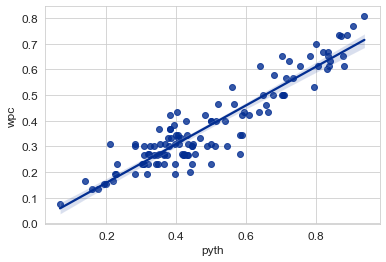

In [243]:
from sklearn.linear_model import LinearRegression

X = cor[['wpc','pyth']]
y = cor['Rk']
model = LinearRegression(normalize=True)
model.fit(X,y)

plt.figure(figsize=(6,4))
sns.regplot(data=cor ,x='pyth' , y='wpc' )


In [244]:
print(model.score(X,y))
model.predict([[0.65,0.71]])

0.8236175502678952


array([1.85917295])

===========================================

In [245]:
i = float(input('enter the wpc: '))
u = float(input('enter the pyth Ex: '))
if i < u:
    print('the diff is: ',i - u)
else:
    print('the wpc cannot be highest then pyth')

enter the wpc: 5
enter the pyth Ex: 5
the wpc cannot be highest then pyth


In [246]:
i = float(input('enter the GF: '))
u = float(input('enter the pyth GA: '))
print('the pyth Ex is: ', i**2 / (i**2 + u**2))

enter the GF: 5
enter the pyth GA: 5
the pyth Ex is:  0.5


In [247]:
i = float(input('enter the win: '))
u = float(input('enter the MP: '))
print('the wpc is: ', i / u)

enter the win: 5
enter the MP: 5
the wpc is:  1.0


=====================================================

In [248]:
frt1 = frt.copy()
print(frt1.shape)
frt1.head()

(90, 14)


Date   Time        Round  Day Venue Result  GF  GA    Opponent  Poss  \
0  2021-08-12  19:20  Matchweek 1  Thu  Home      W   1   0    Al-Fateh  35.0   
1  2021-08-16  20:50  Matchweek 2  Mon  Away      L   0   3  Al-Ittihad  49.0   
2  2021-08-25  19:05  Matchweek 3  Wed  Home      W   2   0    Al-Hazem  44.0   
3  2021-09-12  18:30  Matchweek 4  Sun  Away      D   2   2  Al-Ettifaq  33.0   
4  2021-09-17  18:45  Matchweek 5  Fri  Away      W   5   3  Al-Taawoun  39.0   

   Attendance        Captain Formation     team  
0       668.0  Sultan Fahran     3-4-3  Al-Raed  
1     23199.0  Sultan Fahran     3-4-3  Al-Raed  
2      1078.0  Sultan Fahran     3-4-3  Al-Raed  
3      3485.0  Sultan Fahran     3-4-3  Al-Raed  
4      9001.0  Sultan Fahran     3-4-3  Al-Raed

In [249]:
frt1['Date'] = pd.to_datetime(frt1['Date'])
frt1['venue_code'] = frt1['Venue'].astype('category').cat.codes
frt1['opp_code'] = frt1['Opponent'].astype('category').cat.codes
frt1['hour'] = frt1['Time'].astype('category').str.replace(":.+",'',regex=True).astype('int')
frt1['target'] = (frt1['Result'] == 'W').astype('int')
frt1['Day_code'] = frt1['Day'].astype('category').cat.codes

In [250]:
frt1.head(3)

Date   Time        Round  Day Venue Result  GF  GA    Opponent  Poss  \
0 2021-08-12  19:20  Matchweek 1  Thu  Home      W   1   0    Al-Fateh  35.0   
1 2021-08-16  20:50  Matchweek 2  Mon  Away      L   0   3  Al-Ittihad  49.0   
2 2021-08-25  19:05  Matchweek 3  Wed  Home      W   2   0    Al-Hazem  44.0   

   Attendance        Captain Formation     team  venue_code  opp_code  hour  \
0       668.0  Sultan Fahran     3-4-3  Al-Raed           1         5    19   
1     23199.0  Sultan Fahran     3-4-3  Al-Raed           0         9    20   
2      1078.0  Sultan Fahran     3-4-3  Al-Raed           1         7    19   

   target  Day_code  
0       1         4  
1       0         1  
2       1         6

In [251]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators=50, min_samples_split=10, random_state=1)

In [252]:
train = frt1[frt1['Date'] < '2022-01-01']
test = frt1[frt1['Date'] > '2022-03-01']
predictors = ['venue_code', 'opp_code', 'hour','Day_code']

In [253]:
rf.fit(train[predictors], train.target)
preds = rf.predict(test[predictors])

In [254]:
from sklearn.metrics import accuracy_score
acc = accuracy_score(test.target, preds)
acc

0.7083333333333334

<AxesSubplot:xlabel='pyth', ylabel='wpc'>

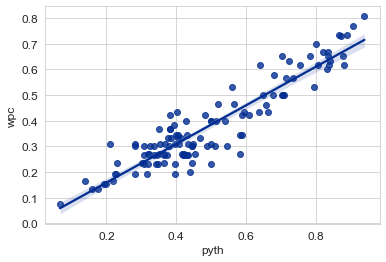

In [255]:
from sklearn.linear_model import LinearRegression

X = cor[['wpc','pyth']]
y = cor['Rk']
model = LinearRegression(normalize=True)
model.fit(X,y)

plt.figure(figsize=(6,4))
sns.regplot(data=cor ,x='pyth' , y='wpc' )


In [256]:
print(model.score(X,y))
model.predict([[0.65,0.71]])

0.8236175502678952


array([1.85917295])

# ***Prescriptive analytics***

In [261]:
print('Goalkeepers are: \n',G.iloc[:,0:8].head(3))
print('Defenders are: \n',D.sort_values(by='+/-',ascending=False).iloc[:,0:8].head(3))
print('Midfielders are: \n',M.sort_values(by='+/-',ascending=False).iloc[:,0:8].head(3))
print('Forwards are: \n',F.sort_values(by='+/-',ascending=False).iloc[:,0:8].head(3))

Goalkeepers are: 
              Player Nation Pos     Squad   Age    Born  MP  Starts
6   Waleed Abdullah    KSA   G  Al-Nassr  35.0  1986.0  20      19
44    Nawaf AlAqidi    KSA   G  Al-Nassr  21.0  2000.0   3       3
45    Nawaf AlAqidi    KSA   G  Al-Ta'ee  21.0  2000.0   7       7
Defenders are: 
                  Player Nation Pos       Squad   Age    Born  MP  Starts
221       Jang Hyun-soo    KOR   D    Al-Hilal  29.0  1991.0  25      25
450   Hamdan AlShamrani    KSA   D  Al-Ittihad  24.0  1996.0  28      28
460  Muhannad Shenqeeti    KSA   D  Al-Ittihad  22.0  1999.0  28      24
Midfielders are: 
              Player Nation Pos       Squad   Age    Born  MP  Starts
106  André Carrillo    PER   M    Al-Hilal  30.0  1991.0  22      17
144  Salman AlFaraj    KSA   M    Al-Hilal  31.0  1989.0  22      20
215  Bruno Henrique    BRA   M  Al-Ittihad  31.0  1989.0  30      20


KeyError: '+/-'

In [258]:
M.sort_values(by='G+A', ascending=False).head(3)

Player Nation Pos     Squad   Age    Born  MP  Starts  \
147              Yousef Fawaz    KSA   M  Al-Batin  26.3  1991.3   1       0   
178            Adeeb AlHaizan    KSA   M  Al-Ta'ee  20.0  2001.0   2       0   
345  Gonzalo Nicolás Martínez    ARG   M  Al-Nassr  28.0  1993.0  18       8   

     Min  Mn/MP  Min%   90s  Gls  Ast  CrdY  CrdR  Gls.1  Ast.1    G+A  Sh  \
147   12   12.0   0.4   0.1    2    0     0     0  15.00   0.00  15.00   2   
178   36   18.0   1.3   0.4    0    1     0     0   0.00   2.50   2.50   0   
345  975   54.0  36.1  10.8    8    2     3     0   0.74   0.18   0.92  28   

     SoT   SoT%  Sh/90  SoT/90  G/Sh  G/SoT   PPM   onG  onGA  +/-  +/-90  \
147    2  100.0  15.00    15.0  1.00   1.00  3.00   2.0   1.0  1.0   7.50   
178    0    0.0   0.00     0.0  0.00   0.00  1.50   1.0   1.0  0.0   0.00   
345   13   46.4   2.58     1.2  0.21   0.46  2.28  22.0  18.0  4.0   0.37   

     On-Off  Fls  Fld  Off  Crs  Int  TklW  OG  year  
147    7.87    1    0    0    0    0     0   0  2021  
178    0.41    0    0    0    0    0     0   0  2021  
345   -0.57   14   34    0   50    1     9   0  2021

In [262]:
F

Date   Time         Round  Day Venue Result  GF  GA    Opponent  \
30  2021-08-13  20:55   Matchweek 1  Fri  Away      D   1   1     Al-Ahli   
31  2021-08-19  20:50   Matchweek 2  Thu  Home      W   2   1    Al-Nassr   
32  2021-08-27  19:00   Matchweek 3  Fri  Home      L   1   2  Al-Ittihad   
33  2021-09-11  18:50   Matchweek 4  Sat  Away      L   0   2       Damac   
34  2021-09-16  20:30   Matchweek 5  Thu  Home      W   2   1    Al-Fayha   
35  2021-09-25  20:25   Matchweek 6  Sat  Away      D   1   1     Al-Raed   
36  2021-10-01  18:25   Matchweek 7  Fri  Home      D   2   2    Al-Batin   
37  2021-10-17  18:15   Matchweek 8  Sun  Away      D   0   0    Al-Hazem   
38  2021-10-22  18:05   Matchweek 9  Fri  Home      D   2   2  Al-Taawoun   
39  2021-11-04  17:55  Matchweek 11  Thu  Home      W   1   0        Abha   
40  2021-11-20  17:45  Matchweek 12  Sat  Home      D   0   0   Al-Shabab   
41  2021-11-27  17:25  Matchweek 13  Sat  Away      L   0   1  Al-Ettifaq   
42  2021-12-26  15:50  Matchweek 14  Sun  Away      L   1   3    Al-Ta'ee   
43  2021-12-31  18:05  Matchweek 15  Fri  Home      L   2   3    Al-Hilal   
44  2022-01-11  18:05  Matchweek 16  Tue  Home      D   2   2     Al-Ahli   
45  2022-01-15  18:05  Matchweek 17  Sat  Away      L   0   4    Al-Nassr   
46  2022-01-21  20:10  Matchweek 18  Fri  Away      L   0   1  Al-Ittihad   
47  2022-02-05  18:20  Matchweek 19  Sat  Home      W   3   0       Damac   
48  2022-02-10  20:20  Matchweek 20  Thu  Away      D   0   0    Al-Fayha   
49  2022-02-18  18:30  Matchweek 21  Fri  Home      D   0   0     Al-Raed   
50  2022-02-22  18:15  Matchweek 10  Tue  Away      L   1   4    Al-Fateh   
51  2022-02-27  15:50  Matchweek 22  Sun  Away      L   0   1    Al-Batin   
52  2022-03-05  18:40  Matchweek 23  Sat  Home      W   1   0    Al-Hazem   
53  2022-03-10  18:50  Matchweek 24  Thu  Away      D   2   2  Al-Taawoun   
54  2022-03-17  18:45  Matchweek 25  Thu  Home      W   1   0    Al-Fateh   
55  2022-05-06  19:10  Matchweek 26  Fri  Away      D   0   0        Abha   
56  2022-05-12  20:50  Matchweek 27  Thu  Away      L   0   1   Al-Shabab   
57  2022-05-28  19:20  Matchweek 28  Sat  Home      D   1   1  Al-Ettifaq   
58  2022-06-23  21:00  Matchweek 29  Thu  Home      W   1   0    Al-Ta'ee   
59  2022-06-27  21:00  Matchweek 30  Mon  Away      L   1   2    Al-Hilal   

    Poss    Attendance            Captain Formation        team  
30  53.0  15703.000000  Igor Rossi Branco   4-3-2-1  Al-Faisaly  
31  49.0   2616.000000  Igor Rossi Branco   4-3-2-1  Al-Faisaly  
32  60.0   1764.000000  Igor Rossi Branco   4-3-2-1  Al-Faisaly  
33  67.0   1090.000000  Igor Rossi Branco   4-3-2-1  Al-Faisaly  
34  57.0   3101.000000  Igor Rossi Branco   4-2-3-1  Al-Faisaly  
35  42.0   4917.000000  Igor Rossi Branco   4-2-3-1  Al-Faisaly  
36  61.0   3812.000000  Igor Rossi Branco   4-2-3-1  Al-Faisaly  
37  58.0   1092.000000  Igor Rossi Branco   4-2-3-1  Al-Faisaly  
38  58.0   6208.000000  Igor Rossi Branco   4-2-3-1  Al-Faisaly  
39  41.0   6094.000000  Igor Rossi Branco   4-2-3-1  Al-Faisaly  
40  41.0   6182.000000  Igor Rossi Branco   4-2-3-1  Al-Faisaly  
41  56.0   6783.000000  Igor Rossi Branco   4-2-3-1  Al-Faisaly  
42  43.0   4066.000000  Igor Rossi Branco   4-4-1-1  Al-Faisaly  
43  34.0   3500.000000  Igor Rossi Branco     4-4-2  Al-Faisaly  
44  53.0   3412.000000  Igor Rossi Branco   4-2-3-1  Al-Faisaly  
45  60.0   6811.000000    Ahmed Al-Kassar   4-2-3-1  Al-Faisaly  
46  46.0  26901.000000  Igor Rossi Branco     3-4-3  Al-Faisaly  
47  51.0   3500.000000  Igor Rossi Branco     4-4-2  Al-Faisaly  
48  61.0   3468.000000  Igor Rossi Branco     4-4-2  Al-Faisaly  
49  50.0   3475.000000  Mustafa Malayekah     4-4-2  Al-Faisaly  
50  58.0   8279.000000  Igor Rossi Branco     4-4-2  Al-Faisaly  
51  61.0   2127.000000  Igor Rossi Branco   4-2-3-1  Al-Faisaly  
52  38.0   3494.000000  Igor Rossi Branco   4-2-3-1  Al-Faisaly  
53  50.0   6897.000000  Mustafa Malaye